<a href="https://colab.research.google.com/github/23011985uhi/23011985_DataAnalytics/blob/main/Data_Analytics_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

An investigation into effects of weather on the number of motor vehicle collisions in the city of New York. The weather data was collected from a weather station near central park while the collision data was provided by the New York police department. At first glance there could be a suspected misrepresentation within the data since the weather data is being used from one location to compare with collision data from the full city. Slight variations in weather or conditions around the city could contribute to more or less collisions that won't be reflected properly within the data. An example would be wind direction being blocked in some part of the city by high rise buildings but being amplified in others due to a wind tunnel effect. Just a consideration when starting to analyse the data.

Covid data has been removed from the dataset due to the unprecedented nature of lockdowns. The data being used is the most recent "normal" data from before covid since its unclear as to whether it has risen to normal levels again since lockdowns.

In [1549]:
CollisionsData <- read.csv("https://raw.githubusercontent.com/23011985uhi/23011985_DataAnalytics/main/2013-2019Assignment-1.csv", stringsAsFactors = TRUE)

In [1550]:
head(CollisionsData)

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust max 
1 2   2013 1  1  2013-01-01     37.8 23.6 1011.9 10.0  6.1   8.9  19.0 39.9
2 3   2013 1  2  2013-01-02     27.1 10.5 1016.8 10.0  5.3   9.9  19.0 33.1
3 4   2013 1  3  2013-01-03     28.4 14.1 1020.6 10.0  3.7   8.0  15.0 32.0
4 5   2013 1  4  2013-01-04     33.4 18.6 1017.0 10.0  6.5  13.0  24.1 37.0
5 6   2013 1  5  2013-01-05     36.1 18.7 1020.6 10.0  6.6  12.0  21.0 42.1
6 7   2013 1  6  2013-01-06     38.3 25.0 1019.5  8.5  5.3   8.9  17.1 46.0
  min  prcp sndp  fog num_collisions
1 33.1 0    999.9 0   381           
2 21.9 0    999.9 0   480           
3 24.1 0    999.9 0   549           
4 30.0 0    999.9 0   505           
5 32.0 0    999.9 0   389           
6 34.0 0    999.9 0   393

In [1551]:
summary(CollisionsData)

      day             year            mo               da       
 Min.   :1.000   Min.   :2013   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2014   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :4.000   Median :2016   Median : 7.000   Median :16.00  
 Mean   :3.999   Mean   :2016   Mean   : 6.524   Mean   :15.73  
 3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2019   Max.   :12.000   Max.   :31.00  
                                                                
    collision_date      temp            dewp             slp         
 2013-01-01:   1   Min.   : 6.90   Min.   :-16.10   Min.   :  992.1  
 2013-01-02:   1   1st Qu.:41.40   1st Qu.: 26.48   1st Qu.: 1012.6  
 2013-01-03:   1   Median :56.80   Median : 43.05   Median : 1017.1  
 2013-01-04:   1   Mean   :55.69   Mean   : 41.19   Mean   : 1098.0  
 2013-01-05:   1   3rd Qu.:71.60   3rd Qu.: 57.50   3rd Qu.: 1022.1  
 2013-01-06:   1   Max.   :89.10   Max.   : 74.80   Max.   :

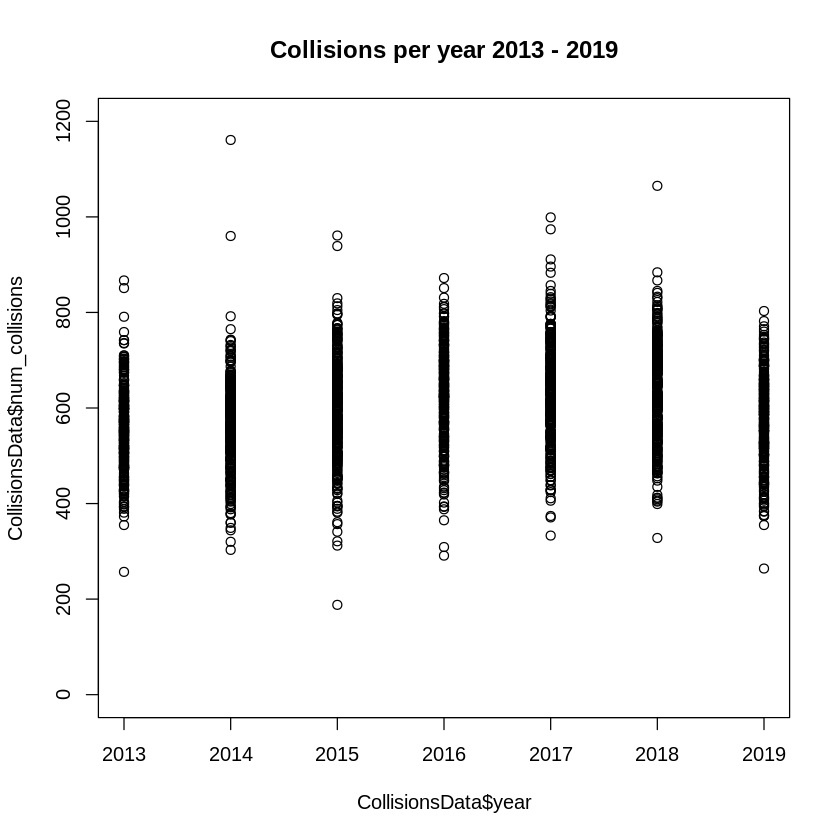

In [1552]:
plot(CollisionsData$year, CollisionsData$num_collisions, main = "Collisions per year 2013 - 2019", ylim=c(0, 1200), )

In [1553]:
cor(CollisionsData$year , CollisionsData$num_collisions)

[1] 0.1710123

An initial assumption would be that the number of collisions would have a positive linear relationship with the year since every year there are more motor vehicles in total on the roads. The data shows a weak positive linear relationship between the year and number of collisions which supports this initial assumption. However, visually its looks as if 2019 data decreases slightly when compared to previous years. There is no reason found within the data to explain why this may be happening as shown later in this report, every year has similar results when analysed individually. It could be caused by data input errors or human error or an external reason unrelated to the data. Covid complications and lockdowns started in 2020 so that has been disregarded for the year 2019.

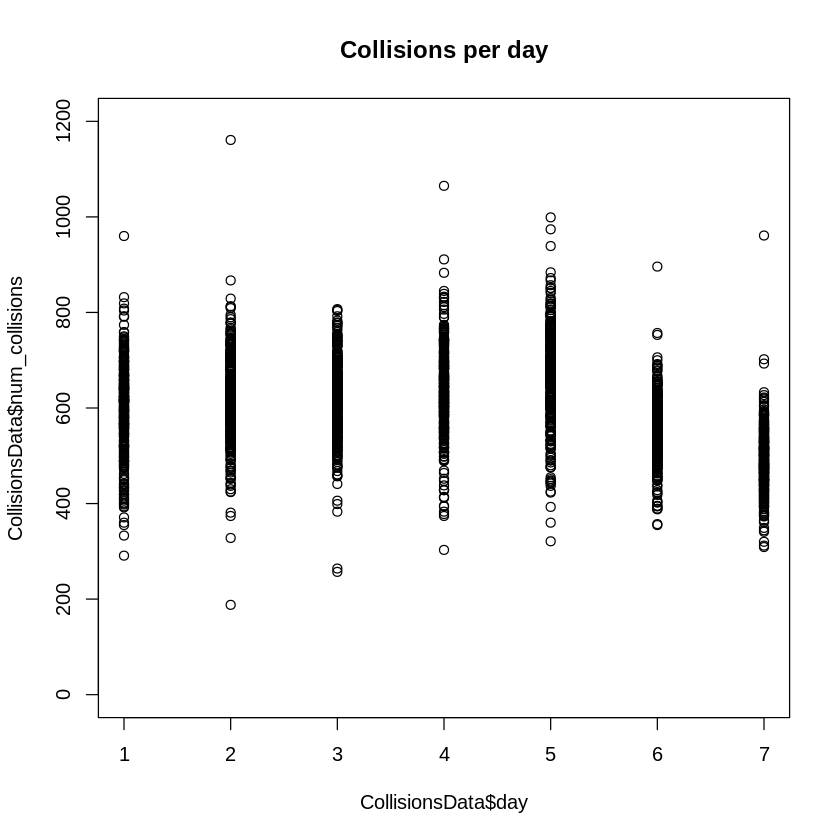

In [1554]:
plot(CollisionsData$day, CollisionsData$num_collisions, main = "Collisions per day", ylim=c(0, 1200))

In [1555]:
cor(CollisionsData$day, CollisionsData$num_collisions)

[1] -0.2934014

Collisions on each day of the week produces weak negative correlation. By moving the weekend to the start of the week in regards to the data, the correlation can be improved.

In [1556]:
cd <- read.csv("https://raw.githubusercontent.com/23011985uhi/23011985_DataAnalytics/main/2013-2019Assignment-1.csv", stringsAsFactors = TRUE)

In [1557]:
head(cd)

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust max 
1 2   2013 1  1  2013-01-01     37.8 23.6 1011.9 10.0  6.1   8.9  19.0 39.9
2 3   2013 1  2  2013-01-02     27.1 10.5 1016.8 10.0  5.3   9.9  19.0 33.1
3 4   2013 1  3  2013-01-03     28.4 14.1 1020.6 10.0  3.7   8.0  15.0 32.0
4 5   2013 1  4  2013-01-04     33.4 18.6 1017.0 10.0  6.5  13.0  24.1 37.0
5 6   2013 1  5  2013-01-05     36.1 18.7 1020.6 10.0  6.6  12.0  21.0 42.1
6 7   2013 1  6  2013-01-06     38.3 25.0 1019.5  8.5  5.3   8.9  17.1 46.0
  min  prcp sndp  fog num_collisions
1 33.1 0    999.9 0   381           
2 21.9 0    999.9 0   480           
3 24.1 0    999.9 0   549           
4 30.0 0    999.9 0   505           
5 32.0 0    999.9 0   389           
6 34.0 0    999.9 0   393

In [1558]:
cd$day <- cd$day + 2

In [1559]:
cd$day[cd$day==8] <- 1

In [1560]:
cd$day[cd$day==9] <- 2

In [1561]:
head(cd)

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust max 
1 4   2013 1  1  2013-01-01     37.8 23.6 1011.9 10.0  6.1   8.9  19.0 39.9
2 5   2013 1  2  2013-01-02     27.1 10.5 1016.8 10.0  5.3   9.9  19.0 33.1
3 6   2013 1  3  2013-01-03     28.4 14.1 1020.6 10.0  3.7   8.0  15.0 32.0
4 7   2013 1  4  2013-01-04     33.4 18.6 1017.0 10.0  6.5  13.0  24.1 37.0
5 1   2013 1  5  2013-01-05     36.1 18.7 1020.6 10.0  6.6  12.0  21.0 42.1
6 2   2013 1  6  2013-01-06     38.3 25.0 1019.5  8.5  5.3   8.9  17.1 46.0
  min  prcp sndp  fog num_collisions
1 33.1 0    999.9 0   381           
2 21.9 0    999.9 0   480           
3 24.1 0    999.9 0   549           
4 30.0 0    999.9 0   505           
5 32.0 0    999.9 0   389           
6 34.0 0    999.9 0   393

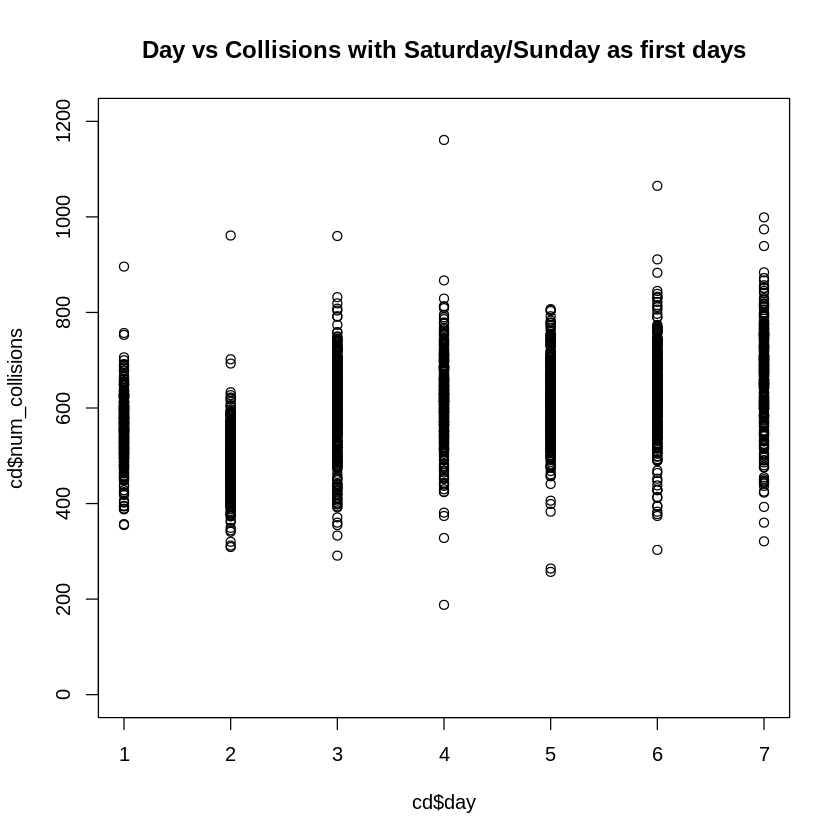

In [1562]:
plot(cd$day , cd$num_collisions, main = "Day vs Collisions with Saturday/Sunday as first days", ylim=c(0, 1200))

In [1563]:
cor(cd$day, cd$num_collisions)

[1] 0.452803

The restructured week day order produces astronger positive correlation with day and number of collisions. This restructured order will provide better results for a Linear regressor and DNN.

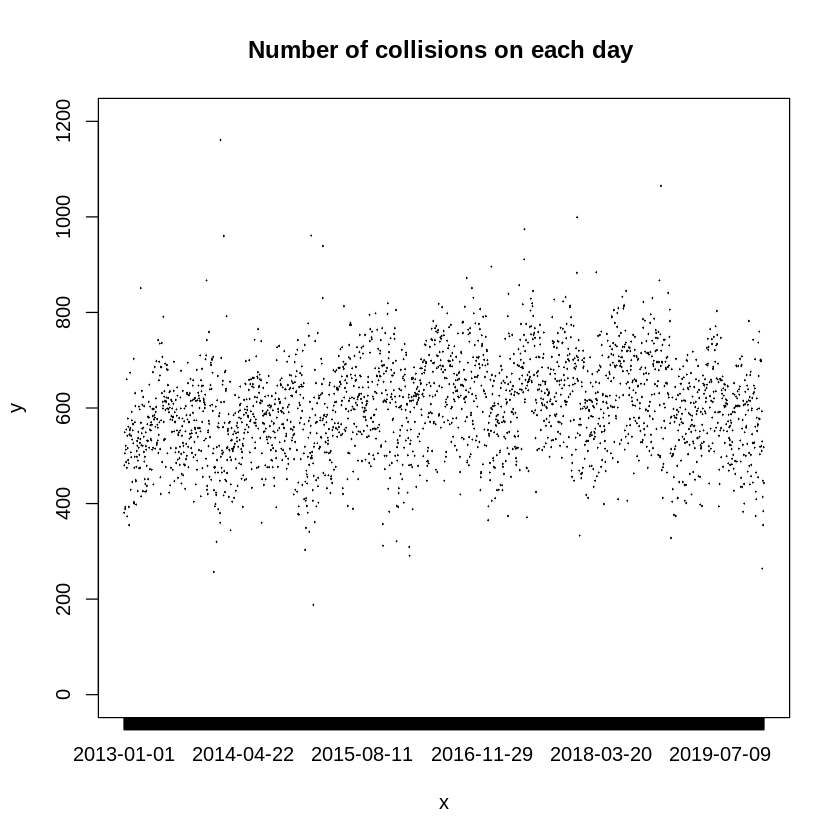

In [1564]:
plot (cd$collision_date, cd$num_collisions, main ="Number of collisions on each day ", ylim=c(0,1200))

Now to plot out all the weather data variations to find out if any produce a decent correlation with number of collisions for the complete 2013-2019 dataset.

In [1565]:
library(lattice)

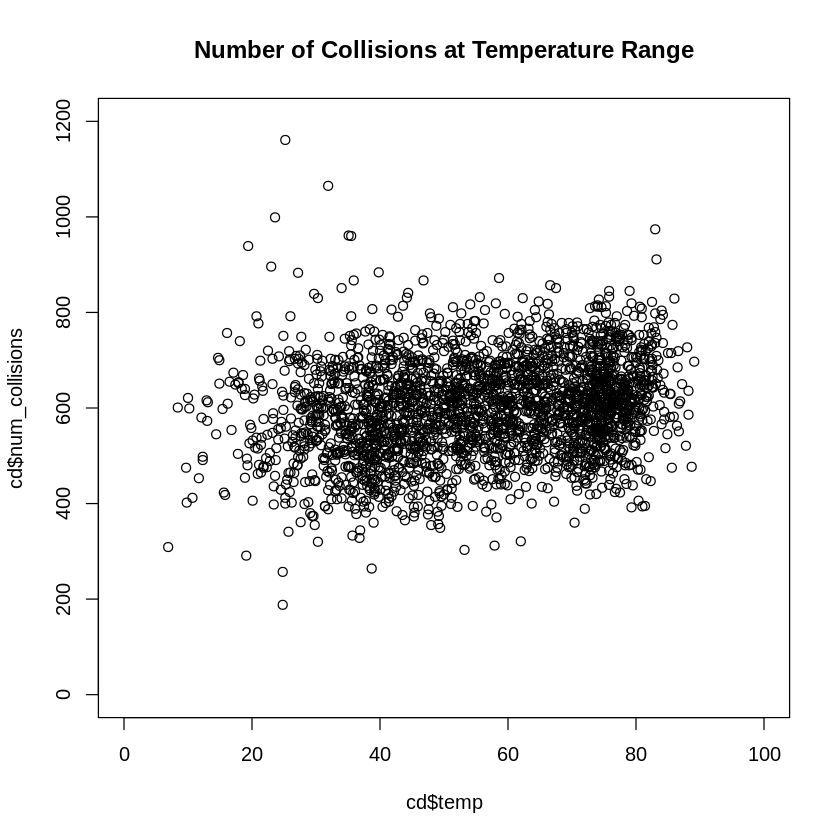

In [1566]:
plot (cd$temp, cd$num_collisions, main= "Number of Collisions at Temperature Range", xlim=c(0,100), ylim=c(0,1200))

In [1567]:
cor(cd$temp, cd$num_collisions)

[1] 0.2127344

Temperature and number of collisions produces a small positive correlation and will most likely be one of the statistics used for the linear regressor with day.



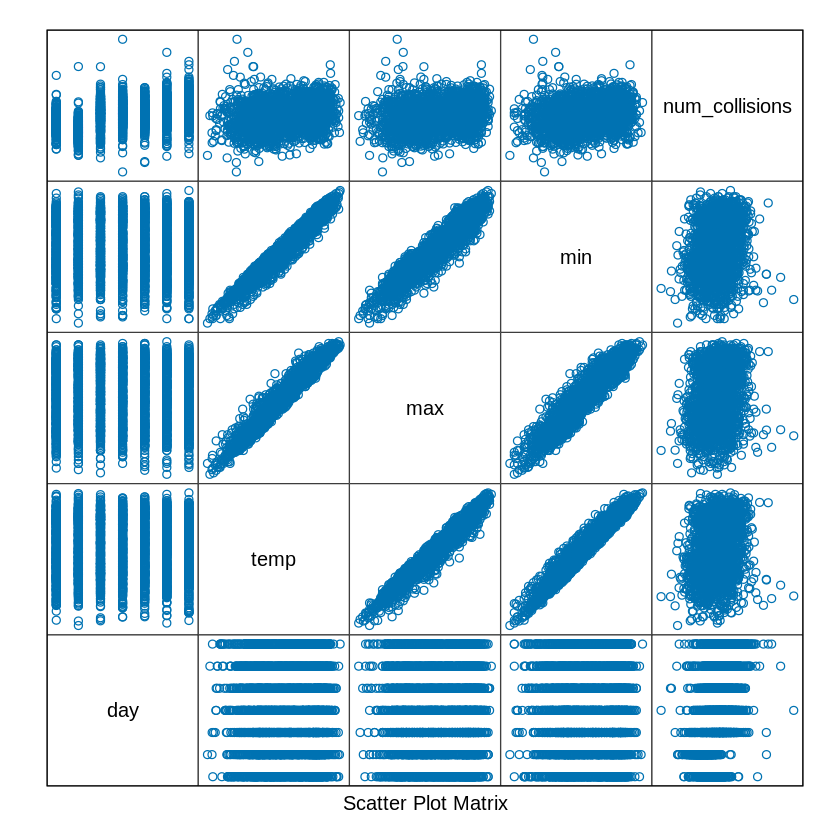

In [1568]:
splom(~ cd[,c(1,6, 13, 14,18)], groups=NULL, data=cd,
axis.line.tck=0, axis.text.alpha=0)

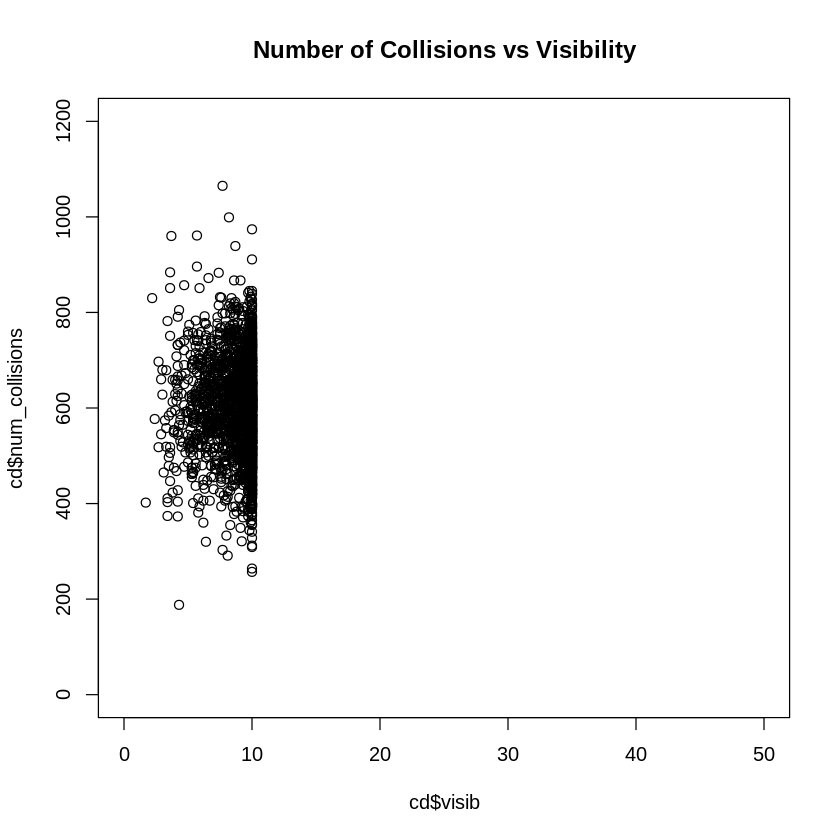

In [1569]:
plot(cd$visib, cd$num_collisions, main="Number of Collisions vs Visibility", xlim=c(0,50), ylim=c(0,1200))

In [1570]:
cor(CollisionsData$visib, CollisionsData$num_collisions)

[1] 0.02046122

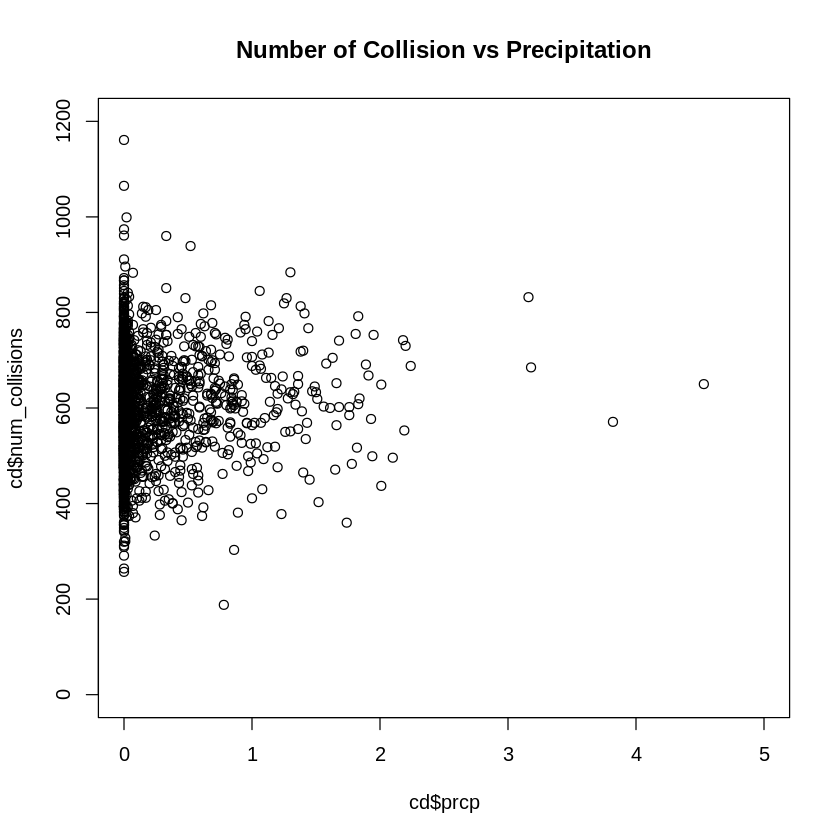

In [1571]:
plot(cd$prcp, cd$num_collisions, main="Number of Collision vs Precipitation", xlim=c(0,5), ylim=c(0,1200))

In [1572]:
cor(cd$prcp, cd$num_collisions)

[1] 0.06246477

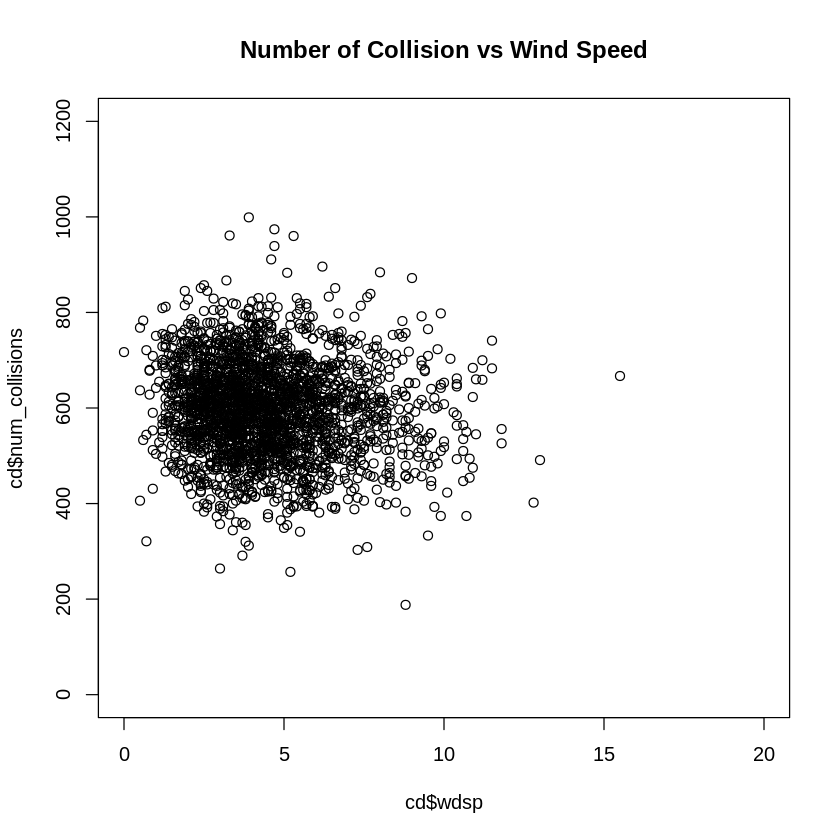

In [1573]:
plot(cd$wdsp, cd$num_collisions, main="Number of Collision vs Wind Speed", xlim=c(0,20), ylim=c(0,1200))

In [1574]:
cor(cd$wdsp, cd$num_collisions)

[1] 0.02697918

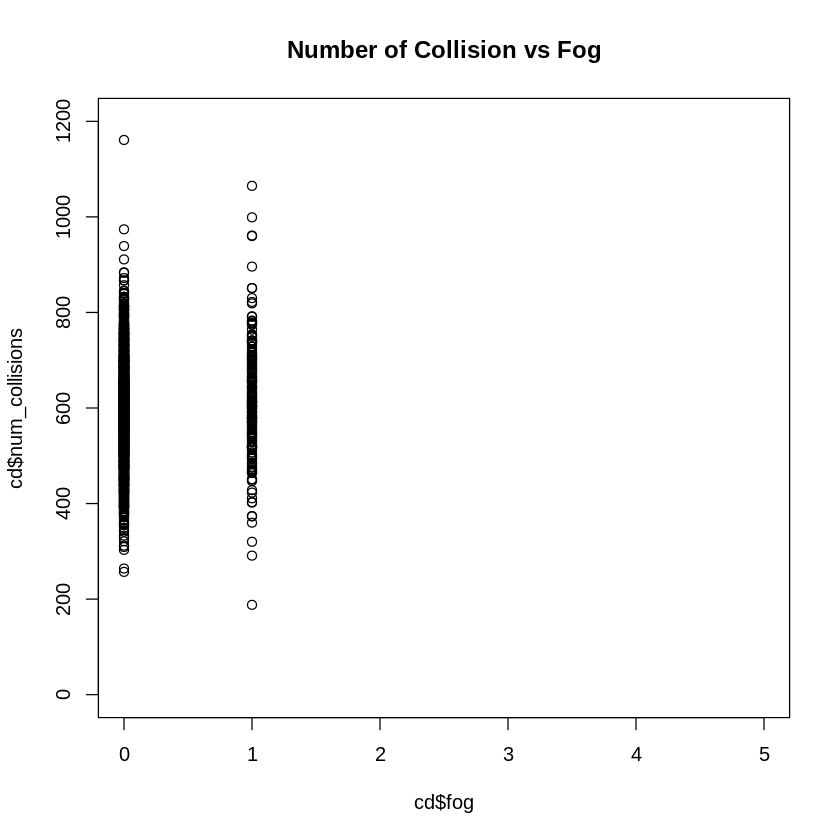

In [1575]:
plot(cd$fog, cd$num_collisions, main="Number of Collision vs Fog", xlim=c(0,5), ylim=c(0,1200))

In [1576]:
cor(cd$fog, cd$num_collisions)

[1] 0.05356593

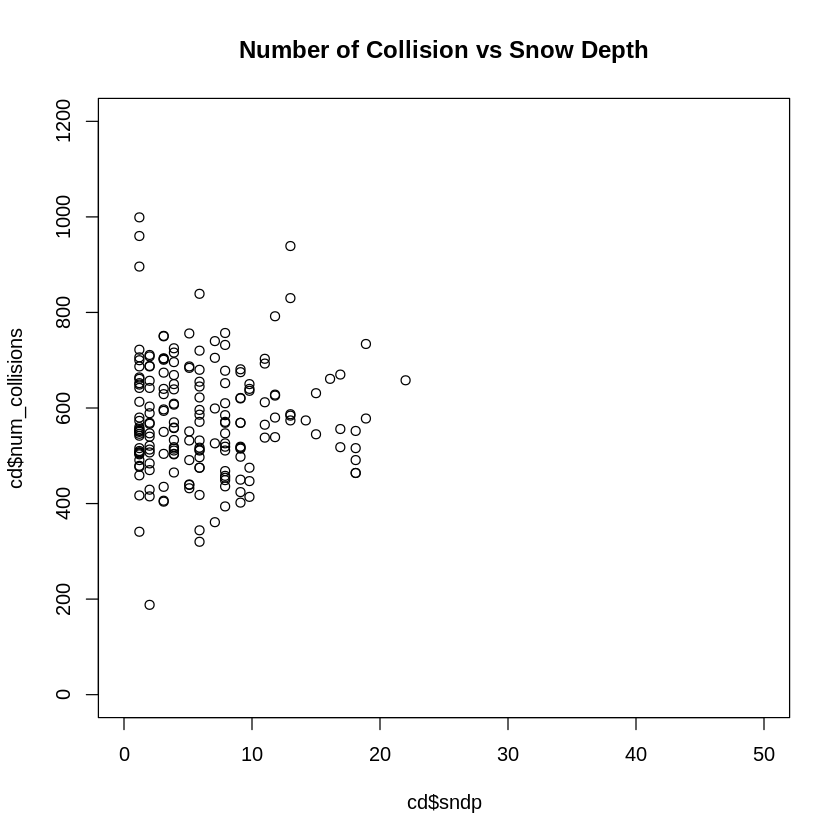

In [1577]:
plot(cd$sndp, cd$num_collisions, main="Number of Collision vs Snow Depth", xlim=c(0,50), ylim=c(0,1200))

In [1578]:
cor(cd$sndp, cd$num_collisions)

[1] 0.06054171

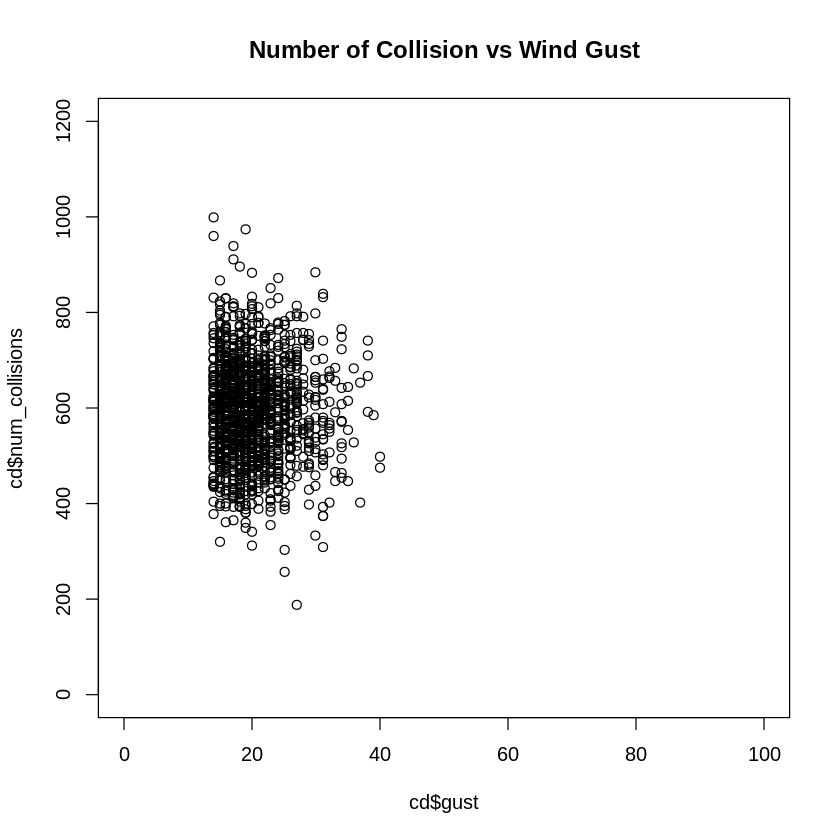

In [1579]:
plot(cd$gust, cd$num_collisions, main="Number of Collision vs Wind Gust", xlim=c(0,100), ylim=c(0,1200))

In [1580]:
cor(cd$gust, cd$num_collisions)

[1] 0.05849166

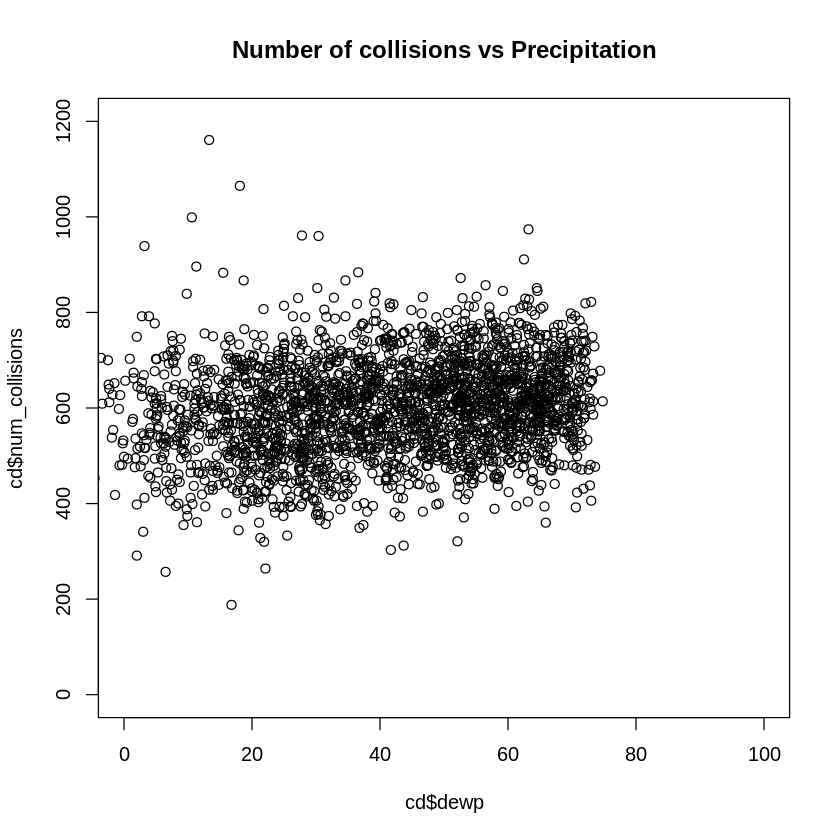

In [1581]:
plot(cd$dewp, cd$num_collisions, main="Number of collisions vs Precipitation", xlim=c(0,100), ylim=c(0,1200))

In [1582]:
cor(cd$dewp, cd$num_collisions)

[1] 0.2046217

Temperature and Dew point have the highest correlation with 0.2. Not a great correlation but the best of the data provided so far. They will be used with day in the linear regressor.


In [1583]:
head(cd)

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust max 
1 4   2013 1  1  2013-01-01     37.8 23.6 1011.9 10.0  6.1   8.9  19.0 39.9
2 5   2013 1  2  2013-01-02     27.1 10.5 1016.8 10.0  5.3   9.9  19.0 33.1
3 6   2013 1  3  2013-01-03     28.4 14.1 1020.6 10.0  3.7   8.0  15.0 32.0
4 7   2013 1  4  2013-01-04     33.4 18.6 1017.0 10.0  6.5  13.0  24.1 37.0
5 1   2013 1  5  2013-01-05     36.1 18.7 1020.6 10.0  6.6  12.0  21.0 42.1
6 2   2013 1  6  2013-01-06     38.3 25.0 1019.5  8.5  5.3   8.9  17.1 46.0
  min  prcp sndp  fog num_collisions
1 33.1 0    999.9 0   381           
2 21.9 0    999.9 0   480           
3 24.1 0    999.9 0   549           
4 30.0 0    999.9 0   505           
5 32.0 0    999.9 0   389           
6 34.0 0    999.9 0   393

Proceeding to analysing each year individually in case there are any odd results in any of the years. 2019 data being lower than expected raised a small concern of potential abnormal numbers within the data, especially for that year.

In [1584]:
cd$collision_date[0:365]

[1] 2013-01-01 2013-01-02 2013-01-03 2013-01-04 2013-01-05 2013-01-06
  [7] 2013-01-07 2013-01-08 2013-01-09 2013-01-10 2013-01-11 2013-01-12
 [13] 2013-01-13 2013-01-14 2013-01-15 2013-01-16 2013-01-17 2013-01-18
 [19] 2013-01-19 2013-01-20 2013-01-21 2013-01-22 2013-01-23 2013-01-24
 [25] 2013-01-25 2013-01-26 2013-01-27 2013-01-28 2013-01-29 2013-01-30
 [31] 2013-01-31 2013-02-01 2013-02-02 2013-02-03 2013-02-04 2013-02-05
 [37] 2013-02-06 2013-02-07 2013-02-08 2013-02-09 2013-02-10 2013-02-11
 [43] 2013-02-12 2013-02-13 2013-02-14 2013-02-15 2013-02-16 2013-02-17
 [49] 2013-02-18 2013-02-19 2013-02-20 2013-02-21 2013-02-22 2013-02-23
 [55] 2013-02-24 2013-02-25 2013-02-26 2013-02-27 2013-02-28 2013-03-01
 [61] 2013-03-02 2013-03-03 2013-03-04 2013-03-05 2013-03-06 2013-03-07
 [67] 2013-03-08 2013-03-09 2013-03-10 2013-03-11 2013-03-12 2013-03-13
 [73] 2013-03-14 2013-03-15 2013-03-16 2013-03-17 2013-03-18 2013-03-19
 [79] 2013-03-20 2013-03-21 2013-03-22 2013-03-23 2013-03-24 2013-03-25
 [85] 2013-03-26 2013-03-27 2013-03-28 2013-03-29 2013-03-30 2013-03-31
 [91] 2013-04-01 2013-04-02 2013-04-03 2013-04-04 2013-04-05 2013-04-06
 [97] 2013-04-07 2013-04-08 2013-04-09 2013-04-10 2013-04-11 2013-04-12
[103] 2013-04-13 2013-04-14 2013-04-15 2013-04-16 2013-04-17 2013-04-18
[109] 2013-04-19 2013-04-20 2013-04-21 2013-04-22 2013-04-23 2013-04-24
[115] 2013-04-25 2013-04-26 2013-04-27 2013-04-28 2013-04-29 2013-04-30
[121] 2013-05-01 2013-05-02 2013-05-03 2013-05-04 2013-05-05 2013-05-06
[127] 2013-05-07 2013-05-08 2013-05-09 2013-05-10 2013-05-11 2013-05-12
[133] 2013-05-13 2013-05-14 2013-05-15 2013-05-16 2013-05-17 2013-05-18
[139] 2013-05-19 2013-05-20 2013-05-21 2013-05-22 2013-05-23 2013-05-24
[145] 2013-05-25 2013-05-26 2013-05-27 2013-05-28 2013-05-29 2013-05-30
[151] 2013-05-31 2013-06-01 2013-06-02 2013-06-03 2013-06-04 2013-06-05
[157] 2013-06-06 2013-06-07 2013-06-08 2013-06-09 2013-06-10 2013-06-11
[163] 2013-06-12 2013-06-13 2013-06-14 2013-06-15 2013-06-16 2013-06-17
[169] 2013-06-18 2013-06-19 2013-06-20 2013-06-21 2013-06-22 2013-06-23
[175] 2013-06-24 2013-06-25 2013-06-26 2013-06-27 2013-06-28 2013-06-29
[181] 2013-06-30 2013-07-01 2013-07-02 2013-07-03 2013-07-04 2013-07-05
[187] 2013-07-06 2013-07-07 2013-07-08 2013-07-09 2013-07-10 2013-07-11
[193] 2013-07-12 2013-07-13 2013-07-14 2013-07-15 2013-07-16 2013-07-17
[199] 2013-07-18 2013-07-19 2013-07-20 2013-07-21 2013-07-22 2013-07-23
[205] 2013-07-24 2013-07-25 2013-07-26 2013-07-27 2013-07-28 2013-07-29
[211] 2013-07-30 2013-07-31 2013-08-01 2013-08-02 2013-08-03 2013-08-04
[217] 2013-08-05 2013-08-06 2013-08-07 2013-08-08 2013-08-09 2013-08-10
[223] 2013-08-11 2013-08-12 2013-08-13 2013-08-14 2013-08-15 2013-08-16
[229] 2013-08-17 2013-08-18 2013-08-19 2013-08-20 2013-08-21 2013-08-22
[235] 2013-08-23 2013-08-24 2013-08-25 2013-08-26 2013-08-27 2013-08-28
[241] 2013-08-29 2013-08-30 2013-08-31 2013-09-01 2013-09-02 2013-09-03
[247] 2013-09-04 2013-09-05 2013-09-06 2013-09-07 2013-09-08 2013-09-09
[253] 2013-09-10 2013-09-11 2013-09-12 2013-09-13 2013-09-14 2013-09-15
[259] 2013-09-16 2013-09-17 2013-09-18 2013-09-19 2013-09-20 2013-09-21
[265] 2013-09-22 2013-09-23 2013-09-24 2013-09-25 2013-09-26 2013-09-27
[271] 2013-09-28 2013-09-29 2013-09-30 2013-10-01 2013-10-02 2013-10-03
[277] 2013-10-04 2013-10-05 2013-10-06 2013-10-07 2013-10-08 2013-10-09
[283] 2013-10-10 2013-10-11 2013-10-12 2013-10-13 2013-10-14 2013-10-15
[289] 2013-10-16 2013-10-17 2013-10-18 2013-10-19 2013-10-20 2013-10-21
[295] 2013-10-22 2013-10-23 2013-10-24 2013-10-25 2013-10-26 2013-10-27
[301] 2013-10-28 2013-10-29 2013-10-30 2013-10-31 2013-11-01 2013-11-02
[307] 2013-11-03 2013-11-04 2013-11-05 2013-11-06 2013-11-07 2013-11-08
[313] 2013-11-09 2013-11-10 2013-11-11 2013-11-12 2013-11-13 2013-11-14
[319] 2013-11-15 2013-11-16 2013-11-17 2013-11-18 2013-11-19 2013-11-20
[325] 2013-11-21 2013-11-22 2013-11-23 2013-11-24 2013-11-25 2013-11-26
[331] 2013-11-27 2013-11-28 2013-11-29 201

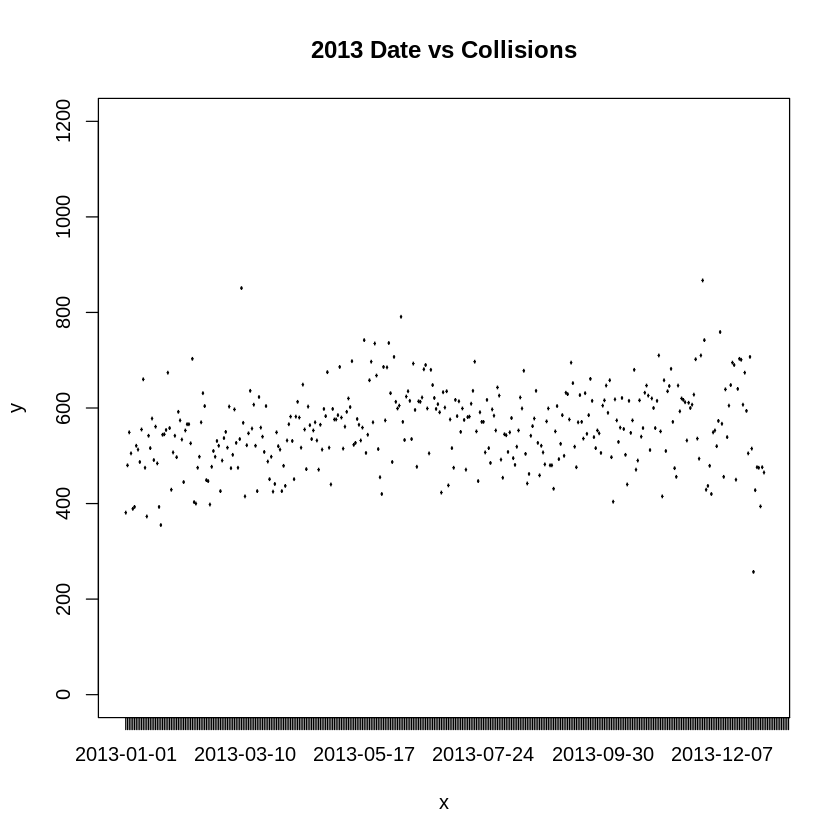

In [1585]:
plot(cd$collision_date[0:365], cd$num_collisions[0:365], main="2013 Date vs Collisions", xlim=c(0, 365), ylim=c(0,1200))

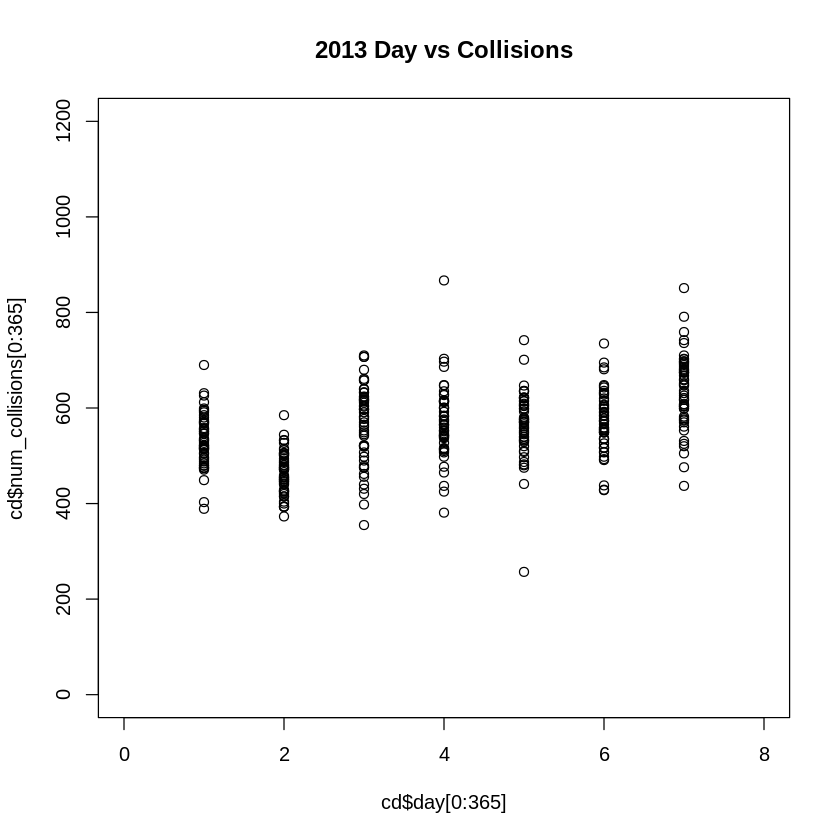

In [1586]:
plot(cd$day[0:365], cd$num_collisions[0:365], main="2013 Day vs Collisions", xlim=c(0, 8), ylim=c(0,1200))

In [1587]:
cor(cd$day[0:365], cd$num_collisions[0:365])

[1] 0.4511488

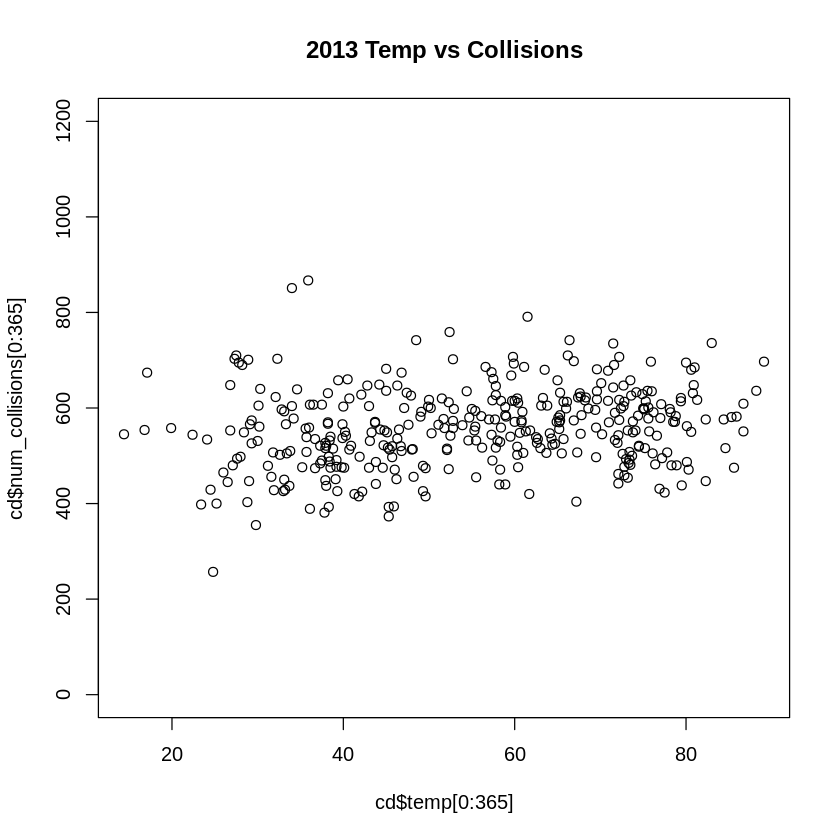

In [1588]:
plot(cd$temp[0:365], cd$num_collisions[0:365], main="2013 Temp vs Collisions", ylim=c(0,1200))

In [1589]:
cor(cd$temp[0:365], cd$num_collisions[0:365])

[1] 0.2064339

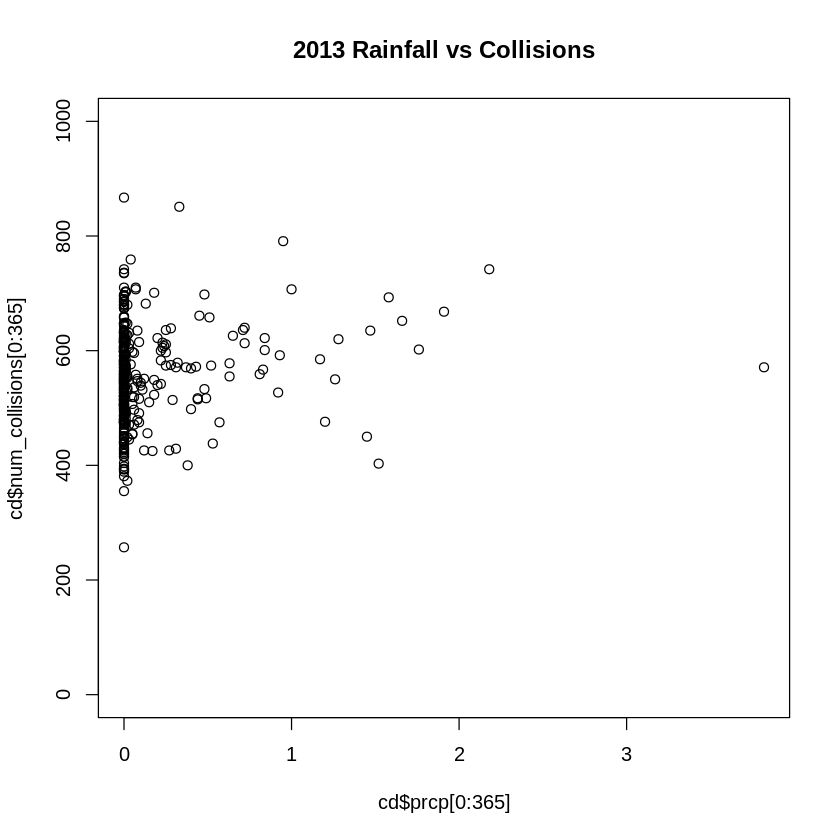

In [1590]:
plot(cd$prcp[0:365], cd$num_collisions[0:365], main="2013 Rainfall vs Collisions", ylim=c(0,1000))

In [1591]:
cor(cd$prcp[0:365], cd$num_collisions[0:365])

[1] 0.135013

Small positive correlation with precipitation and collisions for 2013 but it balances out in the full dataset.

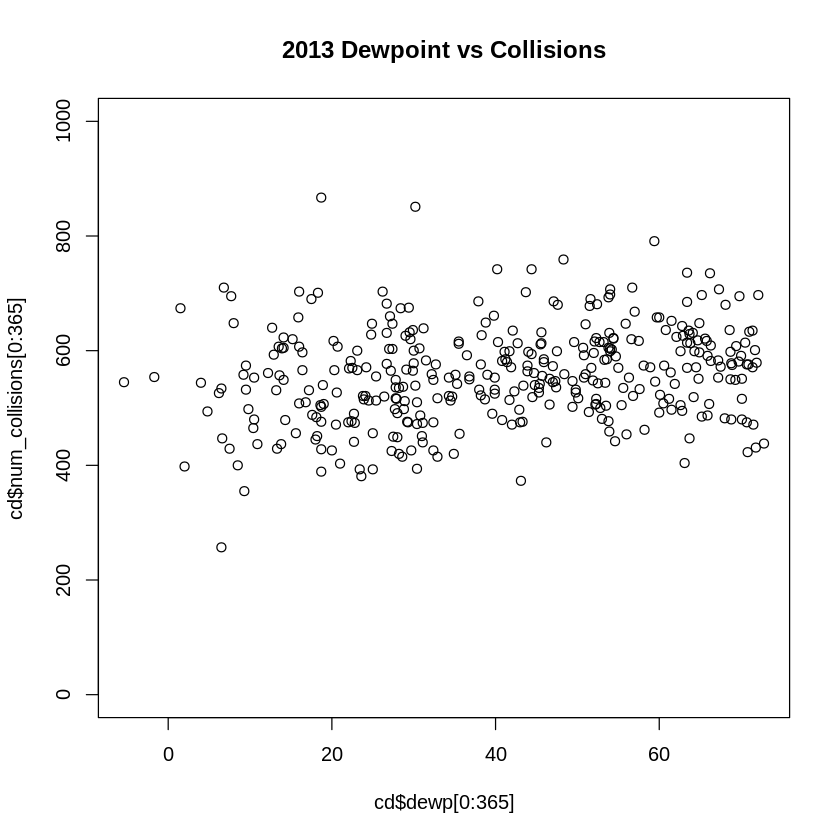

In [1592]:
plot(cd$dewp[0:365], cd$num_collisions[0:365], main="2013 Dewpoint vs Collisions", ylim=c(0,1000))

In [1593]:
cor(cd$dewp[0:365], cd$num_collisions[0:365])

[1] 0.2195769

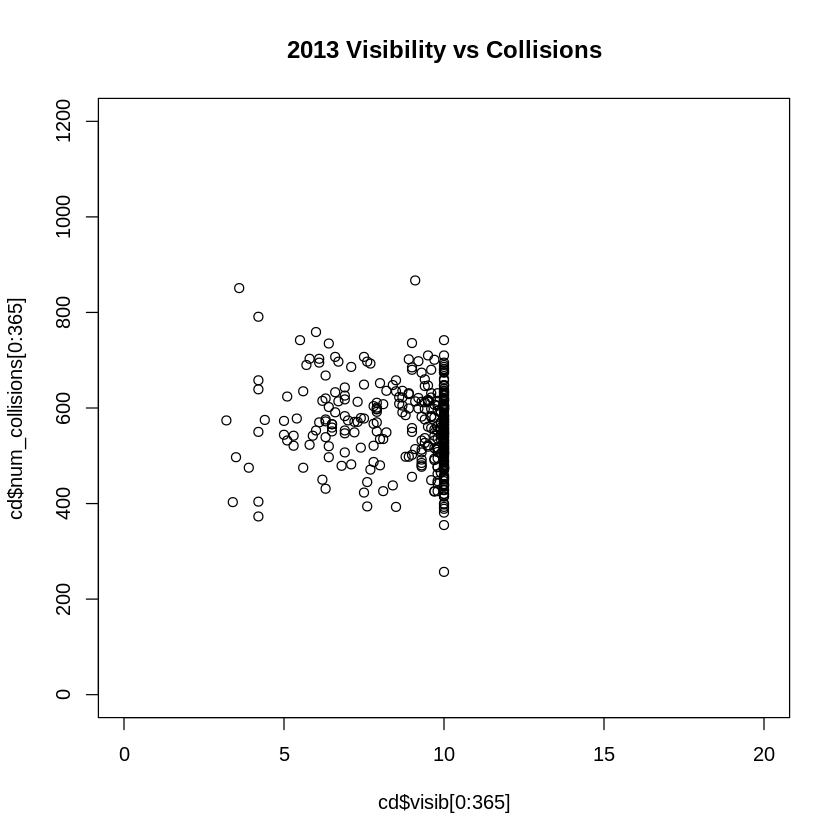

In [1594]:
plot(cd$visib[0:365], cd$num_collisions[0:365], main="2013 Visibility vs Collisions", xlim=c(0,20), ylim=c(0,1200))

In [1595]:
cor(cd$visib[0:365], cd$num_collisions[0:365])

[1] -0.1741957

Visibiliy produces a small negative correlation with collision numbers for the year 2013 but when calculated for the data as a whole the correlation is negligible.

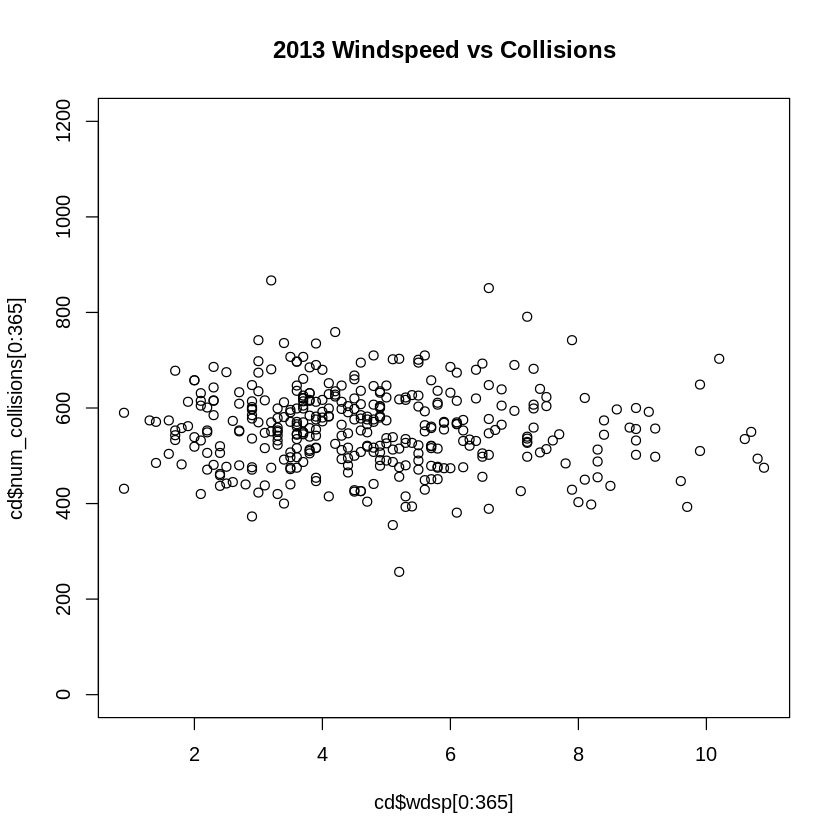

In [1596]:
plot(cd$wdsp[0:365], cd$num_collisions[0:365], main="2013 Windspeed vs Collisions", ylim=c(0,1200))

In [1597]:
cor(cd$wdsp[0:365], cd$num_collisions[0:365])

[1] -0.07106057

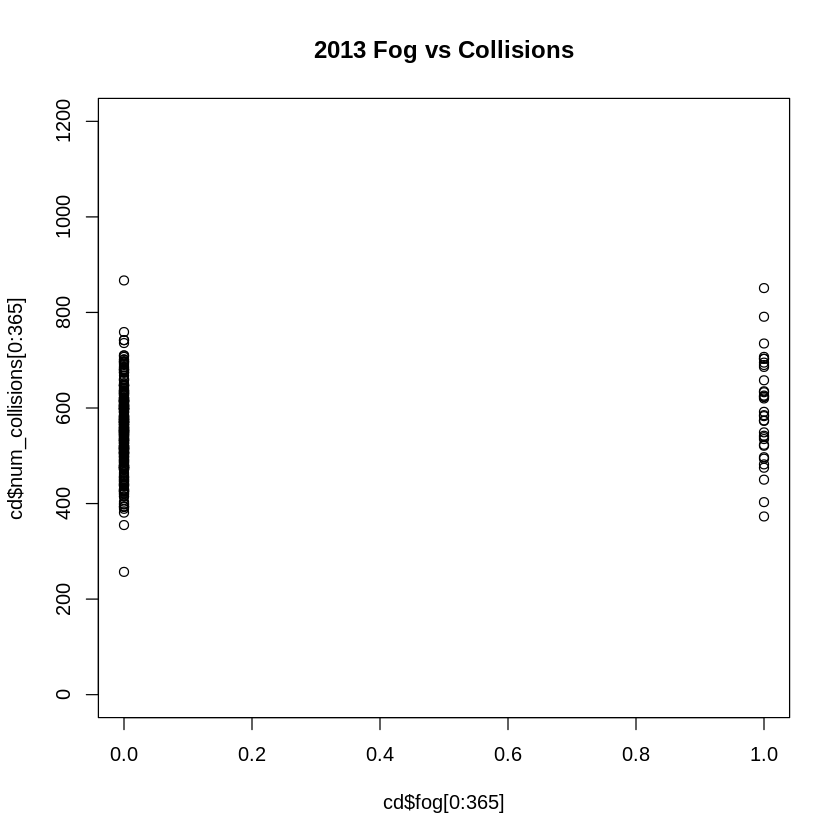

In [1598]:
plot(cd$fog[0:365], cd$num_collisions[0:365], main="2013 Fog vs Collisions", ylim=c(0,1200))

In [1599]:
cor(cd$fog[0:365], cd$num_collisions[0:365])

[1] 0.1463834

A small positive correlation with fog and collisions but since the data is in a yes (1) or no (0) format, it would be more suited to the DNN than linear regressor.

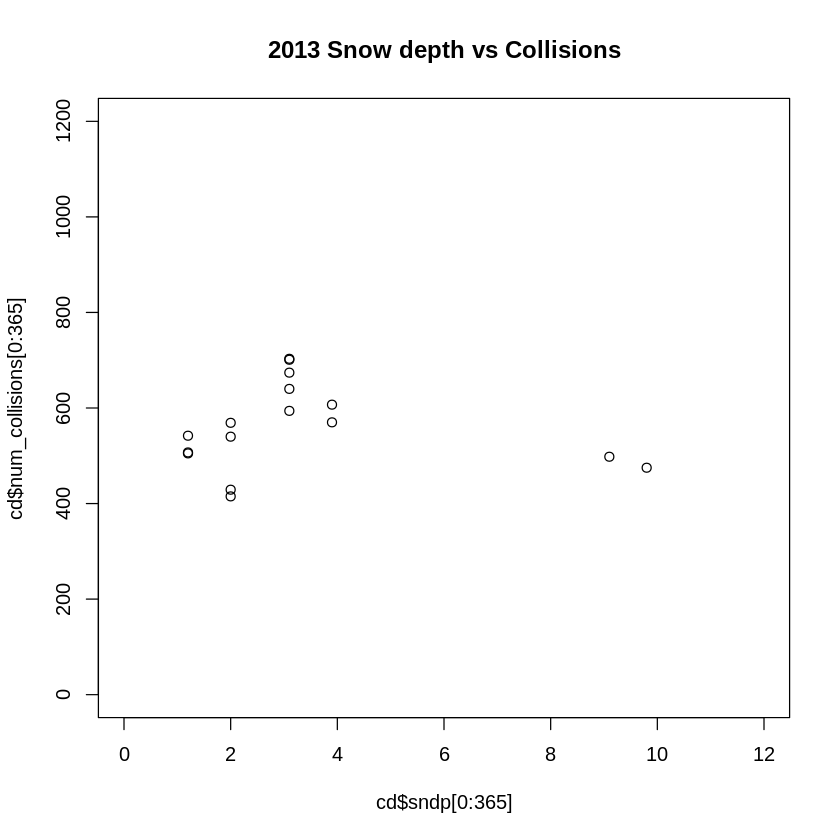

In [1600]:
plot(cd$sndp[0:365], cd$num_collisions[0:365], main="2013 Snow depth vs Collisions", xlim=c(0,12), ylim=c(0,1200))

In [1601]:
cor(cd$sndp[0:365], cd$num_collisions[0:365])

[1] -0.006158979

In [1602]:
summary(cd$num_collisions[0:365])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  257.0   505.0   558.0   558.2   613.0   867.0 

In [1603]:
cd$collision_date[366:730]

[1] 2014-01-01 2014-01-02 2014-01-03 2014-01-04 2014-01-05 2014-01-06
  [7] 2014-01-07 2014-01-08 2014-01-09 2014-01-10 2014-01-11 2014-01-12
 [13] 2014-01-13 2014-01-14 2014-01-15 2014-01-16 2014-01-17 2014-01-18
 [19] 2014-01-19 2014-01-20 2014-01-21 2014-01-22 2014-01-23 2014-01-24
 [25] 2014-01-25 2014-01-26 2014-01-27 2014-01-28 2014-01-29 2014-01-30
 [31] 2014-01-31 2014-02-01 2014-02-02 2014-02-03 2014-02-04 2014-02-05
 [37] 2014-02-06 2014-02-07 2014-02-08 2014-02-09 2014-02-10 2014-02-11
 [43] 2014-02-12 2014-02-13 2014-02-14 2014-02-15 2014-02-16 2014-02-17
 [49] 2014-02-18 2014-02-19 2014-02-20 2014-02-21 2014-02-22 2014-02-23
 [55] 2014-02-24 2014-02-25 2014-02-26 2014-02-27 2014-02-28 2014-03-01
 [61] 2014-03-02 2014-03-03 2014-03-04 2014-03-05 2014-03-06 2014-03-07
 [67] 2014-03-08 2014-03-09 2014-03-10 2014-03-11 2014-03-12 2014-03-13
 [73] 2014-03-14 2014-03-15 2014-03-16 2014-03-17 2014-03-18 2014-03-19
 [79] 2014-03-20 2014-03-21 2014-03-22 2014-03-23 2014-03-24 2014-03-25
 [85] 2014-03-26 2014-03-27 2014-03-28 2014-03-29 2014-03-30 2014-03-31
 [91] 2014-04-01 2014-04-02 2014-04-03 2014-04-04 2014-04-05 2014-04-06
 [97] 2014-04-07 2014-04-08 2014-04-09 2014-04-10 2014-04-11 2014-04-12
[103] 2014-04-13 2014-04-14 2014-04-15 2014-04-16 2014-04-17 2014-04-18
[109] 2014-04-19 2014-04-20 2014-04-21 2014-04-22 2014-04-23 2014-04-24
[115] 2014-04-25 2014-04-26 2014-04-27 2014-04-28 2014-04-29 2014-04-30
[121] 2014-05-01 2014-05-02 2014-05-03 2014-05-04 2014-05-05 2014-05-06
[127] 2014-05-07 2014-05-08 2014-05-09 2014-05-10 2014-05-11 2014-05-12
[133] 2014-05-13 2014-05-14 2014-05-15 2014-05-16 2014-05-17 2014-05-18
[139] 2014-05-19 2014-05-20 2014-05-21 2014-05-22 2014-05-23 2014-05-24
[145] 2014-05-25 2014-05-26 2014-05-27 2014-05-28 2014-05-29 2014-05-30
[151] 2014-05-31 2014-06-01 2014-06-02 2014-06-03 2014-06-04 2014-06-05
[157] 2014-06-06 2014-06-07 2014-06-08 2014-06-09 2014-06-10 2014-06-11
[163] 2014-06-12 2014-06-13 2014-06-14 2014-06-15 2014-06-16 2014-06-17
[169] 2014-06-18 2014-06-19 2014-06-20 2014-06-21 2014-06-22 2014-06-23
[175] 2014-06-24 2014-06-25 2014-06-26 2014-06-27 2014-06-28 2014-06-29
[181] 2014-06-30 2014-07-01 2014-07-02 2014-07-03 2014-07-04 2014-07-05
[187] 2014-07-06 2014-07-07 2014-07-08 2014-07-09 2014-07-10 2014-07-11
[193] 2014-07-12 2014-07-13 2014-07-14 2014-07-15 2014-07-16 2014-07-17
[199] 2014-07-18 2014-07-19 2014-07-20 2014-07-21 2014-07-22 2014-07-23
[205] 2014-07-24 2014-07-25 2014-07-26 2014-07-27 2014-07-28 2014-07-29
[211] 2014-07-30 2014-07-31 2014-08-01 2014-08-02 2014-08-03 2014-08-04
[217] 2014-08-05 2014-08-06 2014-08-07 2014-08-08 2014-08-09 2014-08-10
[223] 2014-08-11 2014-08-12 2014-08-13 2014-08-14 2014-08-15 2014-08-16
[229] 2014-08-17 2014-08-18 2014-08-19 2014-08-20 2014-08-21 2014-08-22
[235] 2014-08-23 2014-08-24 2014-08-25 2014-08-26 2014-08-27 2014-08-28
[241] 2014-08-29 2014-08-30 2014-08-31 2014-09-01 2014-09-02 2014-09-03
[247] 2014-09-04 2014-09-05 2014-09-06 2014-09-07 2014-09-08 2014-09-09
[253] 2014-09-10 2014-09-11 2014-09-12 2014-09-13 2014-09-14 2014-09-15
[259] 2014-09-16 2014-09-17 2014-09-18 2014-09-19 2014-09-20 2014-09-21
[265] 2014-09-22 2014-09-23 2014-09-24 2014-09-25 2014-09-26 2014-09-27
[271] 2014-09-28 2014-09-29 2014-09-30 2014-10-01 2014-10-02 2014-10-03
[277] 2014-10-04 2014-10-05 2014-10-06 2014-10-07 2014-10-08 2014-10-09
[283] 2014-10-10 2014-10-11 2014-10-12 2014-10-13 2014-10-14 2014-10-15
[289] 2014-10-16 2014-10-17 2014-10-18 2014-10-19 2014-10-20 2014-10-21
[295] 2014-10-22 2014-10-23 2014-10-24 2014-10-25 2014-10-26 2014-10-27
[301] 2014-10-28 2014-10-29 2014-10-30 2014-10-31 2014-11-01 2014-11-02
[307] 2014-11-03 2014-11-04 2014-11-05 2014-11-06 2014-11-07 2014-11-08
[313] 2014-11-09 2014-11-10 2014-11-11 2014-11-12 2014-11-13 2014-11-14
[319] 2014-11-15 2014-11-16 2014-11-17 2014-11-18 2014-11-19 2014-11-20
[325] 2014-11-21 2014-11-22 2014-11-23 2014-11-24 2014-11-25 2014-11-26
[331] 2014-11-27 2014-11-28 2014-11-29 201

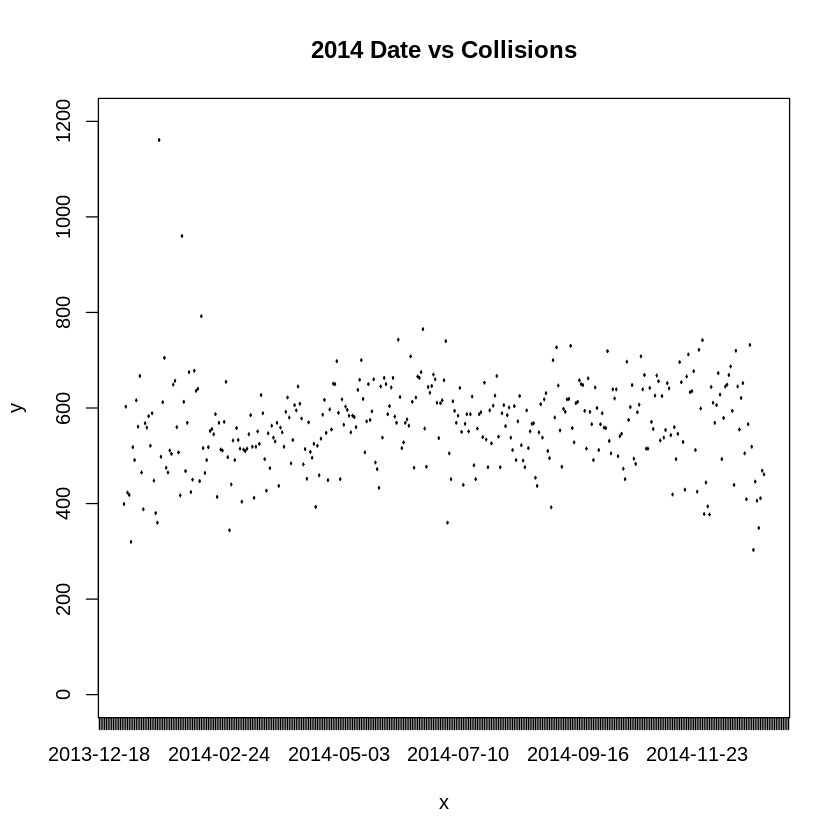

In [1604]:
plot(cd$collision_date[366:730], cd$num_collisions[366:730], main="2014 Date vs Collisions", xlim=c(366, 730), ylim=c(0,1200))

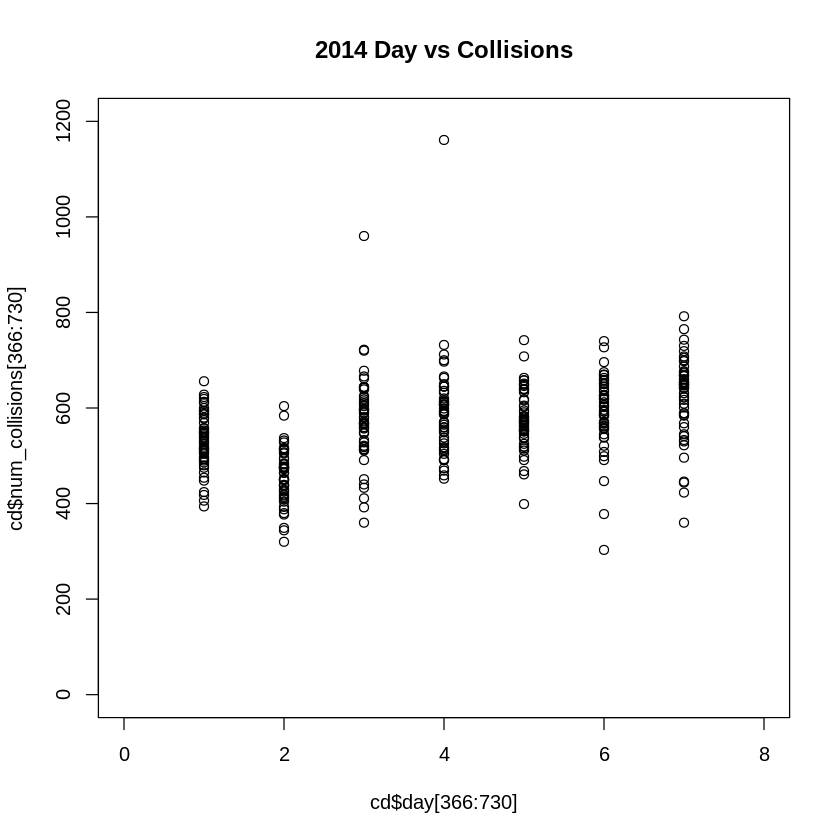

In [1605]:
plot(cd$day[366:730], cd$num_collisions[366:730], main="2014 Day vs Collisions", xlim=c(0, 8), ylim=c(0,1200))

In [1606]:
cor(cd$day[366:730], cd$num_collisions[366:730])

[1] 0.4158984

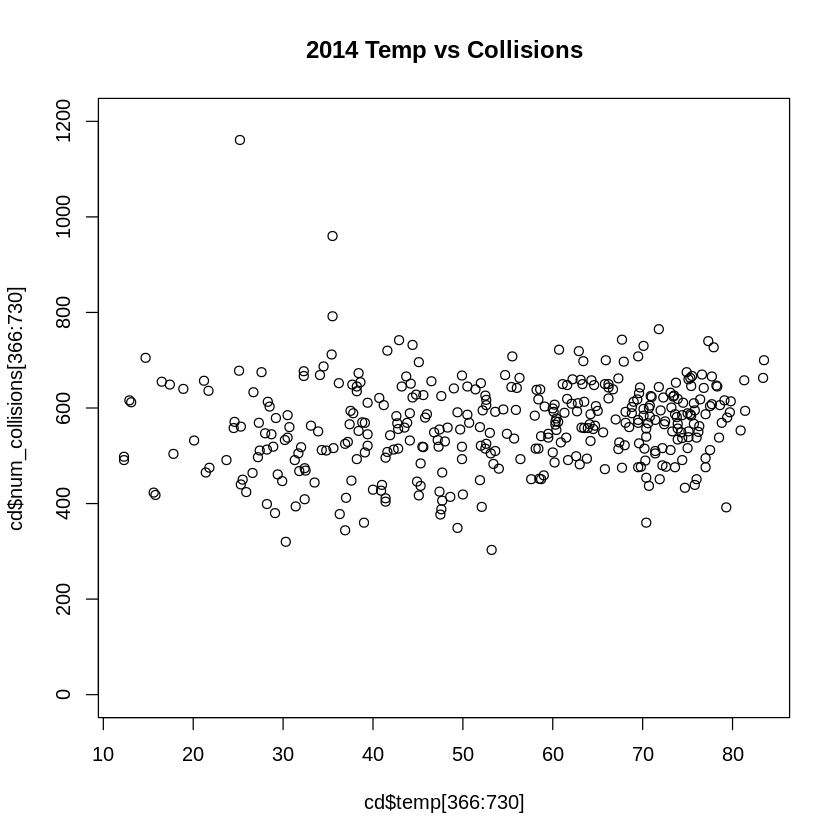

In [1607]:
plot(cd$temp[366:730], cd$num_collisions[366:730], main="2014 Temp vs Collisions",  ylim=c(0,1200))

In [1608]:
cor(cd$temp[366:730], cd$num_collisions[366:730])

[1] 0.143391

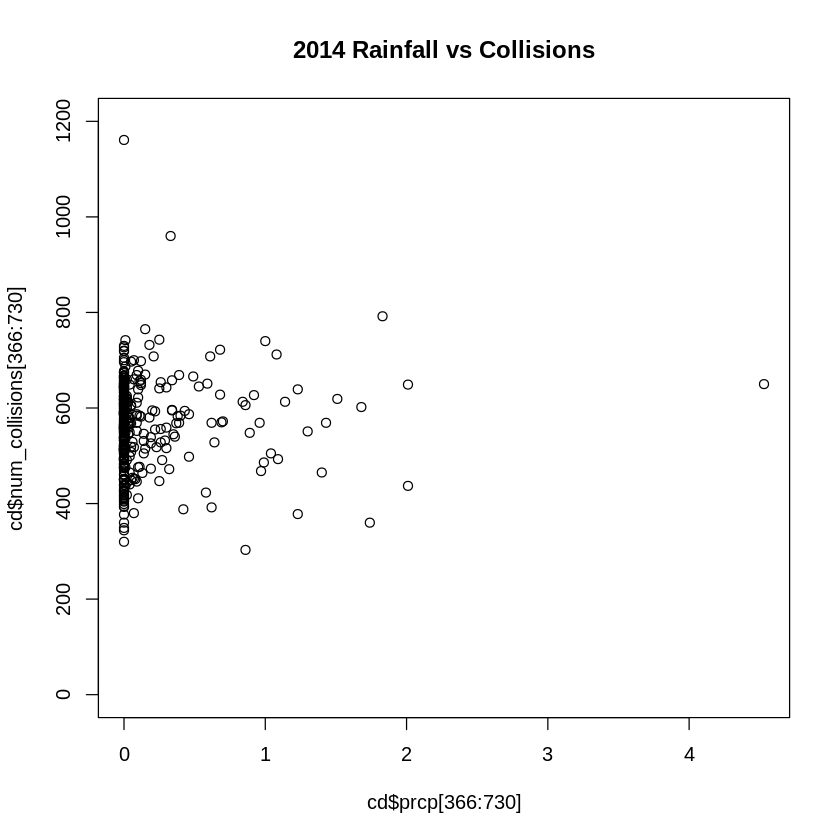

In [1609]:
plot(cd$prcp[366:730], cd$num_collisions[366:730], main="2014 Rainfall vs Collisions",  ylim=c(0,1200))

In [1610]:
cor(cd$prcp[366:730], cd$num_collisions[366:730])

[1] 0.04257208

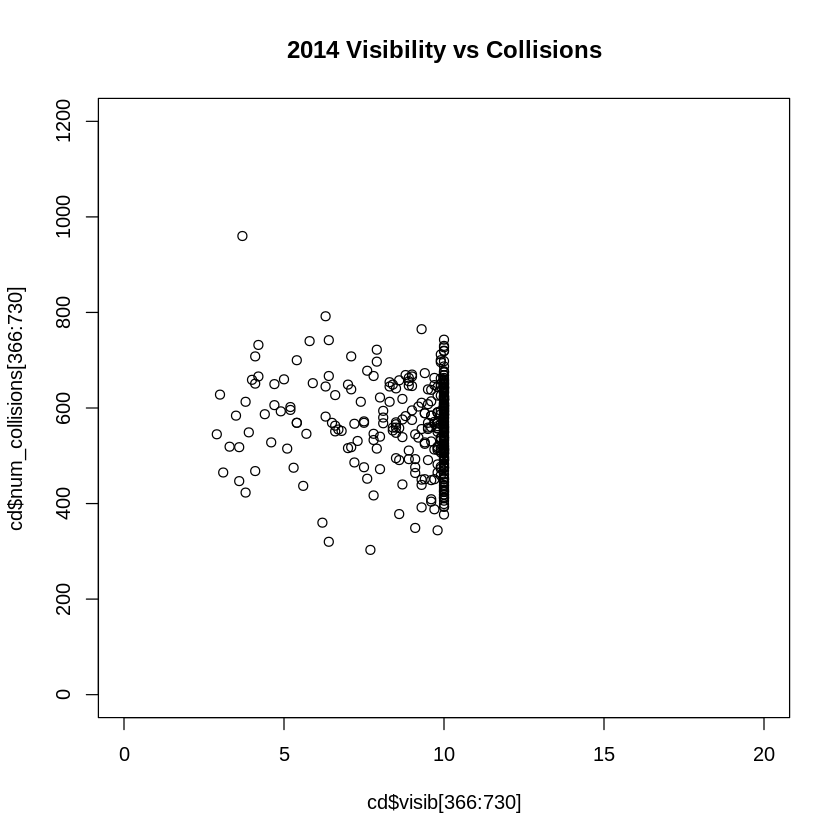

In [1611]:
plot(cd$visib[366:730], cd$num_collisions[366:730], main="2014 Visibility vs Collisions", xlim=c(0,20), ylim=c(0,1200))

In [1612]:
cor(cd$visib[366:730], cd$num_collisions[366:730])

[1] 0.0206533

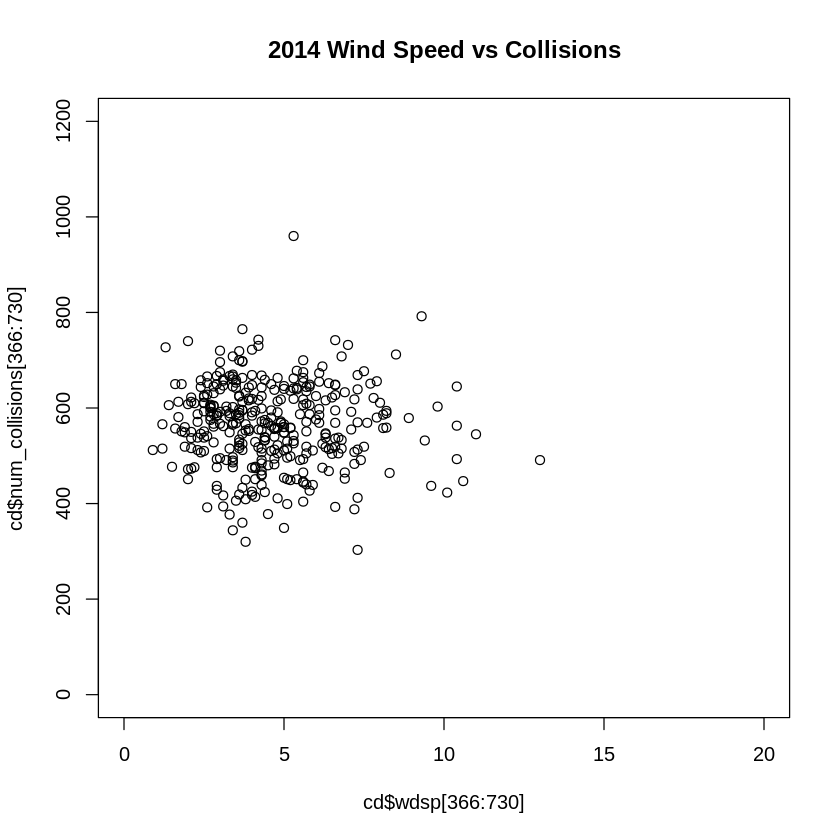

In [1613]:
plot(cd$wdsp[366:730], cd$num_collisions[366:730], main="2014 Wind Speed vs Collisions", xlim=c(0,20), ylim=c(0,1200))

In [1614]:
cor(cd$wdsp[366:730], cd$num_collisions[366:730])

[1] 0.03624262

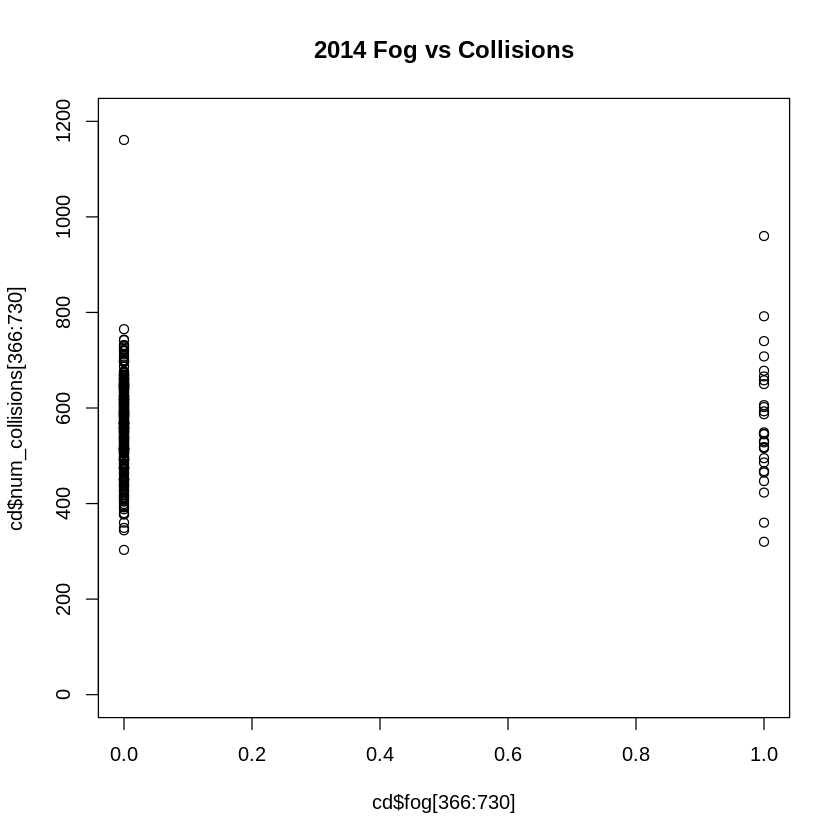

In [1615]:
plot(cd$fog[366:730], cd$num_collisions[366:730], main="2014 Fog vs Collisions", ylim=c(0,1200))

In [1616]:
cor(cd$fog[366:730], cd$num_collisions[366:730])

[1] 0.0165839

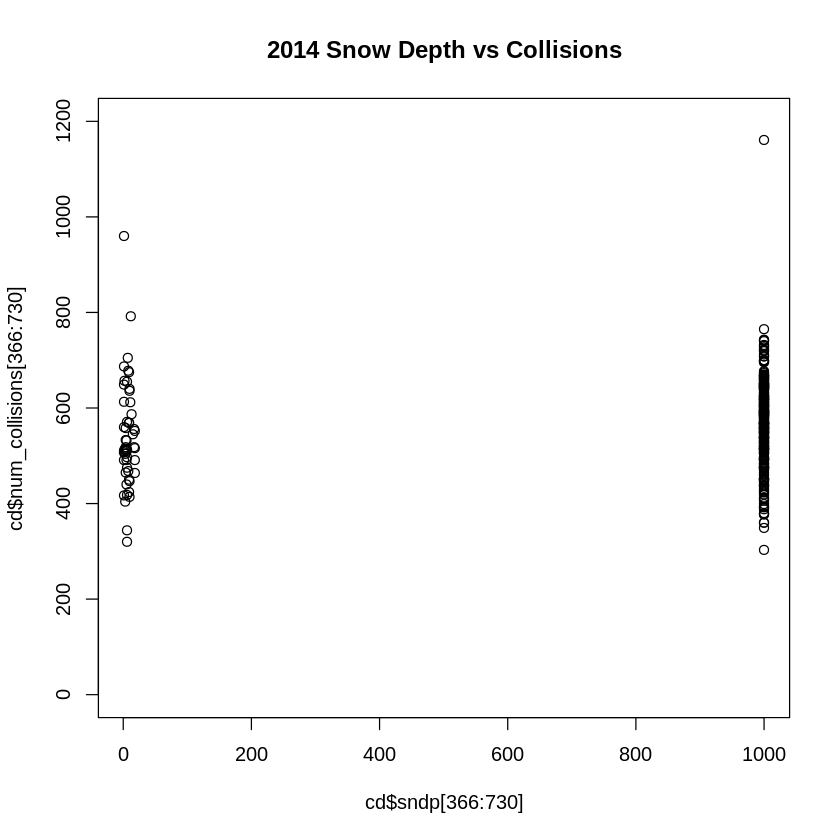

In [1617]:
plot(cd$sndp[366:730], cd$num_collisions[366:730], main="2014 Snow Depth vs Collisions", ylim=c(0,1200))

In [1618]:
cor(cd$sndp[366:730], cd$num_collisions[366:730])

[1] 0.1061564

In [1619]:
summary(cd$num_collisions[366:730])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  303.0   510.0   568.0   564.5   623.0  1161.0 

In [1620]:
cd$collision_date[731:1095]

[1] 2015-01-01 2015-01-02 2015-01-03 2015-01-04 2015-01-05 2015-01-06
  [7] 2015-01-07 2015-01-08 2015-01-09 2015-01-10 2015-01-11 2015-01-12
 [13] 2015-01-13 2015-01-14 2015-01-15 2015-01-16 2015-01-17 2015-01-18
 [19] 2015-01-19 2015-01-20 2015-01-21 2015-01-22 2015-01-23 2015-01-24
 [25] 2015-01-25 2015-01-26 2015-01-27 2015-01-28 2015-01-29 2015-01-30
 [31] 2015-01-31 2015-02-01 2015-02-02 2015-02-03 2015-02-04 2015-02-05
 [37] 2015-02-06 2015-02-07 2015-02-08 2015-02-09 2015-02-10 2015-02-11
 [43] 2015-02-12 2015-02-13 2015-02-14 2015-02-15 2015-02-16 2015-02-17
 [49] 2015-02-18 2015-02-19 2015-02-20 2015-02-21 2015-02-22 2015-02-23
 [55] 2015-02-24 2015-02-25 2015-02-26 2015-02-27 2015-02-28 2015-03-01
 [61] 2015-03-02 2015-03-03 2015-03-04 2015-03-05 2015-03-06 2015-03-07
 [67] 2015-03-08 2015-03-09 2015-03-10 2015-03-11 2015-03-12 2015-03-13
 [73] 2015-03-14 2015-03-15 2015-03-16 2015-03-17 2015-03-18 2015-03-19
 [79] 2015-03-20 2015-03-21 2015-03-22 2015-03-23 2015-03-24 2015-03-25
 [85] 2015-03-26 2015-03-27 2015-03-28 2015-03-29 2015-03-30 2015-03-31
 [91] 2015-04-01 2015-04-02 2015-04-03 2015-04-04 2015-04-05 2015-04-06
 [97] 2015-04-07 2015-04-08 2015-04-09 2015-04-10 2015-04-11 2015-04-12
[103] 2015-04-13 2015-04-14 2015-04-15 2015-04-16 2015-04-17 2015-04-18
[109] 2015-04-19 2015-04-20 2015-04-21 2015-04-22 2015-04-23 2015-04-24
[115] 2015-04-25 2015-04-26 2015-04-27 2015-04-28 2015-04-29 2015-04-30
[121] 2015-05-01 2015-05-02 2015-05-03 2015-05-04 2015-05-05 2015-05-06
[127] 2015-05-07 2015-05-08 2015-05-09 2015-05-10 2015-05-11 2015-05-12
[133] 2015-05-13 2015-05-14 2015-05-15 2015-05-16 2015-05-17 2015-05-18
[139] 2015-05-19 2015-05-20 2015-05-21 2015-05-22 2015-05-23 2015-05-24
[145] 2015-05-25 2015-05-26 2015-05-27 2015-05-28 2015-05-29 2015-05-30
[151] 2015-05-31 2015-06-01 2015-06-02 2015-06-03 2015-06-04 2015-06-05
[157] 2015-06-06 2015-06-07 2015-06-08 2015-06-09 2015-06-10 2015-06-11
[163] 2015-06-12 2015-06-13 2015-06-14 2015-06-15 2015-06-16 2015-06-17
[169] 2015-06-18 2015-06-19 2015-06-20 2015-06-21 2015-06-22 2015-06-23
[175] 2015-06-24 2015-06-25 2015-06-26 2015-06-27 2015-06-28 2015-06-29
[181] 2015-06-30 2015-07-01 2015-07-02 2015-07-03 2015-07-04 2015-07-05
[187] 2015-07-06 2015-07-07 2015-07-08 2015-07-09 2015-07-10 2015-07-11
[193] 2015-07-12 2015-07-13 2015-07-14 2015-07-15 2015-07-16 2015-07-17
[199] 2015-07-18 2015-07-19 2015-07-20 2015-07-21 2015-07-22 2015-07-23
[205] 2015-07-24 2015-07-25 2015-07-26 2015-07-27 2015-07-28 2015-07-29
[211] 2015-07-30 2015-07-31 2015-08-01 2015-08-02 2015-08-03 2015-08-04
[217] 2015-08-05 2015-08-06 2015-08-07 2015-08-08 2015-08-09 2015-08-10
[223] 2015-08-11 2015-08-12 2015-08-13 2015-08-14 2015-08-15 2015-08-16
[229] 2015-08-17 2015-08-18 2015-08-19 2015-08-20 2015-08-21 2015-08-22
[235] 2015-08-23 2015-08-24 2015-08-25 2015-08-26 2015-08-27 2015-08-28
[241] 2015-08-29 2015-08-30 2015-08-31 2015-09-01 2015-09-02 2015-09-03
[247] 2015-09-04 2015-09-05 2015-09-06 2015-09-07 2015-09-08 2015-09-09
[253] 2015-09-10 2015-09-11 2015-09-12 2015-09-13 2015-09-14 2015-09-15
[259] 2015-09-16 2015-09-17 2015-09-18 2015-09-19 2015-09-20 2015-09-21
[265] 2015-09-22 2015-09-23 2015-09-24 2015-09-25 2015-09-26 2015-09-27
[271] 2015-09-28 2015-09-29 2015-09-30 2015-10-01 2015-10-02 2015-10-03
[277] 2015-10-04 2015-10-05 2015-10-06 2015-10-07 2015-10-08 2015-10-09
[283] 2015-10-10 2015-10-11 2015-10-12 2015-10-13 2015-10-14 2015-10-15
[289] 2015-10-16 2015-10-17 2015-10-18 2015-10-19 2015-10-20 2015-10-21
[295] 2015-10-22 2015-10-23 2015-10-24 2015-10-25 2015-10-26 2015-10-27
[301] 2015-10-28 2015-10-29 2015-10-30 2015-10-31 2015-11-01 2015-11-02
[307] 2015-11-03 2015-11-04 2015-11-05 2015-11-06 2015-11-07 2015-11-08
[313] 2015-11-09 2015-11-10 2015-11-11 2015-11-12 2015-11-13 2015-11-14
[319] 2015-11-15 2015-11-16 2015-11-17 2015-11-18 2015-11-19 2015-11-20
[325] 2015-11-21 2015-11-22 2015-11-23 2015-11-24 2015-11-25 2015-11-26
[331] 2015-11-27 2015-11-28 2015-11-29 201

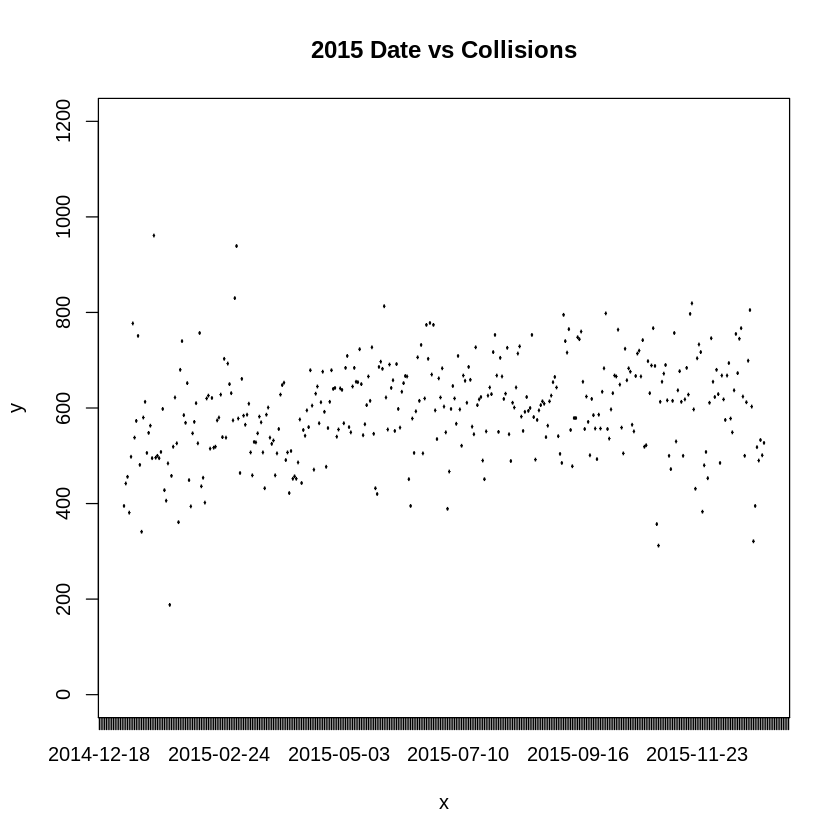

In [1621]:
plot(cd$collision_date[731:1095], cd$num_collisions[731:1095], main="2015 Date vs Collisions", xlim=c(731, 1095), ylim=c(0,1200))

2015 seems to have a few more outliers in the data compared to other years.

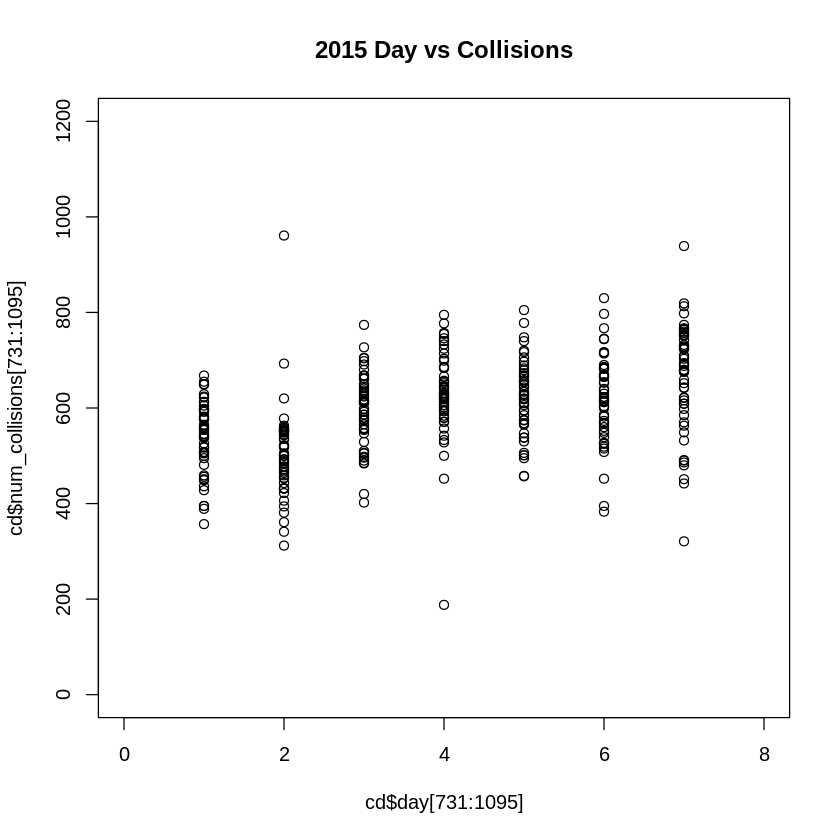

In [1622]:
plot(cd$day[731:1095], cd$num_collisions[731:1095], main="2015 Day vs Collisions", xlim=c(0, 8), ylim=c(0,1200))

In [1623]:
cor(cd$day[731:1095], cd$num_collisions[731:1095])

[1] 0.4367531

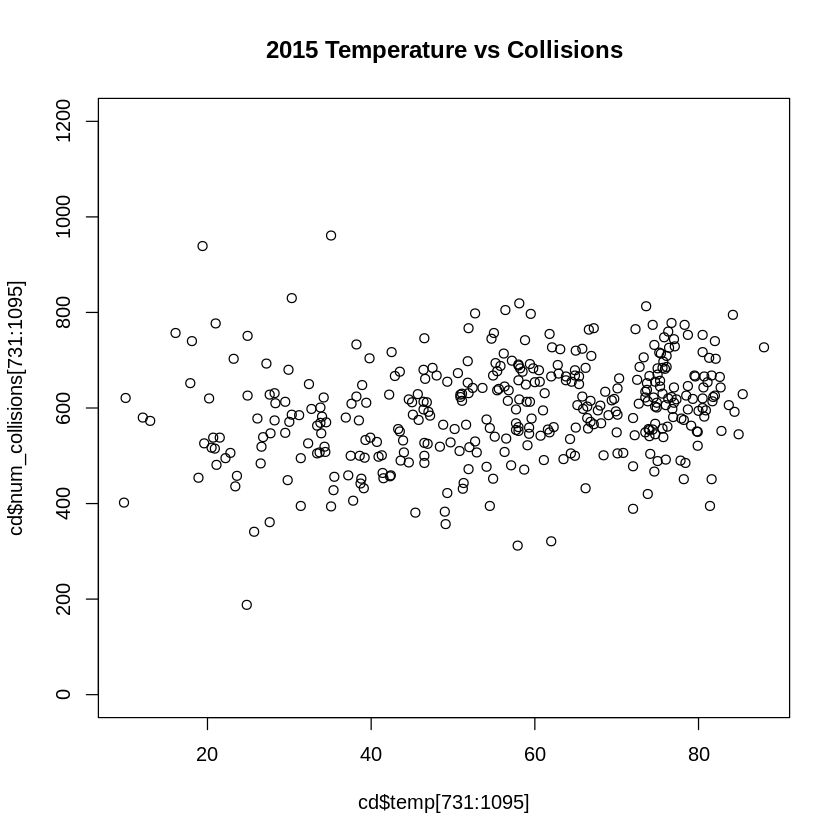

In [1624]:
plot(cd$temp[731:1095], cd$num_collisions[731:1095], main="2015 Temperature vs Collisions", ylim=c(0,1200))

In [1625]:
cor(cd$temp[731:1095], cd$num_collisions[731:1095])

[1] 0.2344425

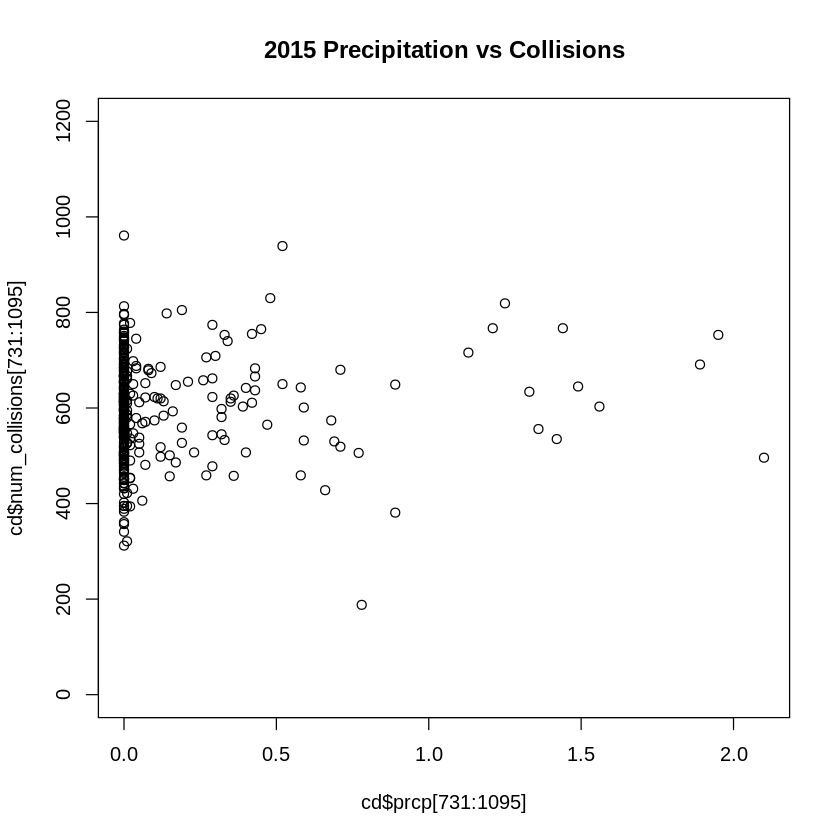

In [1626]:
plot(cd$prcp[731:1095], cd$num_collisions[731:1095], main="2015 Precipitation vs Collisions", ylim=c(0,1200))

In [1627]:
cor(cd$prcp[731:1095], cd$num_collisions[731:1095])

[1] 0.08155887

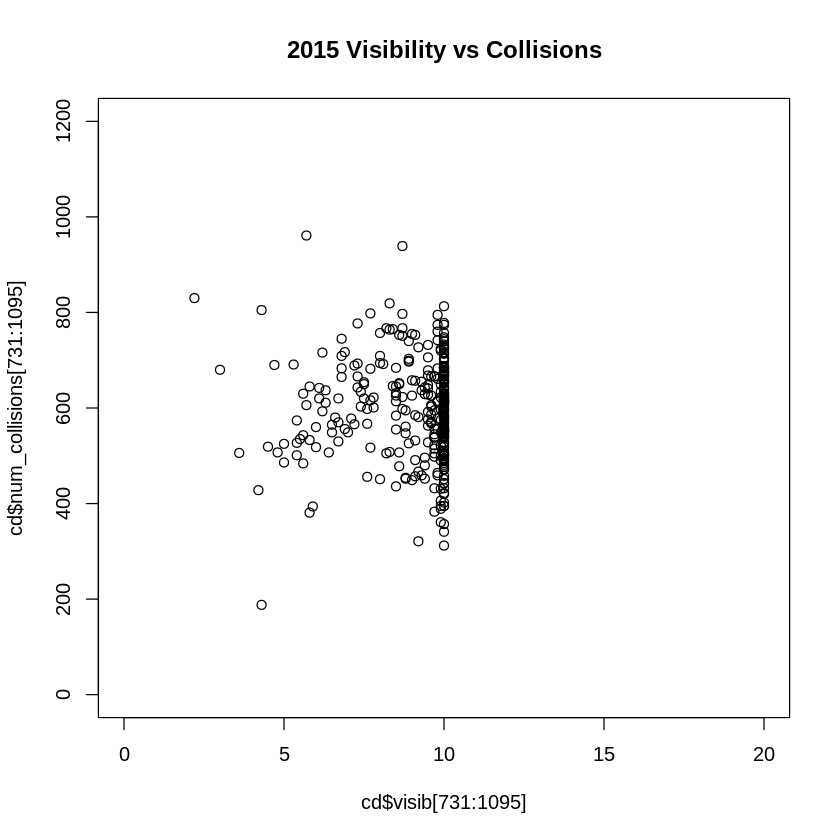

In [1628]:
plot(cd$visib[731:1095], cd$num_collisions[731:1095], main="2015 Visibility vs Collisions", xlim=c(0,20), ylim=c(0,1200))

In [1629]:
cor(cd$visib[731:1095], cd$num_collisions[731:1095])

[1] 0.0234899

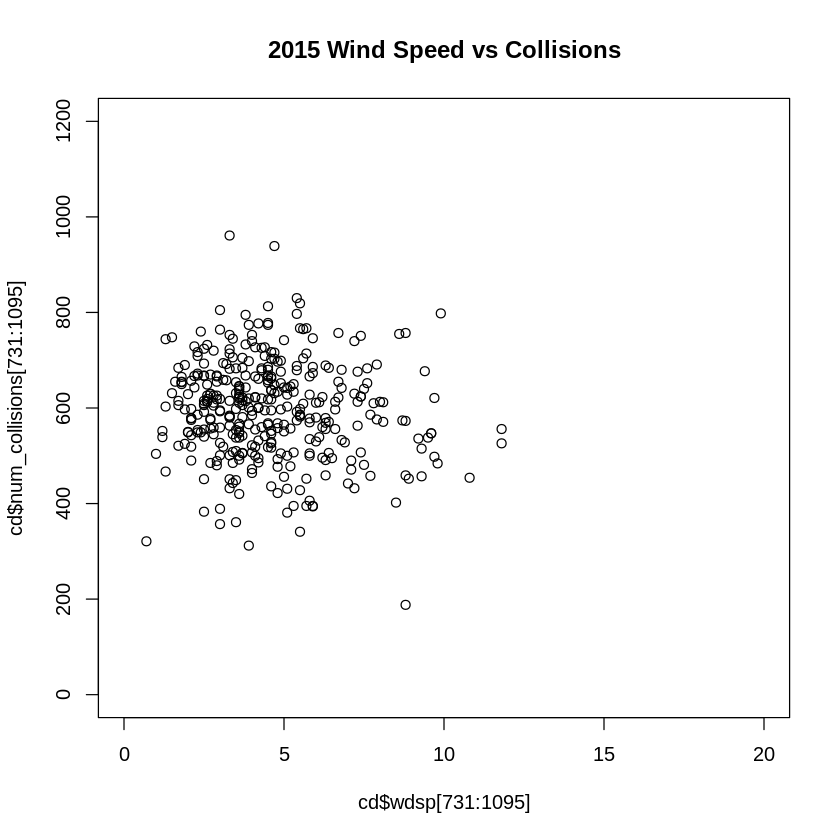

In [1630]:
plot(cd$wdsp[731:1095], cd$num_collisions[731:1095], main="2015 Wind Speed vs Collisions", xlim=c(0,20), ylim=c(0,1200))

In [1631]:
cor(cd$wdsp[731:1095], cd$num_collisions[731:1095])

[1] -0.08678412

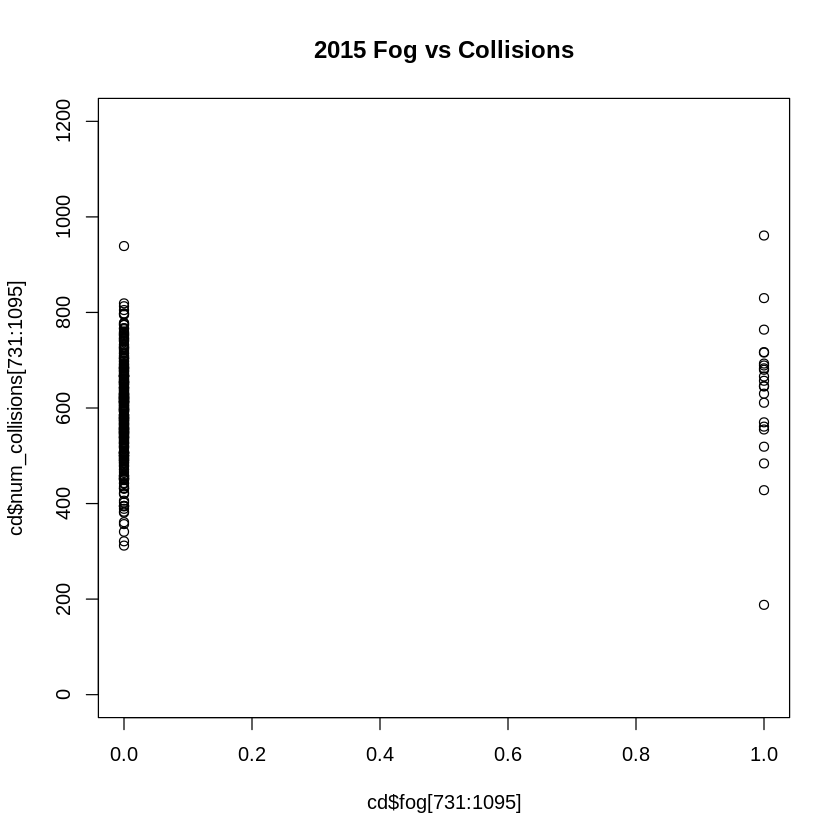

In [1632]:
plot(cd$fog[731:1095], cd$num_collisions[731:1095], main="2015 Fog vs Collisions", ylim=c(0,1200))

In [1633]:
cor(cd$fog[731:1095], cd$num_collisions[731:1095])

[1] 0.08653584

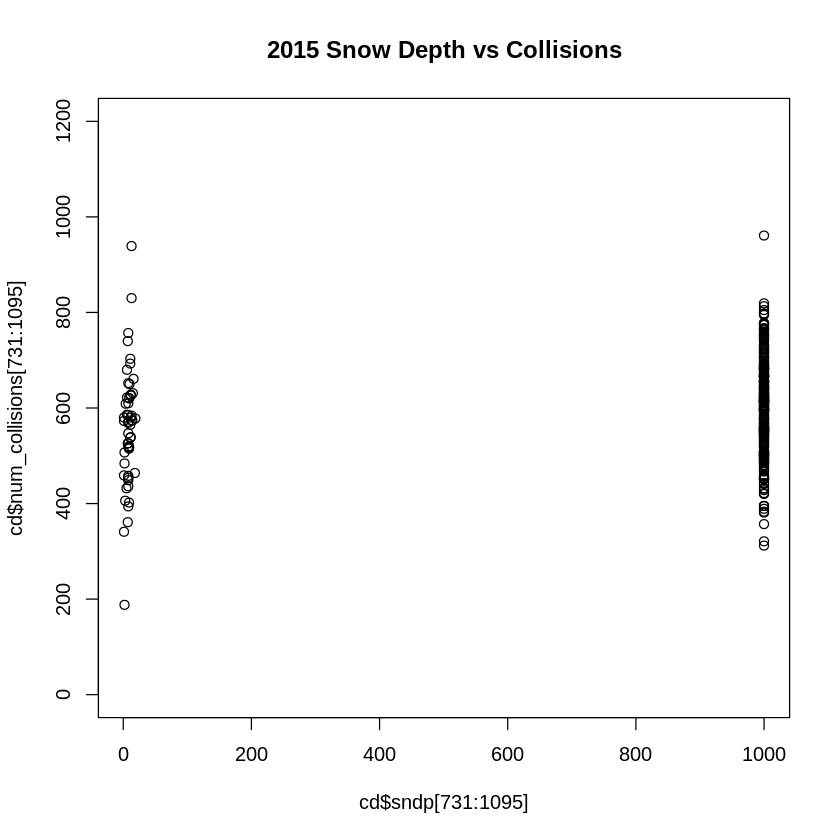

In [1634]:
plot(cd$sndp[731:1095], cd$num_collisions[731:1095], main="2015 Snow Depth vs Collisions", ylim=c(0,1200))

In [1635]:
cor(cd$sndp[731:1095], cd$num_collisions[731:1095])

[1] 0.1537696

In [1636]:
summary(cd$num_collisions[731:1095])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  188.0   532.0   601.0   596.4   666.0   961.0 

In [1637]:
cd$collision_date[1096:1461]

[1] 2016-01-01 2016-01-02 2016-01-03 2016-01-04 2016-01-05 2016-01-06
  [7] 2016-01-07 2016-01-08 2016-01-09 2016-01-10 2016-01-11 2016-01-12
 [13] 2016-01-13 2016-01-14 2016-01-15 2016-01-16 2016-01-17 2016-01-18
 [19] 2016-01-19 2016-01-20 2016-01-21 2016-01-22 2016-01-23 2016-01-24
 [25] 2016-01-25 2016-01-26 2016-01-27 2016-01-28 2016-01-29 2016-01-30
 [31] 2016-01-31 2016-02-01 2016-02-02 2016-02-03 2016-02-04 2016-02-05
 [37] 2016-02-06 2016-02-07 2016-02-08 2016-02-09 2016-02-10 2016-02-11
 [43] 2016-02-12 2016-02-13 2016-02-14 2016-02-15 2016-02-16 2016-02-17
 [49] 2016-02-18 2016-02-19 2016-02-20 2016-02-21 2016-02-22 2016-02-23
 [55] 2016-02-24 2016-02-25 2016-02-26 2016-02-27 2016-02-28 2016-02-29
 [61] 2016-03-01 2016-03-02 2016-03-03 2016-03-04 2016-03-05 2016-03-06
 [67] 2016-03-07 2016-03-08 2016-03-09 2016-03-10 2016-03-11 2016-03-12
 [73] 2016-03-13 2016-03-14 2016-03-15 2016-03-16 2016-03-17 2016-03-18
 [79] 2016-03-19 2016-03-20 2016-03-21 2016-03-22 2016-03-23 2016-03-24
 [85] 2016-03-25 2016-03-26 2016-03-27 2016-03-28 2016-03-29 2016-03-30
 [91] 2016-03-31 2016-04-01 2016-04-02 2016-04-03 2016-04-04 2016-04-05
 [97] 2016-04-06 2016-04-07 2016-04-08 2016-04-09 2016-04-10 2016-04-11
[103] 2016-04-12 2016-04-13 2016-04-14 2016-04-15 2016-04-16 2016-04-17
[109] 2016-04-18 2016-04-19 2016-04-20 2016-04-21 2016-04-22 2016-04-23
[115] 2016-04-24 2016-04-25 2016-04-26 2016-04-27 2016-04-28 2016-04-29
[121] 2016-04-30 2016-05-01 2016-05-02 2016-05-03 2016-05-04 2016-05-05
[127] 2016-05-06 2016-05-07 2016-05-08 2016-05-09 2016-05-10 2016-05-11
[133] 2016-05-12 2016-05-13 2016-05-14 2016-05-15 2016-05-16 2016-05-17
[139] 2016-05-18 2016-05-19 2016-05-20 2016-05-21 2016-05-22 2016-05-23
[145] 2016-05-24 2016-05-25 2016-05-26 2016-05-27 2016-05-28 2016-05-29
[151] 2016-05-30 2016-05-31 2016-06-01 2016-06-02 2016-06-03 2016-06-04
[157] 2016-06-05 2016-06-06 2016-06-07 2016-06-08 2016-06-09 2016-06-10
[163] 2016-06-11 2016-06-12 2016-06-13 2016-06-14 2016-06-15 2016-06-16
[169] 2016-06-17 2016-06-18 2016-06-19 2016-06-20 2016-06-21 2016-06-22
[175] 2016-06-23 2016-06-24 2016-06-25 2016-06-26 2016-06-27 2016-06-28
[181] 2016-06-29 2016-06-30 2016-07-01 2016-07-02 2016-07-03 2016-07-04
[187] 2016-07-05 2016-07-06 2016-07-07 2016-07-08 2016-07-09 2016-07-10
[193] 2016-07-11 2016-07-12 2016-07-13 2016-07-14 2016-07-15 2016-07-16
[199] 2016-07-17 2016-07-18 2016-07-19 2016-07-20 2016-07-21 2016-07-22
[205] 2016-07-23 2016-07-24 2016-07-25 2016-07-26 2016-07-27 2016-07-28
[211] 2016-07-29 2016-07-30 2016-07-31 2016-08-01 2016-08-02 2016-08-03
[217] 2016-08-04 2016-08-05 2016-08-06 2016-08-07 2016-08-08 2016-08-09
[223] 2016-08-10 2016-08-11 2016-08-12 2016-08-13 2016-08-14 2016-08-15
[229] 2016-08-16 2016-08-17 2016-08-18 2016-08-19 2016-08-20 2016-08-21
[235] 2016-08-22 2016-08-23 2016-08-24 2016-08-25 2016-08-26 2016-08-27
[241] 2016-08-28 2016-08-29 2016-08-30 2016-08-31 2016-09-01 2016-09-02
[247] 2016-09-03 2016-09-04 2016-09-05 2016-09-06 2016-09-07 2016-09-08
[253] 2016-09-09 2016-09-10 2016-09-11 2016-09-12 2016-09-13 2016-09-14
[259] 2016-09-15 2016-09-16 2016-09-17 2016-09-18 2016-09-19 2016-09-20
[265] 2016-09-21 2016-09-22 2016-09-23 2016-09-24 2016-09-25 2016-09-26
[271] 2016-09-27 2016-09-28 2016-09-29 2016-09-30 2016-10-01 2016-10-02
[277] 2016-10-03 2016-10-04 2016-10-05 2016-10-06 2016-10-07 2016-10-08
[283] 2016-10-09 2016-10-10 2016-10-11 2016-10-12 2016-10-13 2016-10-14
[289] 2016-10-15 2016-10-16 2016-10-17 2016-10-18 2016-10-19 2016-10-20
[295] 2016-10-21 2016-10-22 2016-10-23 2016-10-24 2016-10-25 2016-10-26
[301] 2016-10-27 2016-10-28 2016-10-29 2016-10-30 2016-10-31 2016-11-01
[307] 2016-11-02 2016-11-03 2016-11-04 2016-11-05 2016-11-06 2016-11-07
[313] 2016-11-08 2016-11-09 2016-11-10 2016-11-11 2016-11-12 2016-11-13
[319] 2016-11-14 2016-11-15 2016-11-16 2016-11-17 2016-11-18 2016-11-19
[325] 2016-11-20 2016-11-21 2016-11-22 2016-11-23 2016-11-24 2016-11-25
[331] 2016-11-26 2016-11-27 2016-11-28 201

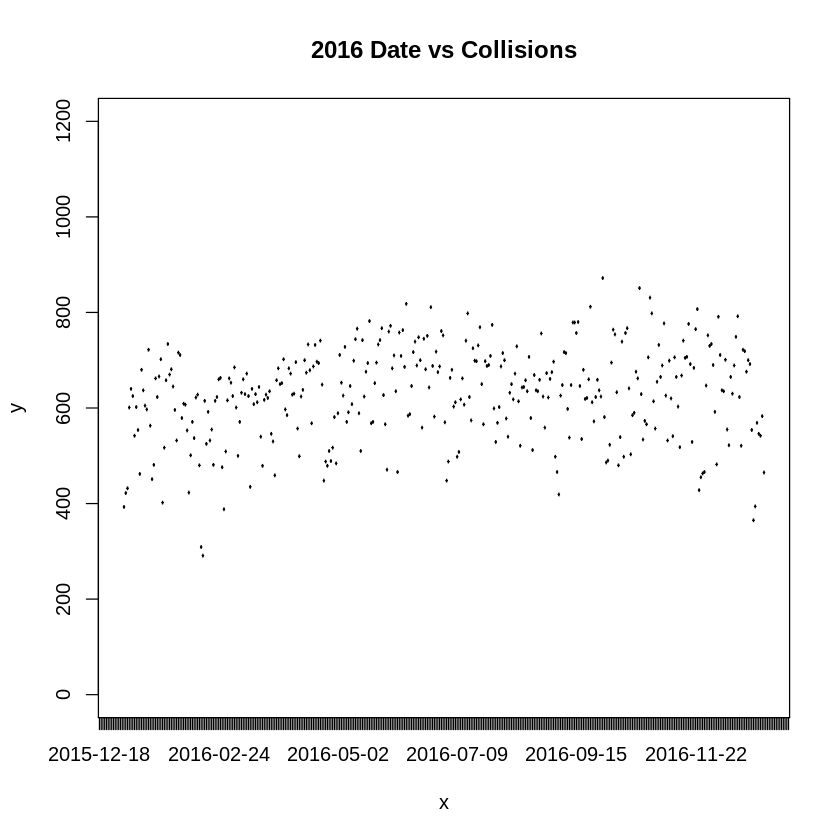

In [1638]:
plot(cd$collision_date[1096:1461], cd$num_collisions[1096:1461], main="2016 Date vs Collisions", xlim=c(1096,1461), ylim=c(0,1200))

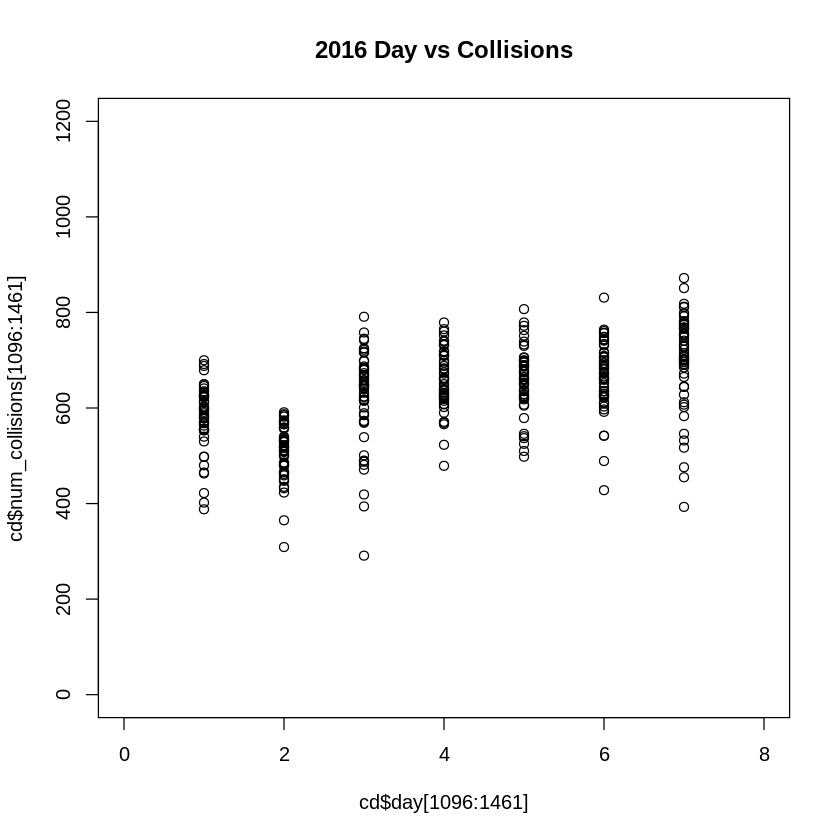

In [1639]:
plot(cd$day[1096:1461], cd$num_collisions[1096:1461], main="2016 Day vs Collisions", xlim=c(0, 8), ylim=c(0,1200))

In [1640]:
cor(cd$day[1096:1461], cd$num_collisions[1096:1461])

[1] 0.5265508

Stronger correlation between day and number of collisions in 2015.

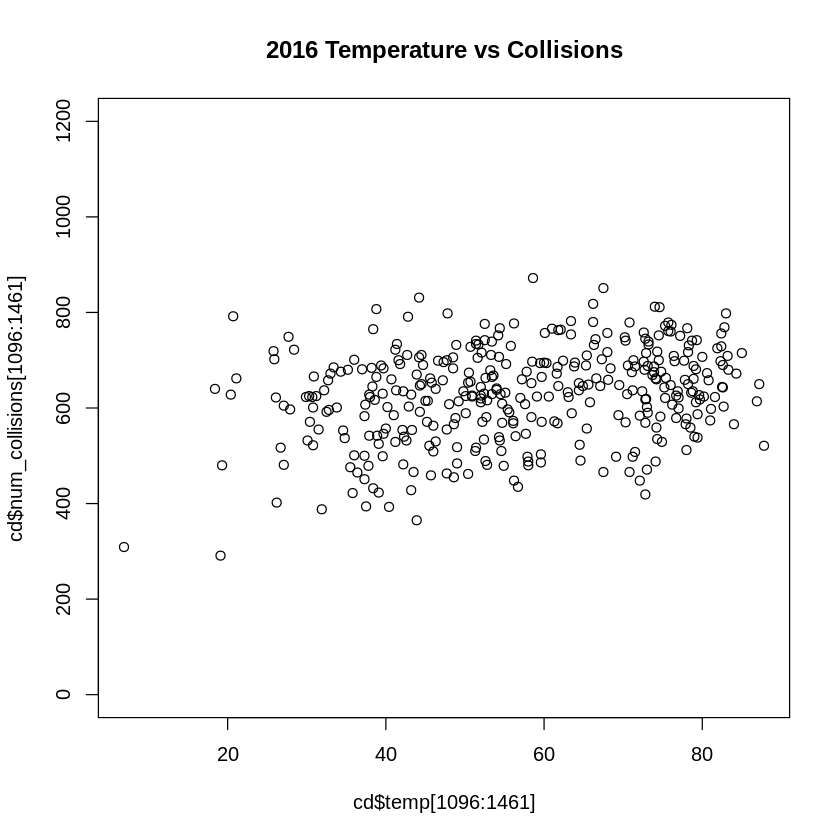

In [1641]:
plot(cd$temp[1096:1461], cd$num_collisions[1096:1461], main="2016 Temperature vs Collisions", ylim=c(0,1200))

In [1642]:
cor(cd$temp[1096:1461], cd$num_collisions[1096:1461])

[1] 0.2739325

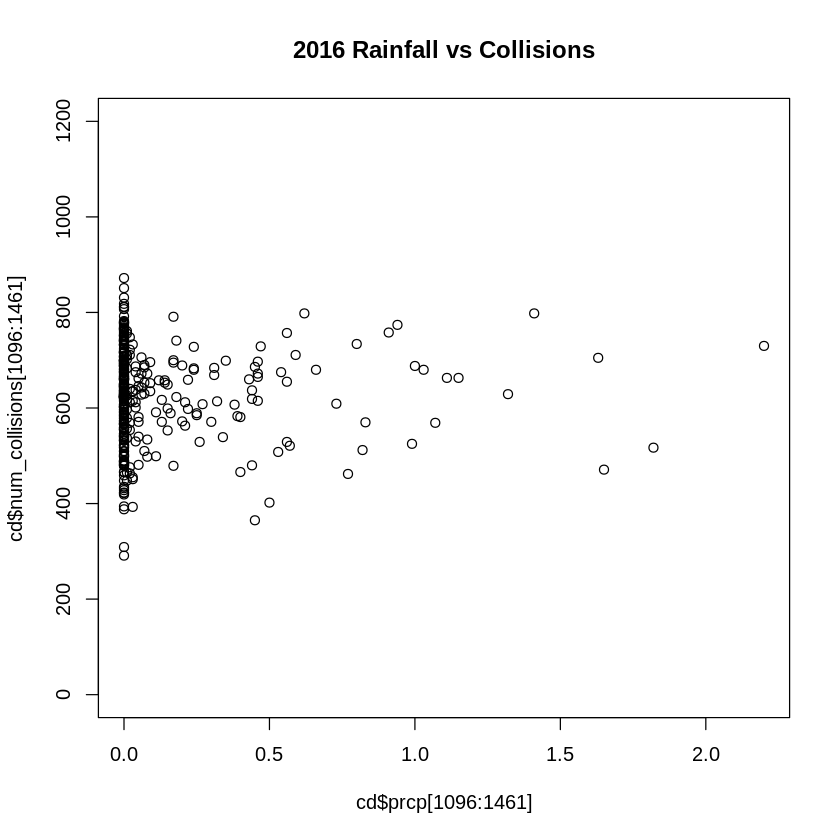

In [1643]:
plot(cd$prcp[1096:1461], cd$num_collisions[1096:1461], main="2016 Rainfall vs Collisions", ylim=c(0,1200))

In [1644]:
cor(cd$prcp[1096:1461], cd$num_collisions[1096:1461])

[1] 0.00466323

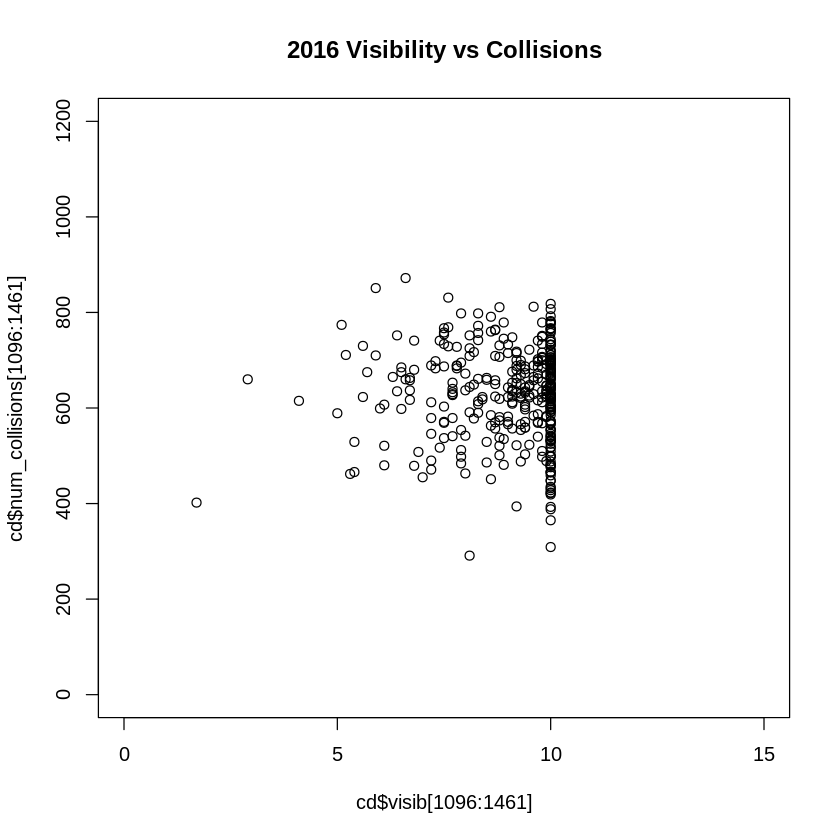

In [1645]:
plot(cd$visib[1096:1461], cd$num_collisions[1096:1461], main="2016 Visibility vs Collisions", xlim=c(0,15), ylim=c(0,1200))

In [1646]:
cor(cd$visib[1096:1461], cd$num_collisions[1096:1461])

[1] 0.0360713

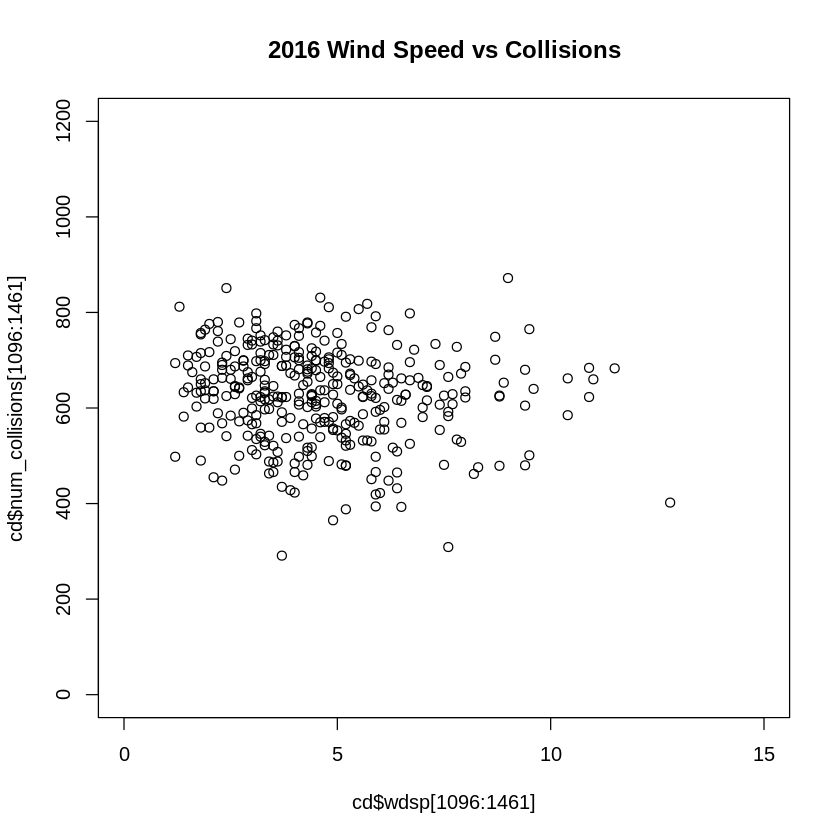

In [1647]:
plot(cd$wdsp[1096:1461], cd$num_collisions[1096:1461], main="2016 Wind Speed vs Collisions", xlim=c(0,15), ylim=c(0,1200))

In [1648]:
cor(cd$wdsp[1096:1461], cd$num_collisions[1096:1461])

[1] 0.05999247

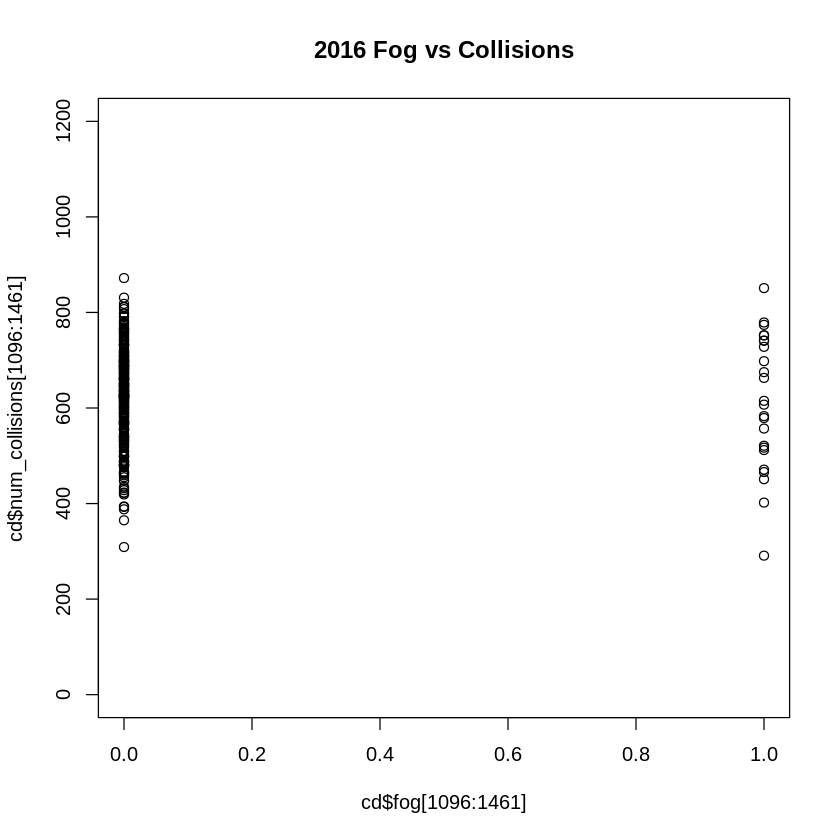

In [1649]:
plot(cd$fog[1096:1461], cd$num_collisions[1096:1461], main="2016 Fog vs Collisions", ylim=c(0,1200))

In [1650]:
cor(cd$fog[1096:1461], cd$num_collisions[1096:1461])

[1] -0.03912368

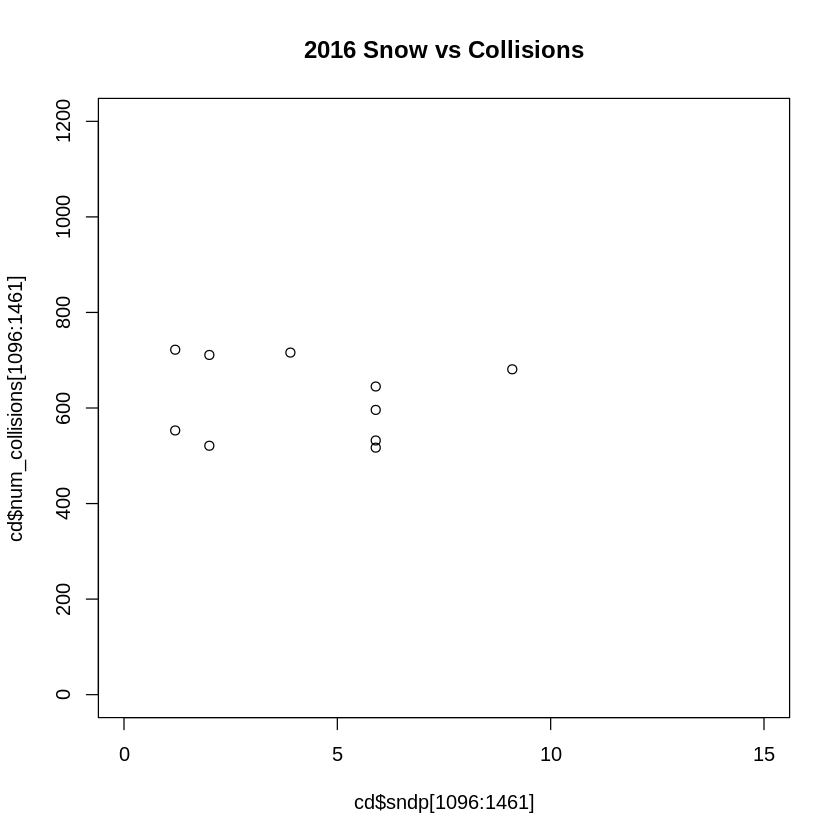

In [1651]:
plot(cd$sndp[1096:1461], cd$num_collisions[1096:1461], main="2016 Snow vs Collisions",xlim=c(0,15), ylim=c(0,1200))

In [1652]:
cor(cd$sndp[1096:1461], cd$num_collisions[1096:1461])

[1] -0.01372012

In [1653]:
summary(cd$num_collisions[1096:1461])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  291.0   568.2   635.0   628.0   696.8   872.0 

In [1654]:
cd$collision_date[1462:1826]

[1] 2017-01-01 2017-01-02 2017-01-03 2017-01-04 2017-01-05 2017-01-06
  [7] 2017-01-07 2017-01-08 2017-01-09 2017-01-10 2017-01-11 2017-01-12
 [13] 2017-01-13 2017-01-14 2017-01-15 2017-01-16 2017-01-17 2017-01-18
 [19] 2017-01-19 2017-01-20 2017-01-21 2017-01-22 2017-01-23 2017-01-24
 [25] 2017-01-25 2017-01-26 2017-01-27 2017-01-28 2017-01-29 2017-01-30
 [31] 2017-01-31 2017-02-01 2017-02-02 2017-02-03 2017-02-04 2017-02-05
 [37] 2017-02-06 2017-02-07 2017-02-08 2017-02-09 2017-02-10 2017-02-11
 [43] 2017-02-12 2017-02-13 2017-02-14 2017-02-15 2017-02-16 2017-02-17
 [49] 2017-02-18 2017-02-19 2017-02-20 2017-02-21 2017-02-22 2017-02-23
 [55] 2017-02-24 2017-02-25 2017-02-26 2017-02-27 2017-02-28 2017-03-01
 [61] 2017-03-02 2017-03-03 2017-03-04 2017-03-05 2017-03-06 2017-03-07
 [67] 2017-03-08 2017-03-09 2017-03-10 2017-03-11 2017-03-12 2017-03-13
 [73] 2017-03-14 2017-03-15 2017-03-16 2017-03-17 2017-03-18 2017-03-19
 [79] 2017-03-20 2017-03-21 2017-03-22 2017-03-23 2017-03-24 2017-03-25
 [85] 2017-03-26 2017-03-27 2017-03-28 2017-03-29 2017-03-30 2017-03-31
 [91] 2017-04-01 2017-04-02 2017-04-03 2017-04-04 2017-04-05 2017-04-06
 [97] 2017-04-07 2017-04-08 2017-04-09 2017-04-10 2017-04-11 2017-04-12
[103] 2017-04-13 2017-04-14 2017-04-15 2017-04-16 2017-04-17 2017-04-18
[109] 2017-04-19 2017-04-20 2017-04-21 2017-04-22 2017-04-23 2017-04-24
[115] 2017-04-25 2017-04-26 2017-04-27 2017-04-28 2017-04-29 2017-04-30
[121] 2017-05-01 2017-05-02 2017-05-03 2017-05-04 2017-05-05 2017-05-06
[127] 2017-05-07 2017-05-08 2017-05-09 2017-05-10 2017-05-11 2017-05-12
[133] 2017-05-13 2017-05-14 2017-05-15 2017-05-16 2017-05-17 2017-05-18
[139] 2017-05-19 2017-05-20 2017-05-21 2017-05-22 2017-05-23 2017-05-24
[145] 2017-05-25 2017-05-26 2017-05-27 2017-05-28 2017-05-29 2017-05-30
[151] 2017-05-31 2017-06-01 2017-06-02 2017-06-03 2017-06-04 2017-06-05
[157] 2017-06-06 2017-06-07 2017-06-08 2017-06-09 2017-06-10 2017-06-11
[163] 2017-06-12 2017-06-13 2017-06-14 2017-06-15 2017-06-16 2017-06-17
[169] 2017-06-18 2017-06-19 2017-06-20 2017-06-21 2017-06-22 2017-06-23
[175] 2017-06-24 2017-06-25 2017-06-26 2017-06-27 2017-06-28 2017-06-29
[181] 2017-06-30 2017-07-01 2017-07-02 2017-07-03 2017-07-04 2017-07-05
[187] 2017-07-06 2017-07-07 2017-07-08 2017-07-09 2017-07-10 2017-07-11
[193] 2017-07-12 2017-07-13 2017-07-14 2017-07-15 2017-07-16 2017-07-17
[199] 2017-07-18 2017-07-19 2017-07-20 2017-07-21 2017-07-22 2017-07-23
[205] 2017-07-24 2017-07-25 2017-07-26 2017-07-27 2017-07-28 2017-07-29
[211] 2017-07-30 2017-07-31 2017-08-01 2017-08-02 2017-08-03 2017-08-04
[217] 2017-08-05 2017-08-06 2017-08-07 2017-08-08 2017-08-09 2017-08-10
[223] 2017-08-11 2017-08-12 2017-08-13 2017-08-14 2017-08-15 2017-08-16
[229] 2017-08-17 2017-08-18 2017-08-19 2017-08-20 2017-08-21 2017-08-22
[235] 2017-08-23 2017-08-24 2017-08-25 2017-08-26 2017-08-27 2017-08-28
[241] 2017-08-29 2017-08-30 2017-08-31 2017-09-01 2017-09-02 2017-09-03
[247] 2017-09-04 2017-09-05 2017-09-06 2017-09-07 2017-09-08 2017-09-09
[253] 2017-09-10 2017-09-11 2017-09-12 2017-09-13 2017-09-14 2017-09-15
[259] 2017-09-16 2017-09-17 2017-09-18 2017-09-19 2017-09-20 2017-09-21
[265] 2017-09-22 2017-09-23 2017-09-24 2017-09-25 2017-09-26 2017-09-27
[271] 2017-09-28 2017-09-29 2017-09-30 2017-10-01 2017-10-02 2017-10-03
[277] 2017-10-04 2017-10-05 2017-10-06 2017-10-07 2017-10-08 2017-10-09
[283] 2017-10-10 2017-10-11 2017-10-12 2017-10-13 2017-10-14 2017-10-15
[289] 2017-10-16 2017-10-17 2017-10-18 2017-10-19 2017-10-20 2017-10-21
[295] 2017-10-22 2017-10-23 2017-10-24 2017-10-25 2017-10-26 2017-10-27
[301] 2017-10-28 2017-10-29 2017-10-30 2017-10-31 2017-11-01 2017-11-02
[307] 2017-11-03 2017-11-04 2017-11-05 2017-11-06 2017-11-07 2017-11-08
[313] 2017-11-09 2017-11-10 2017-11-11 2017-11-12 2017-11-13 2017-11-14
[319] 2017-11-15 2017-11-16 2017-11-17 2017-11-18 2017-11-19 2017-11-20
[325] 2017-11-21 2017-11-22 2017-11-23 2017-11-24 2017-11-25 2017-11-26
[331] 2017-11-27 2017-11-28 2017-11-29 201

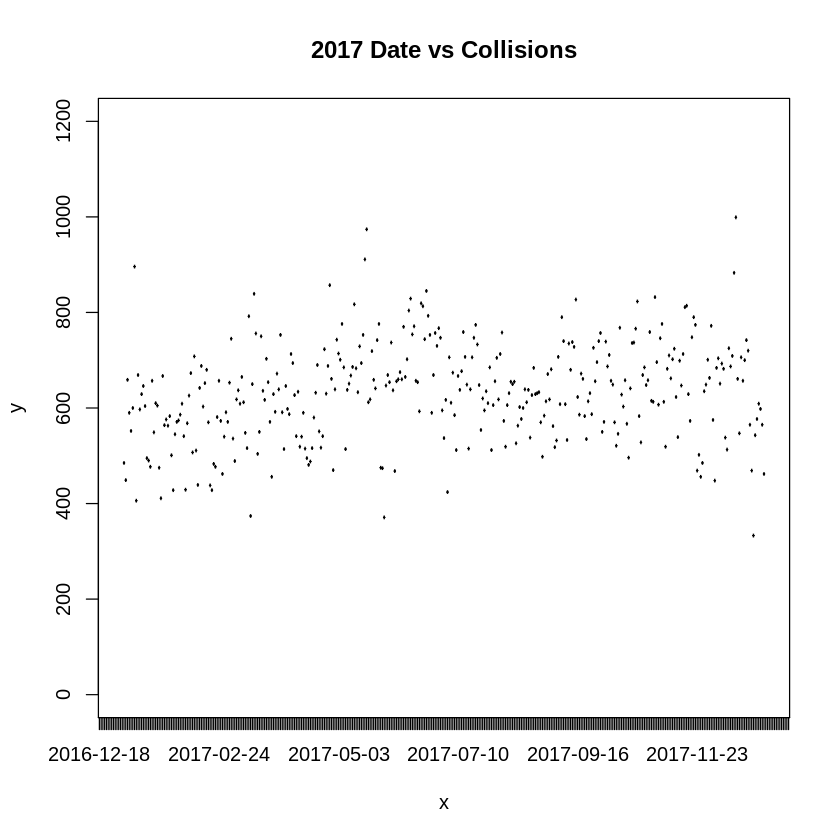

In [1655]:
plot(cd$collision_date[1462:1826], cd$num_collisions[1462:1826], main="2017 Date vs Collisions", xlim=c(1462,1826), ylim=c(0,1200))

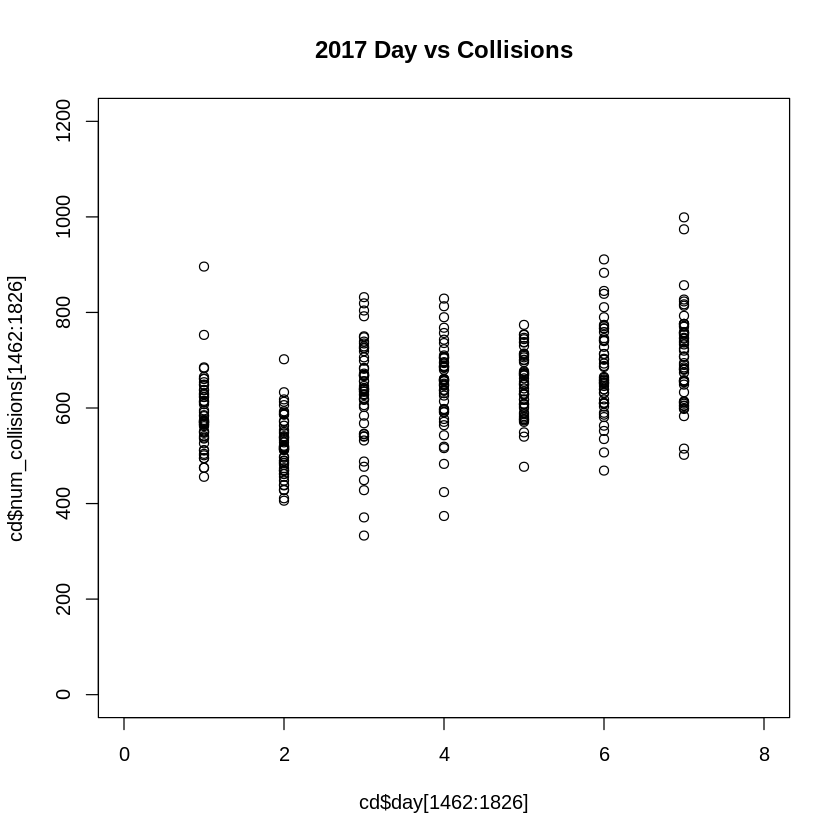

In [1656]:
plot(cd$day[1462:1826], cd$num_collisions[1462:1826], main="2017 Day vs Collisions", xlim=c(0, 8), ylim=c(0,1200))

In [1657]:
cor(cd$day[1426:1826], cd$num_collisions[1426:1826])

[1] 0.4991274

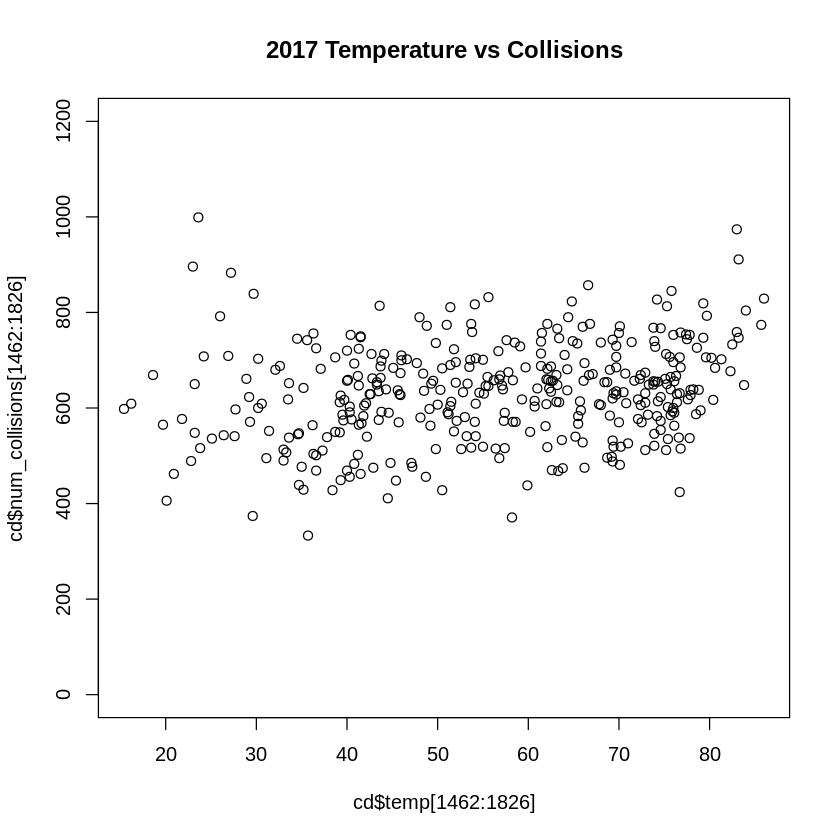

In [1658]:
plot(cd$temp[1462:1826], cd$num_collisions[1462:1826], main="2017 Temperature vs Collisions", ylim=c(0,1200))

In [1659]:
cor(cd$temp[1462:1826], cd$num_collisions[1462:1826])

[1] 0.2227263

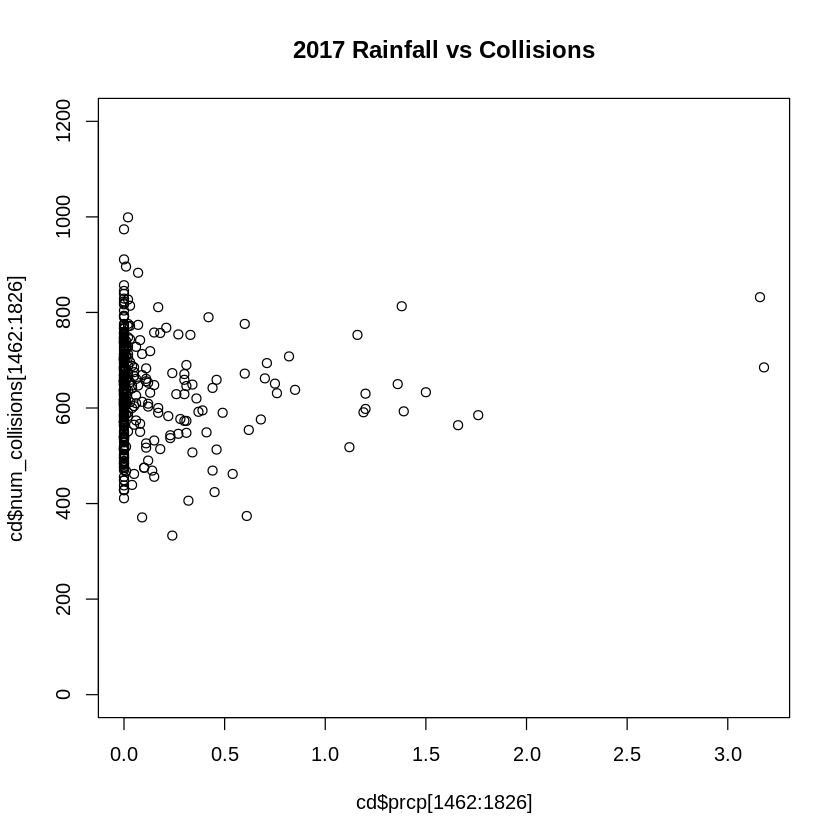

In [1660]:
plot(cd$prcp[1462:1826], cd$num_collisions[1462:1826], main="2017 Rainfall vs Collisions", ylim=c(0,1200))

In [1661]:
cor(cd$prcp[1462:1826], cd$num_collisions[1462:1826])

[1] 0.01419899

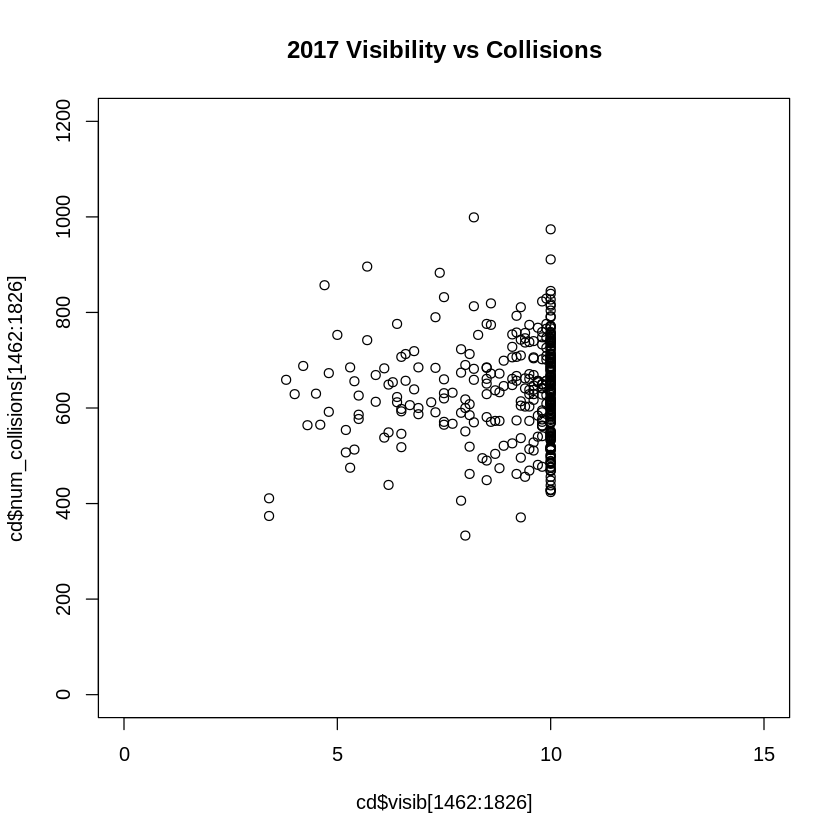

In [1662]:
plot(cd$visib[1462:1826], cd$num_collisions[1462:1826], main="2017 Visibility vs Collisions", xlim=c(0,15), ylim=c(0,1200))

In [1663]:
cor(cd$visib[1462:1826], cd$num_collisions[1462:1826])

[1] 0.04756169

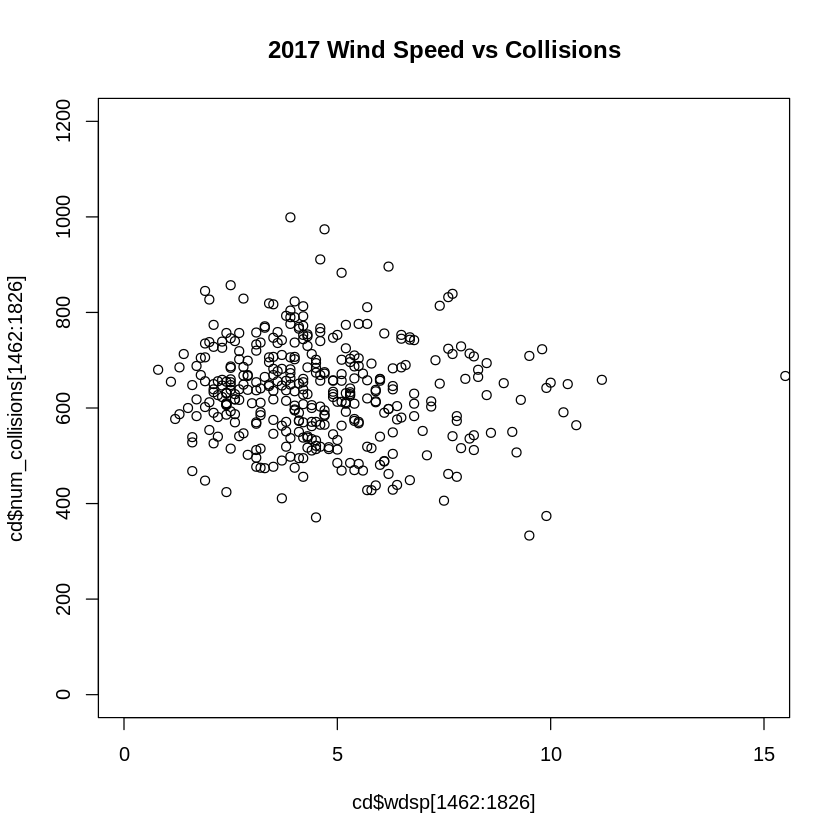

In [1664]:
plot(cd$wdsp[1462:1826], cd$num_collisions[1462:1826], main="2017 Wind Speed vs Collisions", xlim=c(0,15), ylim=c(0,1200))

In [1665]:
cor(cd$wdsp[1462:1826], cd$num_collisions[1462:1826])

[1] -0.1061178

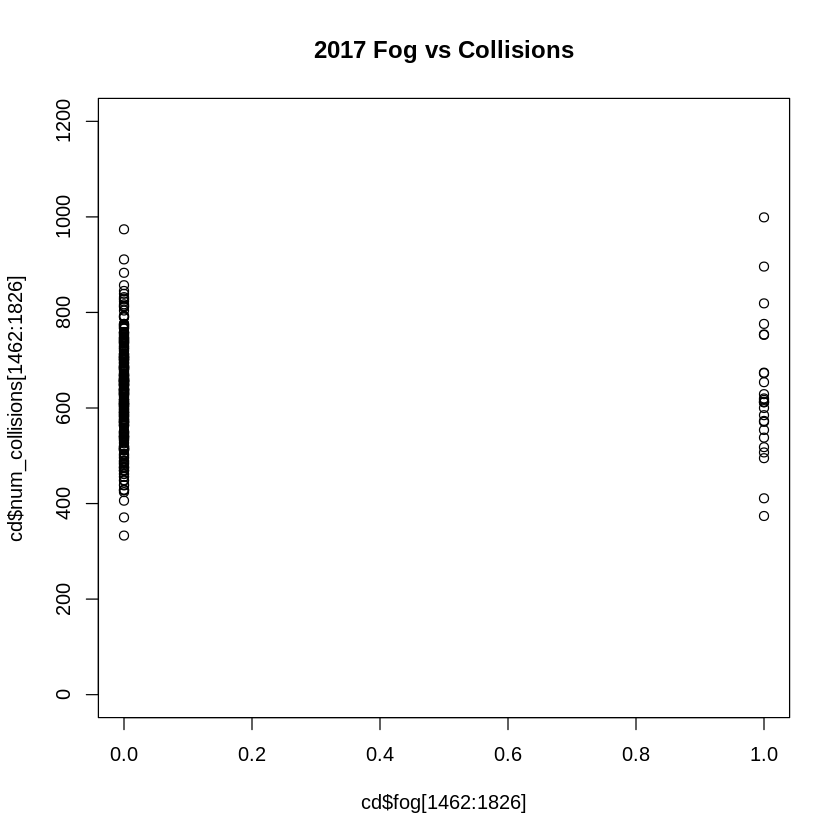

In [1666]:
plot(cd$fog[1462:1826], cd$num_collisions[1462:1826], main="2017 Fog vs Collisions", ylim=c(0,1200))

In [1667]:
cor(cd$fog[1462:1826], cd$num_collisions[1462:1826])

[1] -0.00294882

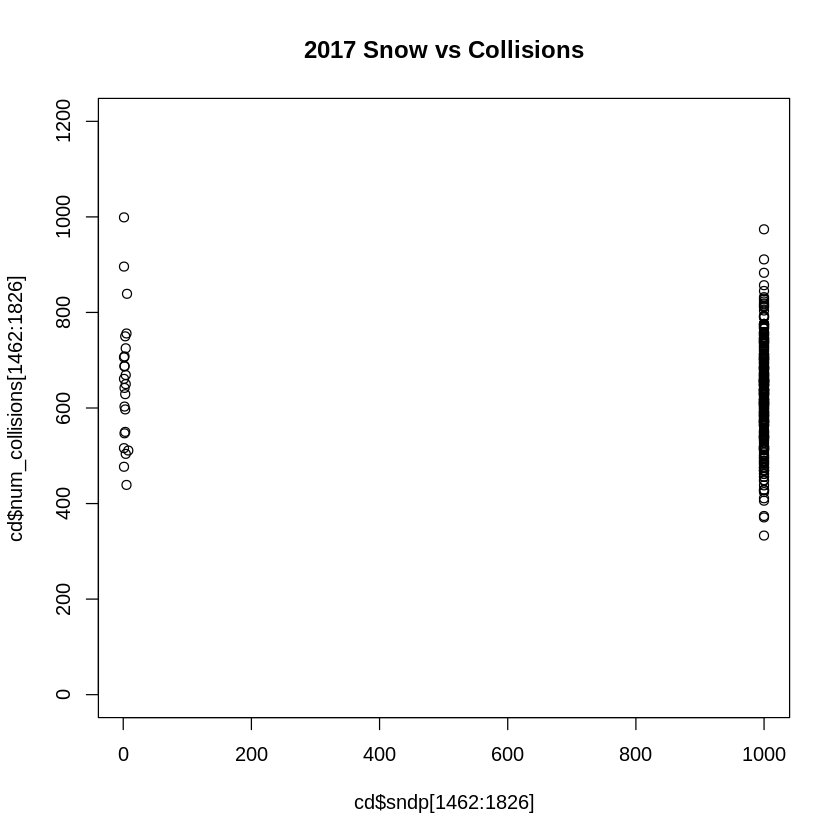

In [1668]:
plot(cd$sndp[1462:1826], cd$num_collisions[1462:1826], main="2017 Snow vs Collisions", ylim=c(0,1200))

In [1669]:
cor(cd$sndp[1462:1826], cd$num_collisions[1462:1826])

[1] -0.06062614

In [1670]:
summary(cd$num_collisions[1462:1826])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  333.0   570.0   636.0   632.9   700.0   999.0 

In [1671]:
cd$collision_date[1827:2191]

[1] 2018-01-01 2018-01-02 2018-01-03 2018-01-04 2018-01-05 2018-01-06
  [7] 2018-01-07 2018-01-08 2018-01-09 2018-01-10 2018-01-11 2018-01-12
 [13] 2018-01-13 2018-01-14 2018-01-15 2018-01-16 2018-01-17 2018-01-18
 [19] 2018-01-19 2018-01-20 2018-01-21 2018-01-22 2018-01-23 2018-01-24
 [25] 2018-01-25 2018-01-26 2018-01-27 2018-01-28 2018-01-29 2018-01-30
 [31] 2018-01-31 2018-02-01 2018-02-02 2018-02-03 2018-02-04 2018-02-05
 [37] 2018-02-06 2018-02-07 2018-02-08 2018-02-09 2018-02-10 2018-02-11
 [43] 2018-02-12 2018-02-13 2018-02-14 2018-02-15 2018-02-16 2018-02-17
 [49] 2018-02-18 2018-02-19 2018-02-20 2018-02-21 2018-02-22 2018-02-23
 [55] 2018-02-24 2018-02-25 2018-02-26 2018-02-27 2018-02-28 2018-03-01
 [61] 2018-03-02 2018-03-03 2018-03-04 2018-03-05 2018-03-06 2018-03-07
 [67] 2018-03-08 2018-03-09 2018-03-10 2018-03-11 2018-03-12 2018-03-13
 [73] 2018-03-14 2018-03-15 2018-03-16 2018-03-17 2018-03-18 2018-03-19
 [79] 2018-03-20 2018-03-21 2018-03-22 2018-03-23 2018-03-24 2018-03-25
 [85] 2018-03-26 2018-03-27 2018-03-28 2018-03-29 2018-03-30 2018-03-31
 [91] 2018-04-01 2018-04-02 2018-04-03 2018-04-04 2018-04-05 2018-04-06
 [97] 2018-04-07 2018-04-08 2018-04-09 2018-04-10 2018-04-11 2018-04-12
[103] 2018-04-13 2018-04-14 2018-04-15 2018-04-16 2018-04-17 2018-04-18
[109] 2018-04-19 2018-04-20 2018-04-21 2018-04-22 2018-04-23 2018-04-24
[115] 2018-04-25 2018-04-26 2018-04-27 2018-04-28 2018-04-29 2018-04-30
[121] 2018-05-01 2018-05-02 2018-05-03 2018-05-04 2018-05-05 2018-05-06
[127] 2018-05-07 2018-05-08 2018-05-09 2018-05-10 2018-05-11 2018-05-12
[133] 2018-05-13 2018-05-14 2018-05-15 2018-05-16 2018-05-17 2018-05-18
[139] 2018-05-19 2018-05-20 2018-05-21 2018-05-22 2018-05-23 2018-05-24
[145] 2018-05-25 2018-05-26 2018-05-27 2018-05-28 2018-05-29 2018-05-30
[151] 2018-05-31 2018-06-01 2018-06-02 2018-06-03 2018-06-04 2018-06-05
[157] 2018-06-06 2018-06-07 2018-06-08 2018-06-09 2018-06-10 2018-06-11
[163] 2018-06-12 2018-06-13 2018-06-14 2018-06-15 2018-06-16 2018-06-17
[169] 2018-06-18 2018-06-19 2018-06-20 2018-06-21 2018-06-22 2018-06-23
[175] 2018-06-24 2018-06-25 2018-06-26 2018-06-27 2018-06-28 2018-06-29
[181] 2018-06-30 2018-07-01 2018-07-02 2018-07-03 2018-07-04 2018-07-05
[187] 2018-07-06 2018-07-07 2018-07-08 2018-07-09 2018-07-10 2018-07-11
[193] 2018-07-12 2018-07-13 2018-07-14 2018-07-15 2018-07-16 2018-07-17
[199] 2018-07-18 2018-07-19 2018-07-20 2018-07-21 2018-07-22 2018-07-23
[205] 2018-07-24 2018-07-25 2018-07-26 2018-07-27 2018-07-28 2018-07-29
[211] 2018-07-30 2018-07-31 2018-08-01 2018-08-02 2018-08-03 2018-08-04
[217] 2018-08-05 2018-08-06 2018-08-07 2018-08-08 2018-08-09 2018-08-10
[223] 2018-08-11 2018-08-12 2018-08-13 2018-08-14 2018-08-15 2018-08-16
[229] 2018-08-17 2018-08-18 2018-08-19 2018-08-20 2018-08-21 2018-08-22
[235] 2018-08-23 2018-08-24 2018-08-25 2018-08-26 2018-08-27 2018-08-28
[241] 2018-08-29 2018-08-30 2018-08-31 2018-09-01 2018-09-02 2018-09-03
[247] 2018-09-04 2018-09-05 2018-09-06 2018-09-07 2018-09-08 2018-09-09
[253] 2018-09-10 2018-09-11 2018-09-12 2018-09-13 2018-09-14 2018-09-15
[259] 2018-09-16 2018-09-17 2018-09-18 2018-09-19 2018-09-20 2018-09-21
[265] 2018-09-22 2018-09-23 2018-09-24 2018-09-25 2018-09-26 2018-09-27
[271] 2018-09-28 2018-09-29 2018-09-30 2018-10-01 2018-10-02 2018-10-03
[277] 2018-10-04 2018-10-05 2018-10-06 2018-10-07 2018-10-08 2018-10-09
[283] 2018-10-10 2018-10-11 2018-10-12 2018-10-13 2018-10-14 2018-10-15
[289] 2018-10-16 2018-10-17 2018-10-18 2018-10-19 2018-10-20 2018-10-21
[295] 2018-10-22 2018-10-23 2018-10-24 2018-10-25 2018-10-26 2018-10-27
[301] 2018-10-28 2018-10-29 2018-10-30 2018-10-31 2018-11-01 2018-11-02
[307] 2018-11-03 2018-11-04 2018-11-05 2018-11-06 2018-11-07 2018-11-08
[313] 2018-11-09 2018-11-10 2018-11-11 2018-11-12 2018-11-13 2018-11-14
[319] 2018-11-15 2018-11-16 2018-11-17 2018-11-18 2018-11-19 2018-11-20
[325] 2018-11-21 2018-11-22 2018-11-23 2018-11-24 2018-11-25 2018-11-26
[331] 2018-11-27 2018-11-28 2018-11-29 201

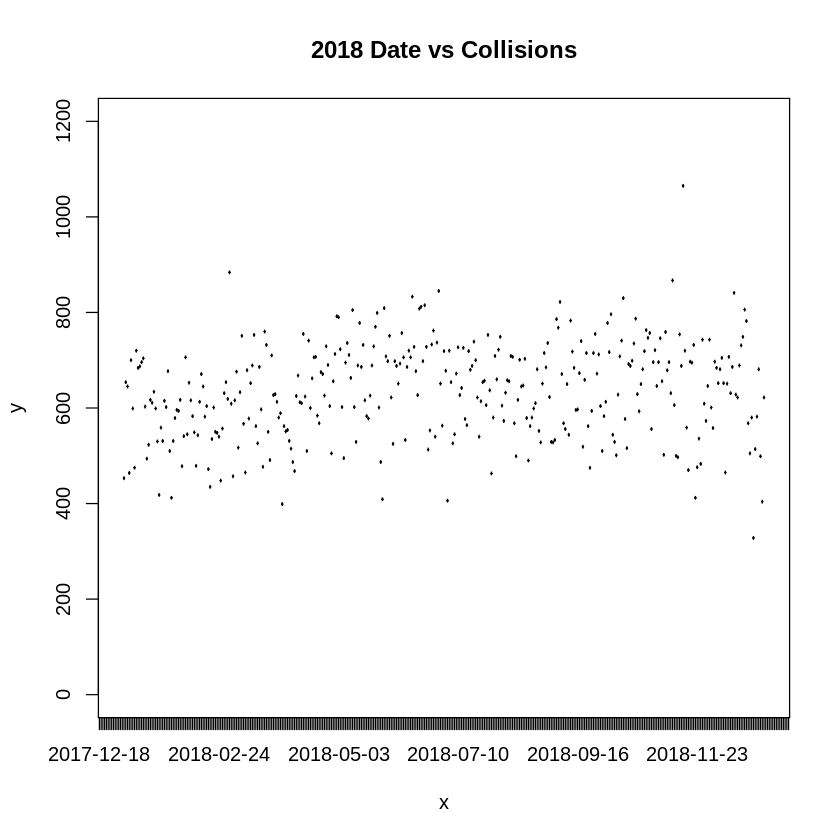

In [1672]:
plot(cd$collision_date[1827:2191], cd$num_collisions[1827:2191], main="2018 Date vs Collisions", xlim=c(1827,2191), ylim=c(0,1200))

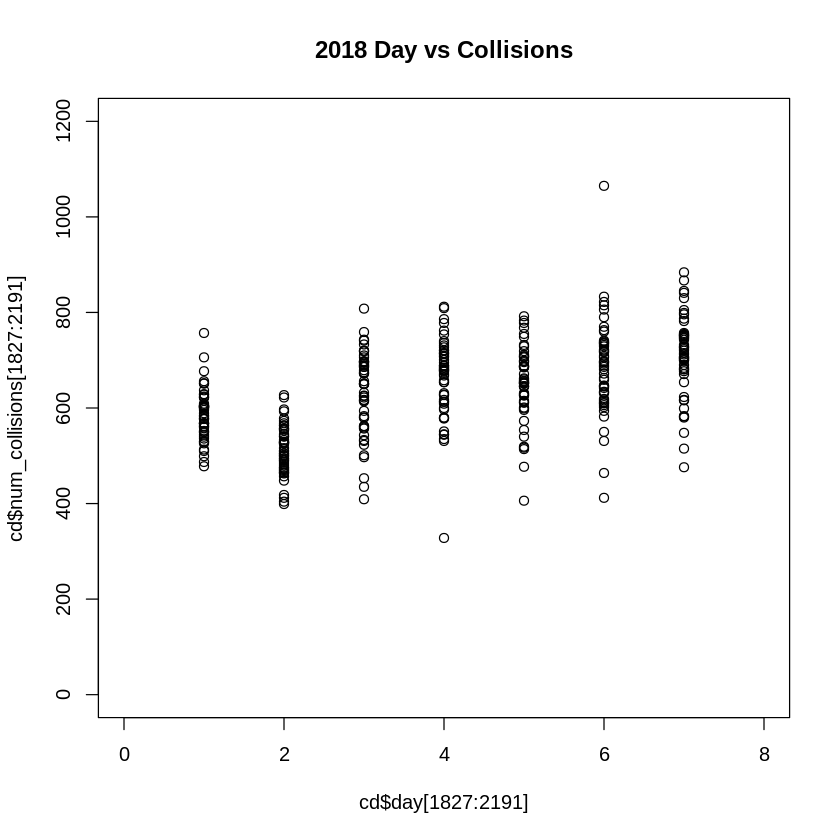

In [1673]:
plot(cd$day[1827:2191], cd$num_collisions[1827:2191], main="2018 Day vs Collisions", xlim=c(0, 8), ylim=c(0,1200))

In [1674]:
cor(cd$day[1827:2191], cd$num_collisions[1827:2191])

[1] 0.526341

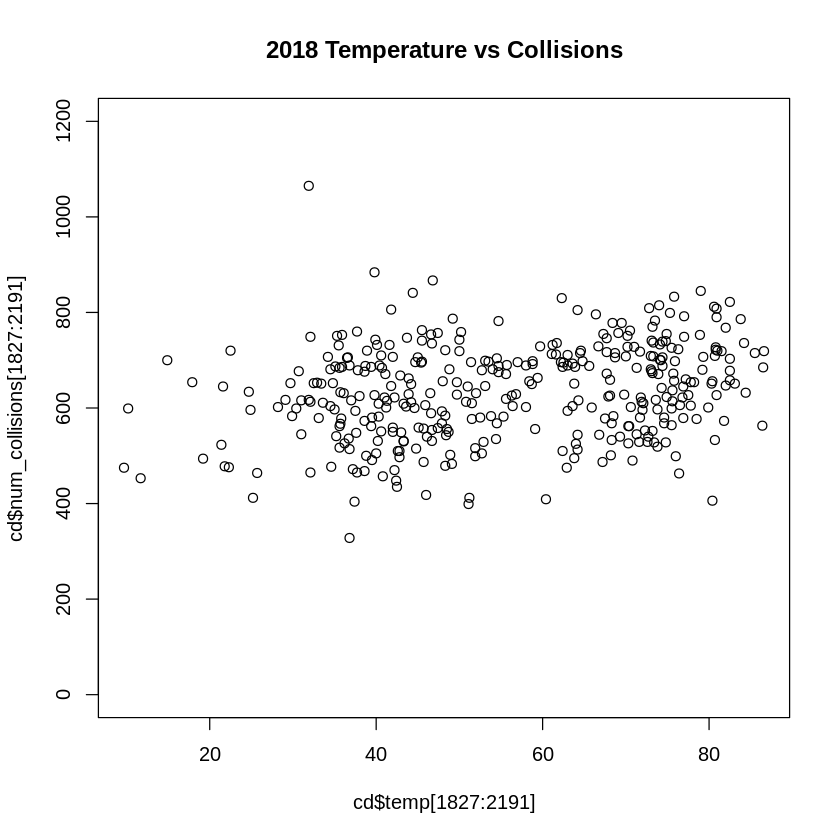

In [1675]:
plot(cd$temp[1827:2191], cd$num_collisions[1827:2191], main="2018 Temperature vs Collisions", ylim=c(0,1200))

In [1676]:
cor(cd$temp[1827:2191], cd$num_collisions[1827:2191])

[1] 0.2524512

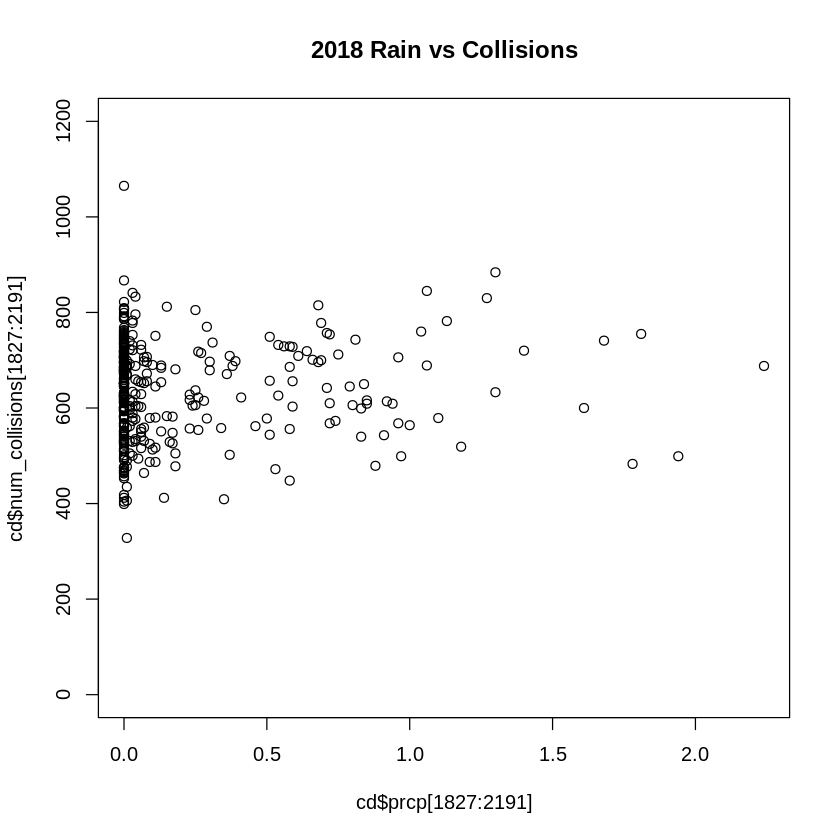

In [1677]:
plot(cd$prcp[1827:2191], cd$num_collisions[1827:2191], main="2018 Rain vs Collisions", ylim=c(0,1200))

In [1678]:
cor(cd$prcp[1827:2191], cd$num_collisions[1827:2191])

[1] 0.06578124

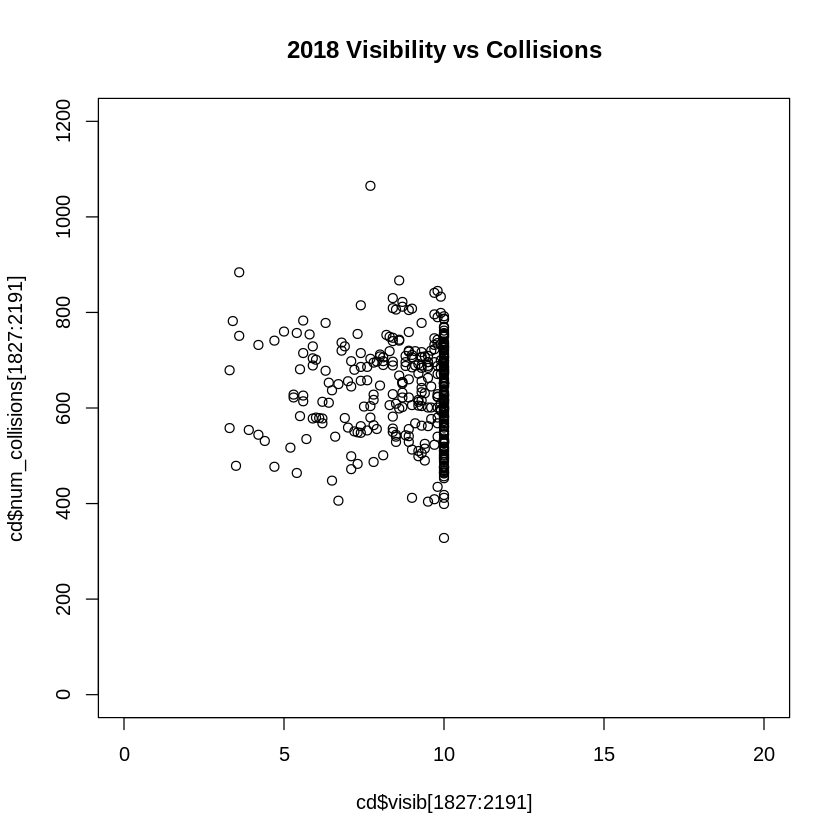

In [1679]:
plot(cd$visib[1827:2191], cd$num_collisions[1827:2191], main="2018 Visibility vs Collisions", xlim=c(0,20), ylim=c(0,1200))

In [1680]:
cor(cd$visib[1827:2191], cd$num_collisions[1827:2191])

[1] 0.07773614

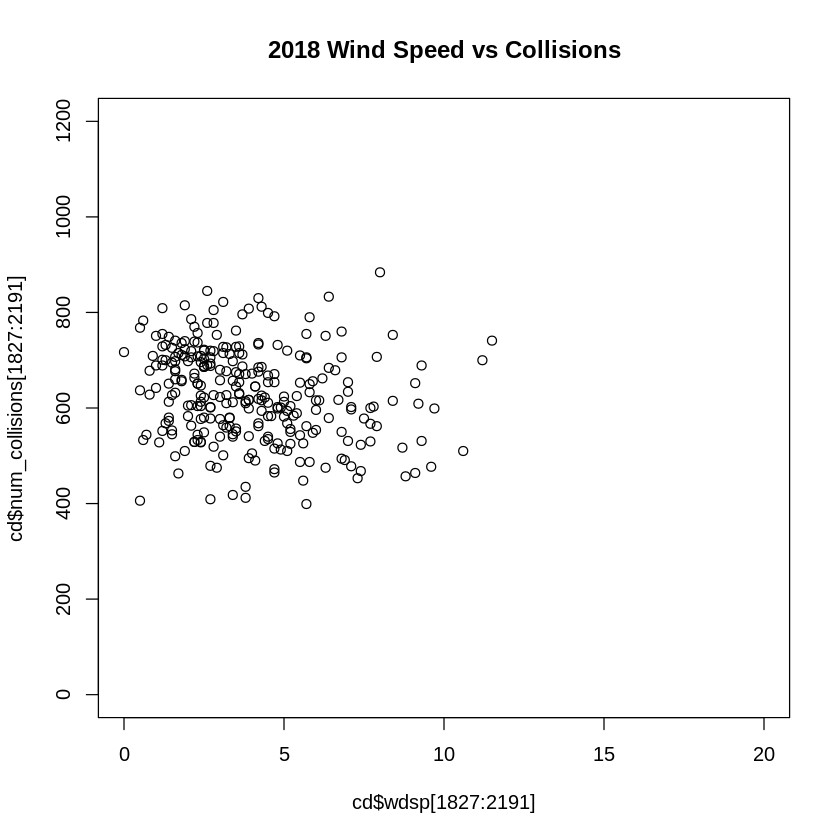

In [1681]:
plot(cd$wdsp[1827:2191], cd$num_collisions[1827:2191], main="2018 Wind Speed vs Collisions", xlim=c(0,20), ylim=c(0,1200))

In [1682]:
cor(cd$wdsp[1827:2191], cd$num_collisions[1827:2191])

[1] 0.07675615

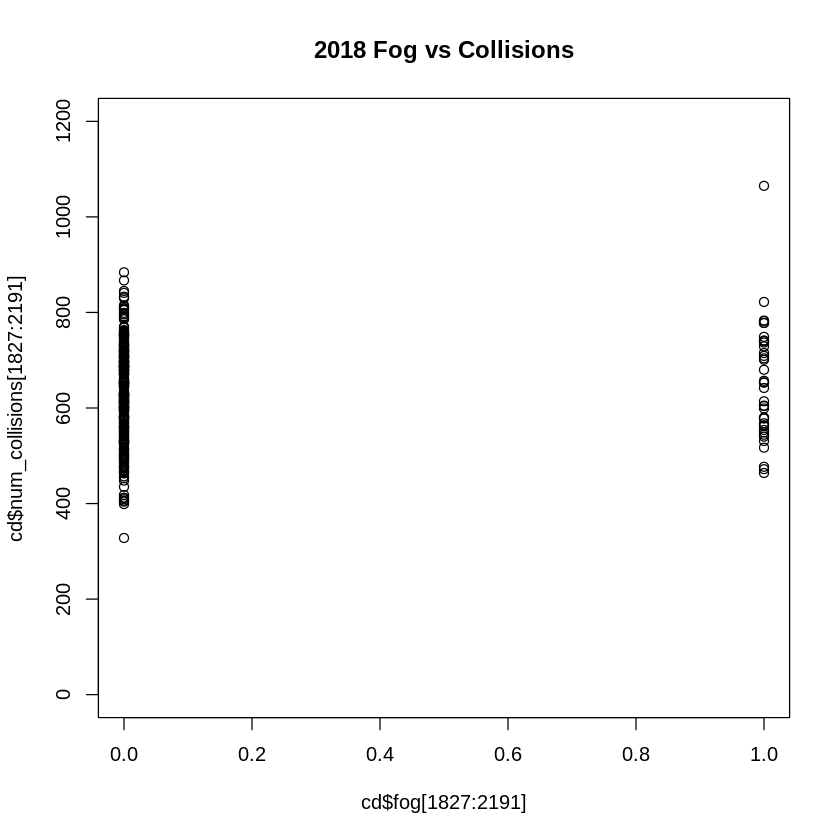

In [1683]:
plot(cd$fog[1827:2191], cd$num_collisions[1827:2191], main="2018 Fog vs Collisions", ylim=c(0,1200))

In [1684]:
cor(cd$fog[1827:2191], cd$num_collisions[1827:2191])

[1] 0.06015822

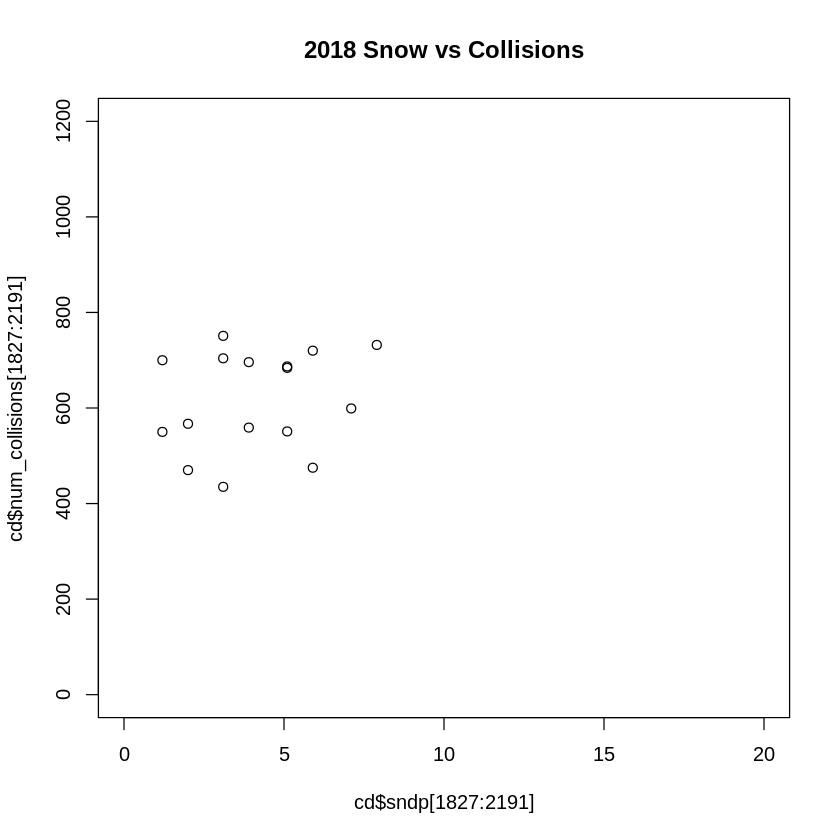

In [1685]:
plot(cd$sndp[1827:2191], cd$num_collisions[1827:2191], main="2018 Snow vs Collisions",xlim=c(0,20),  ylim=c(0,1200))

In [1686]:
cor(cd$sndp[1827:2191], cd$num_collisions[1827:2191])

[1] 0.03642227

In [1687]:
summary(cd$num_collisions[1827:2191])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  328.0   562.0   634.0   634.4   706.0  1065.0 

In [1688]:
cd$collision_date[2192:2556]

[1] 2019-01-01 2019-01-02 2019-01-03 2019-01-04 2019-01-05 2019-01-06
  [7] 2019-01-07 2019-01-08 2019-01-09 2019-01-10 2019-01-11 2019-01-12
 [13] 2019-01-13 2019-01-14 2019-01-15 2019-01-16 2019-01-17 2019-01-18
 [19] 2019-01-19 2019-01-20 2019-01-21 2019-01-22 2019-01-23 2019-01-24
 [25] 2019-01-25 2019-01-26 2019-01-27 2019-01-28 2019-01-29 2019-01-30
 [31] 2019-01-31 2019-02-01 2019-02-02 2019-02-03 2019-02-04 2019-02-05
 [37] 2019-02-06 2019-02-07 2019-02-08 2019-02-09 2019-02-10 2019-02-11
 [43] 2019-02-12 2019-02-13 2019-02-14 2019-02-15 2019-02-16 2019-02-17
 [49] 2019-02-18 2019-02-19 2019-02-20 2019-02-21 2019-02-22 2019-02-23
 [55] 2019-02-24 2019-02-25 2019-02-26 2019-02-27 2019-02-28 2019-03-01
 [61] 2019-03-02 2019-03-03 2019-03-04 2019-03-05 2019-03-06 2019-03-07
 [67] 2019-03-08 2019-03-09 2019-03-10 2019-03-11 2019-03-12 2019-03-13
 [73] 2019-03-14 2019-03-15 2019-03-16 2019-03-17 2019-03-18 2019-03-19
 [79] 2019-03-20 2019-03-21 2019-03-22 2019-03-23 2019-03-24 2019-03-25
 [85] 2019-03-26 2019-03-27 2019-03-28 2019-03-29 2019-03-30 2019-03-31
 [91] 2019-04-01 2019-04-02 2019-04-03 2019-04-04 2019-04-05 2019-04-06
 [97] 2019-04-07 2019-04-08 2019-04-09 2019-04-10 2019-04-11 2019-04-12
[103] 2019-04-13 2019-04-14 2019-04-15 2019-04-16 2019-04-17 2019-04-18
[109] 2019-04-19 2019-04-20 2019-04-21 2019-04-22 2019-04-23 2019-04-24
[115] 2019-04-25 2019-04-26 2019-04-27 2019-04-28 2019-04-29 2019-04-30
[121] 2019-05-01 2019-05-02 2019-05-03 2019-05-04 2019-05-05 2019-05-06
[127] 2019-05-07 2019-05-08 2019-05-09 2019-05-10 2019-05-11 2019-05-12
[133] 2019-05-13 2019-05-14 2019-05-15 2019-05-16 2019-05-17 2019-05-18
[139] 2019-05-19 2019-05-20 2019-05-21 2019-05-22 2019-05-23 2019-05-24
[145] 2019-05-25 2019-05-26 2019-05-27 2019-05-28 2019-05-29 2019-05-30
[151] 2019-05-31 2019-06-01 2019-06-02 2019-06-03 2019-06-04 2019-06-05
[157] 2019-06-06 2019-06-07 2019-06-08 2019-06-09 2019-06-10 2019-06-11
[163] 2019-06-12 2019-06-13 2019-06-14 2019-06-15 2019-06-16 2019-06-17
[169] 2019-06-18 2019-06-19 2019-06-20 2019-06-21 2019-06-22 2019-06-23
[175] 2019-06-24 2019-06-25 2019-06-26 2019-06-27 2019-06-28 2019-06-29
[181] 2019-06-30 2019-07-01 2019-07-02 2019-07-03 2019-07-04 2019-07-05
[187] 2019-07-06 2019-07-07 2019-07-08 2019-07-09 2019-07-10 2019-07-11
[193] 2019-07-12 2019-07-13 2019-07-14 2019-07-15 2019-07-16 2019-07-17
[199] 2019-07-18 2019-07-19 2019-07-20 2019-07-21 2019-07-22 2019-07-23
[205] 2019-07-24 2019-07-25 2019-07-26 2019-07-27 2019-07-28 2019-07-29
[211] 2019-07-30 2019-07-31 2019-08-01 2019-08-02 2019-08-03 2019-08-04
[217] 2019-08-05 2019-08-06 2019-08-07 2019-08-08 2019-08-09 2019-08-10
[223] 2019-08-11 2019-08-12 2019-08-13 2019-08-14 2019-08-15 2019-08-16
[229] 2019-08-17 2019-08-18 2019-08-19 2019-08-20 2019-08-21 2019-08-22
[235] 2019-08-23 2019-08-24 2019-08-25 2019-08-26 2019-08-27 2019-08-28
[241] 2019-08-29 2019-08-30 2019-08-31 2019-09-01 2019-09-02 2019-09-03
[247] 2019-09-04 2019-09-05 2019-09-06 2019-09-07 2019-09-08 2019-09-09
[253] 2019-09-10 2019-09-11 2019-09-12 2019-09-13 2019-09-14 2019-09-15
[259] 2019-09-16 2019-09-17 2019-09-18 2019-09-19 2019-09-20 2019-09-21
[265] 2019-09-22 2019-09-23 2019-09-24 2019-09-25 2019-09-26 2019-09-27
[271] 2019-09-28 2019-09-29 2019-09-30 2019-10-01 2019-10-02 2019-10-03
[277] 2019-10-04 2019-10-05 2019-10-06 2019-10-07 2019-10-08 2019-10-09
[283] 2019-10-10 2019-10-11 2019-10-12 2019-10-13 2019-10-14 2019-10-15
[289] 2019-10-16 2019-10-17 2019-10-18 2019-10-19 2019-10-20 2019-10-21
[295] 2019-10-22 2019-10-23 2019-10-24 2019-10-25 2019-10-26 2019-10-27
[301] 2019-10-28 2019-10-29 2019-10-30 2019-10-31 2019-11-01 2019-11-02
[307] 2019-11-03 2019-11-04 2019-11-05 2019-11-06 2019-11-07 2019-11-08
[313] 2019-11-09 2019-11-10 2019-11-11 2019-11-12 2019-11-13 2019-11-14
[319] 2019-11-15 2019-11-16 2019-11-17 2019-11-18 2019-11-19 2019-11-20
[325] 2019-11-21 2019-11-22 2019-11-23 2019-11-24 2019-11-25 2019-11-26
[331] 2019-11-27 2019-11-28 2019-11-29 201

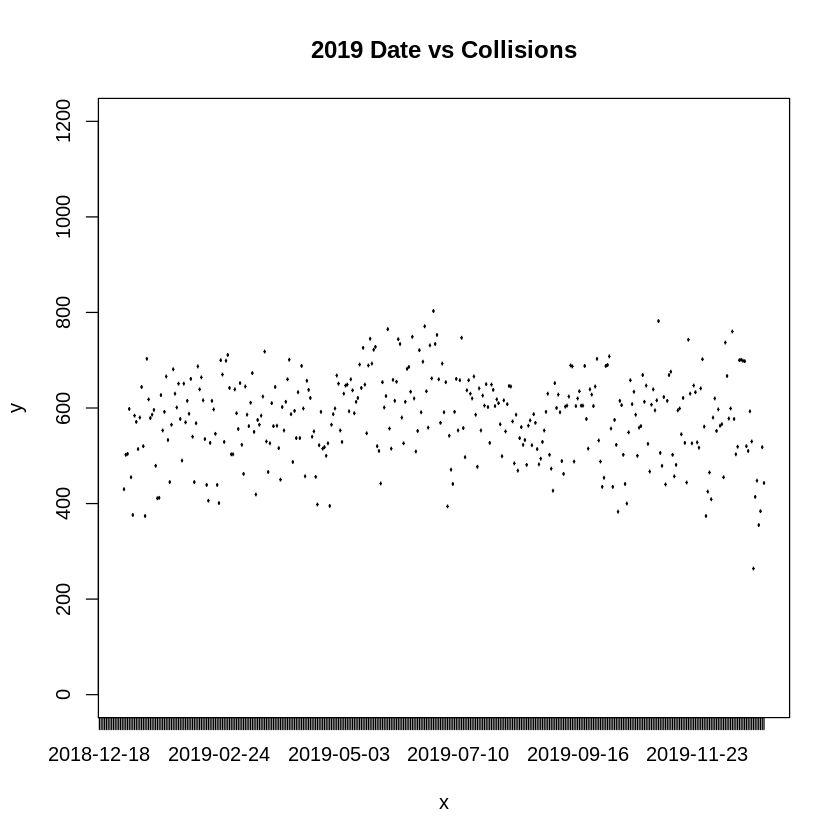

In [1689]:
plot(cd$collision_date[2192:2556], cd$num_collisions[2192:2556], main="2019 Date vs Collisions", xlim=c(2192,2556), ylim=c(0,1200))

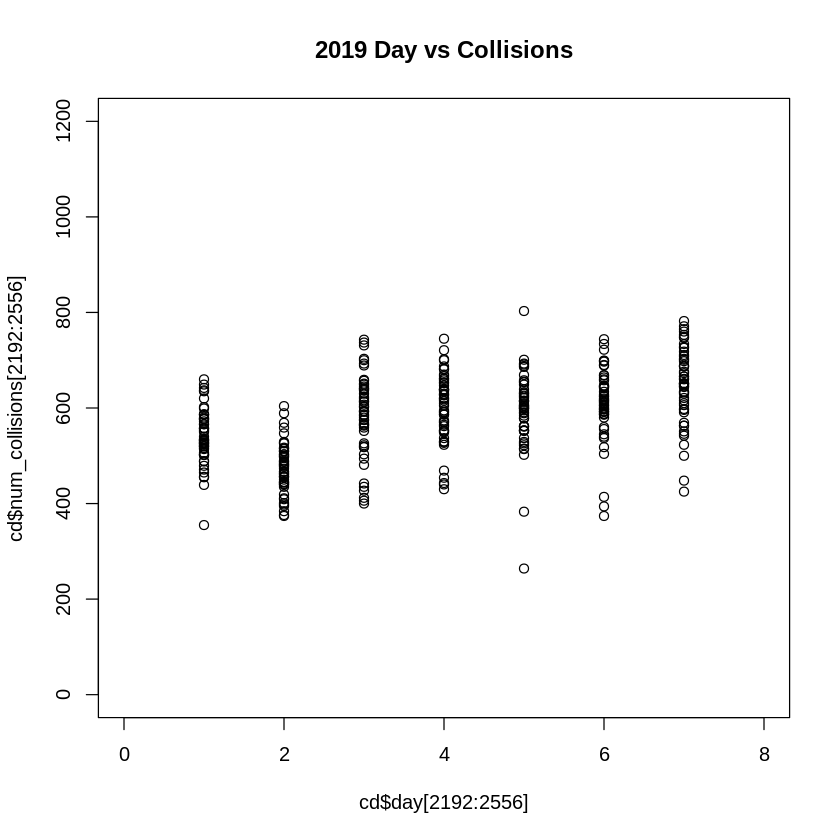

In [1690]:
plot(cd$day[2192:2556], cd$num_collisions[2192:2556], main="2019 Day vs Collisions", xlim=c(0, 8), ylim=c(0,1200))

In [1691]:
cor(cd$day[2192:2556], cd$num_collisions[2192:2556])

[1] 0.4823834

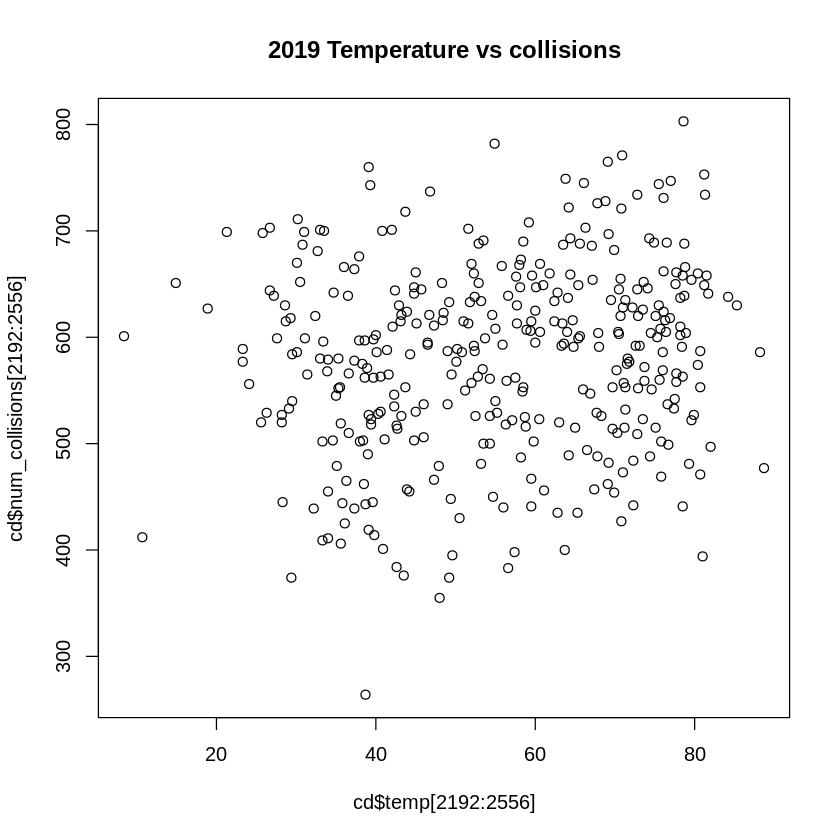

In [1692]:
plot(cd$temp[2192:2556], cd$num_collisions[2192:2556], main="2019 Temperature vs collisions")

In [1693]:
cor(cd$temp[2192:2556], cd$num_collisions[2192:2556])

[1] 0.145116

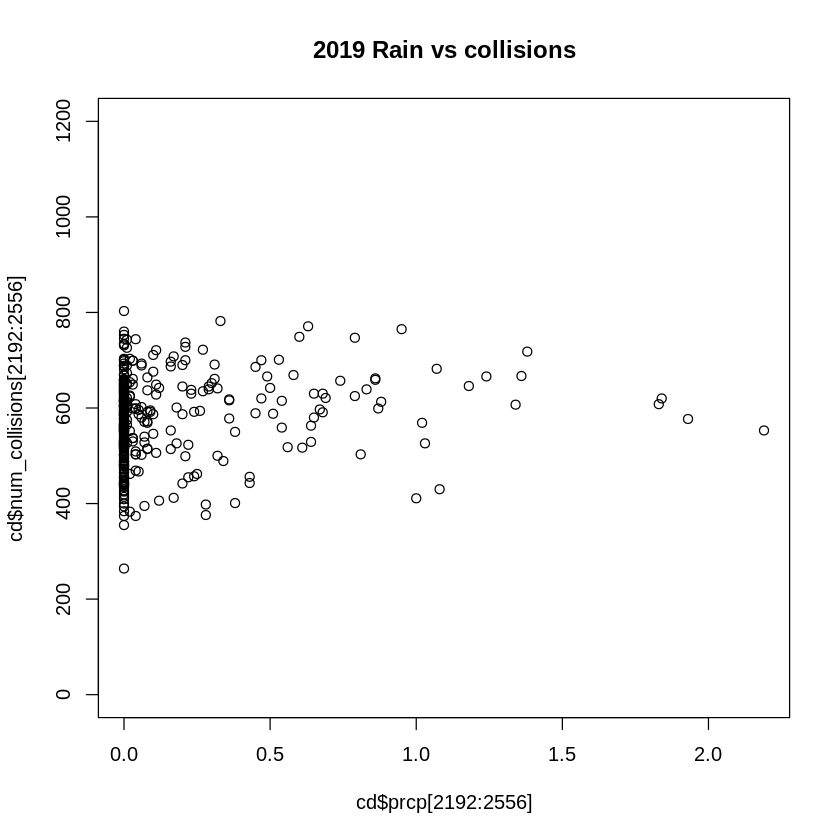

In [1694]:
plot(cd$prcp[2192:2556], cd$num_collisions[2192:2556], main="2019 Rain vs collisions", ylim=c(0,1200))

In [1695]:
cor(cd$prcp[2192:2556], cd$num_collisions[2192:2556])

[1] 0.1337836

Another small positive correlation with precipitation and collisions. Possibly 2019 and 2013 had more rainfall than the other years or particularly wet seasons contributng to more collisions

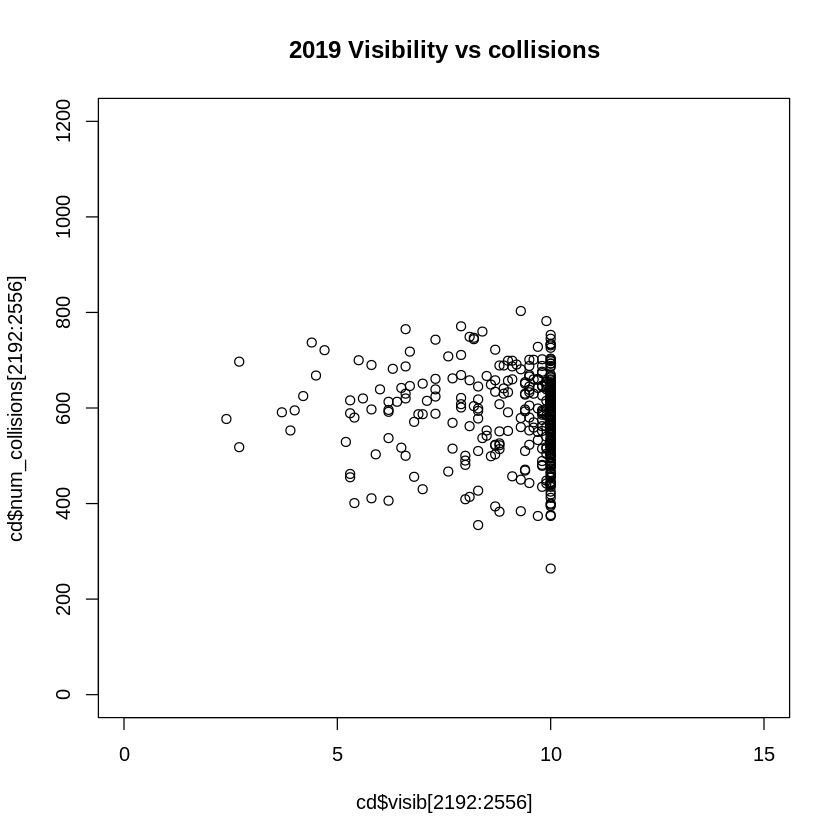

In [1696]:
plot(cd$visib[2192:2556], cd$num_collisions[2192:2556], main="2019 Visibility vs collisions", xlim=c(0,15), ylim=c(0,1200))

In [1697]:
cor(cd$visib[2192:2556], cd$num_collisions[2192:2556])

[1] -0.09545014

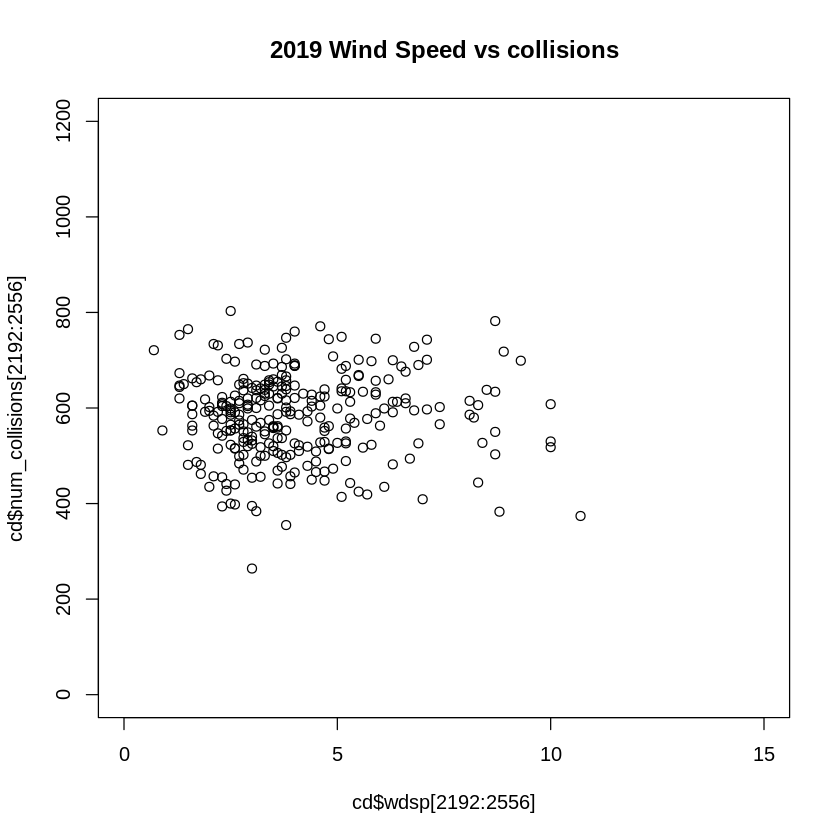

In [1698]:
plot(cd$wdsp[2192:2556], cd$num_collisions[2192:2556], main="2019 Wind Speed vs collisions", xlim=c(0,15), ylim=c(0,1200))

In [1699]:
cor(cd$wdsp[2192:2556], cd$num_collisions[2192:2556])

[1] -0.08927352

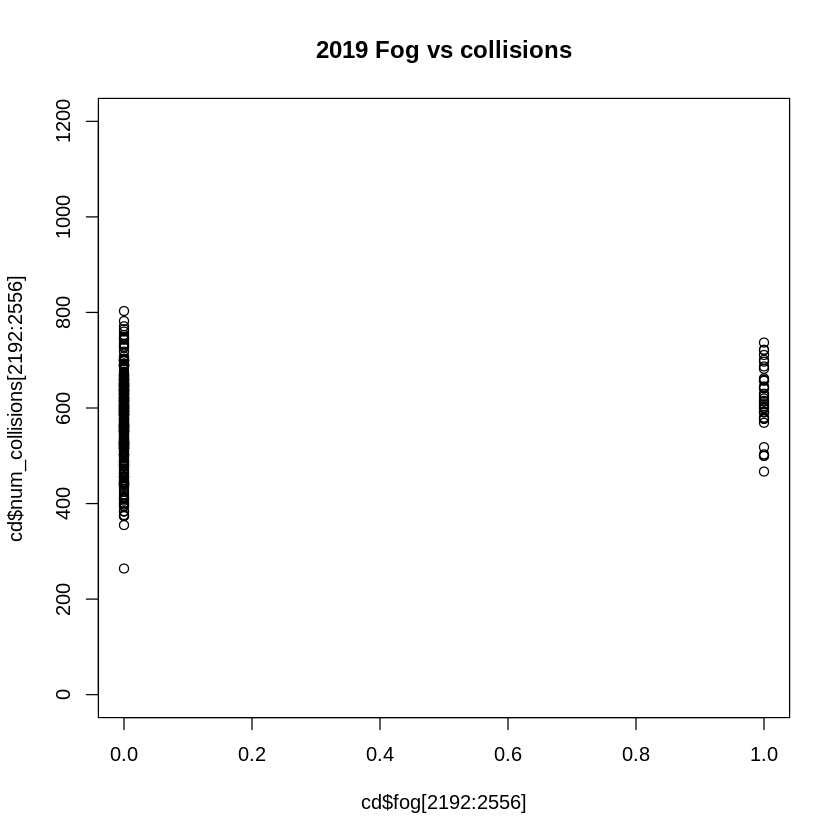

In [1700]:
plot(cd$fog[2192:2556], cd$num_collisions[2192:2556], main="2019 Fog vs collisions", ylim=c(0,1200))

In [1701]:
cor(cd$fog[2192:2556], cd$num_collisions[2192:2556])

[1] 0.1430445

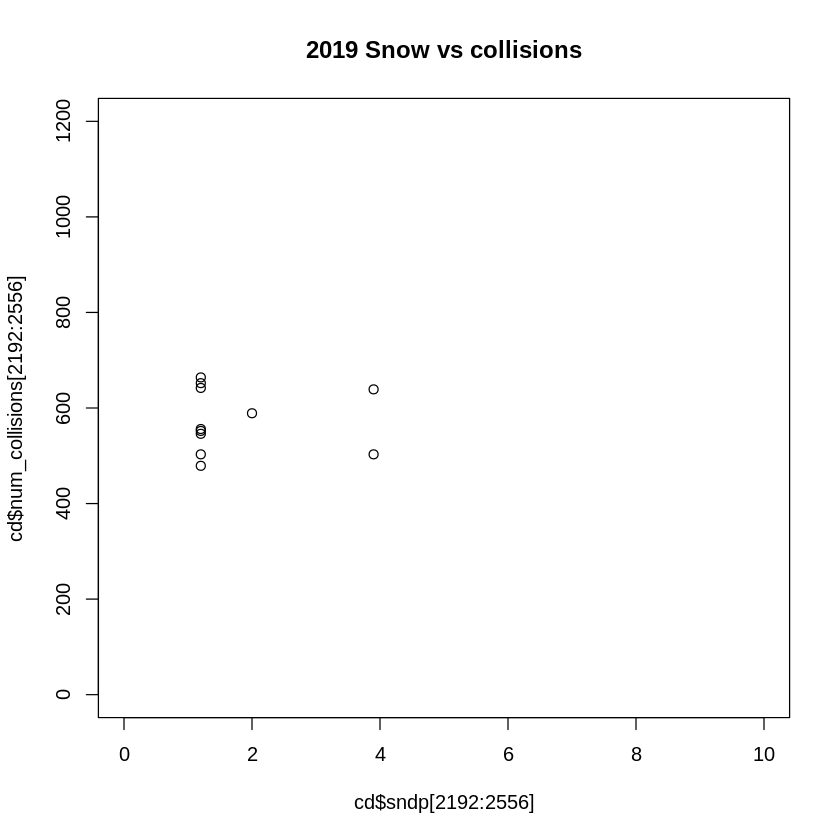

In [1702]:
plot(cd$sndp[2192:2556], cd$num_collisions[2192:2556], main="2019 Snow vs collisions",xlim=c(0,10), ylim=c(0,1200))

In [1703]:
cor(cd$sndp[2192:2556], cd$num_collisions[2192:2556])

[1] 0.008757254

In [1704]:
summary(cd$num_collisions[2192:2556])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  264.0   522.0   589.0   579.4   641.0   803.0 

Investigating each year individually produced no abnormal values that could influence the results. It was deemed safe to proceed with the data for all years still being included.

Every year has similar values when inspected individually with only a few values changing, such as a slightly higher positive correlation between precipitation and collisions in 2013 and 2019 compared to the other years. There are no abnormally different values to raise concerns about including that data within the full dataset and the 2019 values seem to be normal when compared to the other years. So far day, temperature and dew point have the best correlation with number of collisions and will be used for the linear regressor.

In [1705]:
cdmix <- cd

Next step would be to better visualise the data to understand possible seasonal patterns and if every year follows the same pattern.

In [1706]:
cdmix13 <- cdmix[which(cdmix$year == 2013), ]

In [1707]:
dayofyear <- 1*seq_len(nrow(cdmix13))
dayindex <- 1*seq_len(nrow(cdmix13))
cdmix13a <- cbind(dayindex , dayofyear, cdmix13)

In [1708]:
cdmix14 <- cdmix[which(cdmix$year == 2014), ]

In [1709]:
dayofyear <- 1*seq_len(nrow(cdmix14))
dayindex <- 1*seq_len(nrow(cdmix14)) + 365
cdmix14a <- cbind(dayindex , dayofyear, cdmix14)

In [1710]:
cdmix15 <- cdmix[which(cdmix$year == 2015), ]

In [1711]:
dayofyear <- 1*seq_len(nrow(cdmix15))
dayindex <- 1*seq_len(nrow(cdmix15)) + 730
cdmix15a <- cbind(dayindex , dayofyear, cdmix15)

In [1712]:
cdmix16 <- cdmix[which(cdmix$year == 2016), ]

In [1713]:
dayofyear <- 1*seq_len(nrow(cdmix16))
dayindex <- 1*seq_len(nrow(cdmix16)) + 1096
cdmix16a <- cbind(dayindex , dayofyear, cdmix16)

In [1714]:
cdmix17 <- cdmix[which(cdmix$year == 2017), ]

In [1715]:
dayofyear <- 1*seq_len(nrow(cdmix17))
dayindex <- 1*seq_len(nrow(cdmix17)) + 1461
cdmix17a <- cbind(dayindex , dayofyear, cdmix17)

In [1716]:
cdmix18 <- cdmix[which(cdmix$year == 2018), ]

In [1717]:
dayofyear <- 1*seq_len(nrow(cdmix18))
dayindex <- 1*seq_len(nrow(cdmix18)) + 1821
cdmix18a <- cbind(dayindex , dayofyear, cdmix18)

In [1718]:
cdmix19 <- cdmix[which(cdmix$year == 2019), ]

In [1719]:
dayofyear <- 1*seq_len(nrow(cdmix19))
dayindex <- 1*seq_len(nrow(cdmix19)) + 2191
cdmix19a <- cbind(dayindex , dayofyear, cdmix19)

In [1720]:
library (ggplot2)

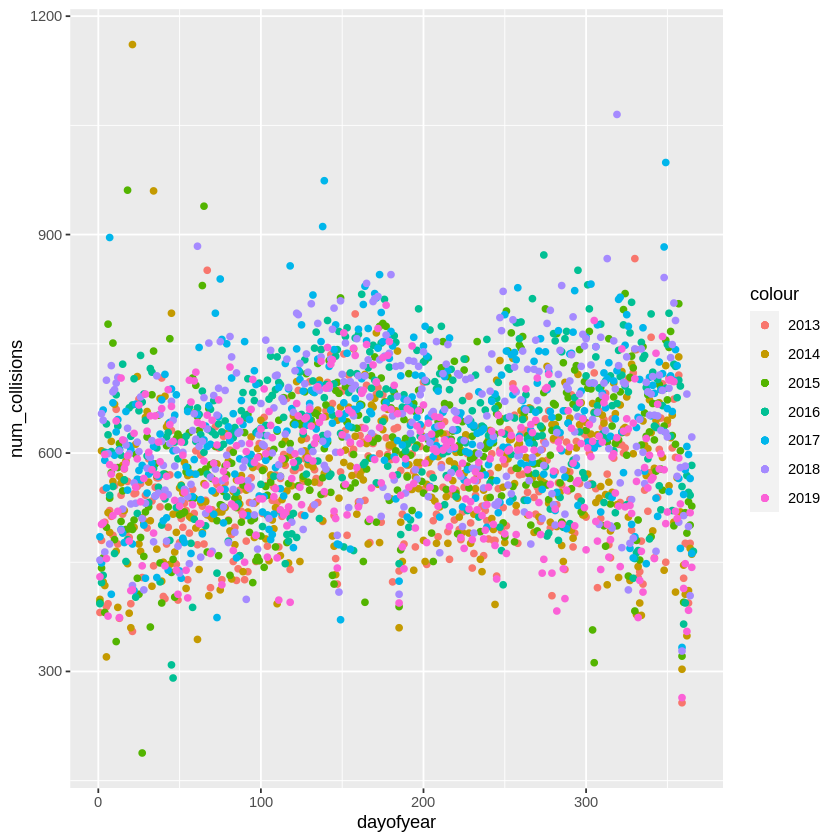

In [1721]:
ggplot() +
  geom_point(data=cdmix13a, aes(dayofyear, num_collisions, color="2013")) +
  geom_point(data=cdmix14a, aes(dayofyear, num_collisions, color="2014")) +
  geom_point(data=cdmix15a, aes(dayofyear, num_collisions, color="2015")) +
  geom_point(data=cdmix16a, aes(dayofyear, num_collisions, color="2016")) +
  geom_point(data=cdmix17a, aes(dayofyear, num_collisions, color="2017")) +
  geom_point(data=cdmix18a, aes(dayofyear, num_collisions, color="2018")) +
  geom_point(data=cdmix19a, aes(dayofyear, num_collisions, color="2019"))

There are a few outliers that can be removed as they are so different from the rest of the data. Its probably because of an event happening on that specific day that could cause more collisions e.g. a storm or marathon with roadblocks.

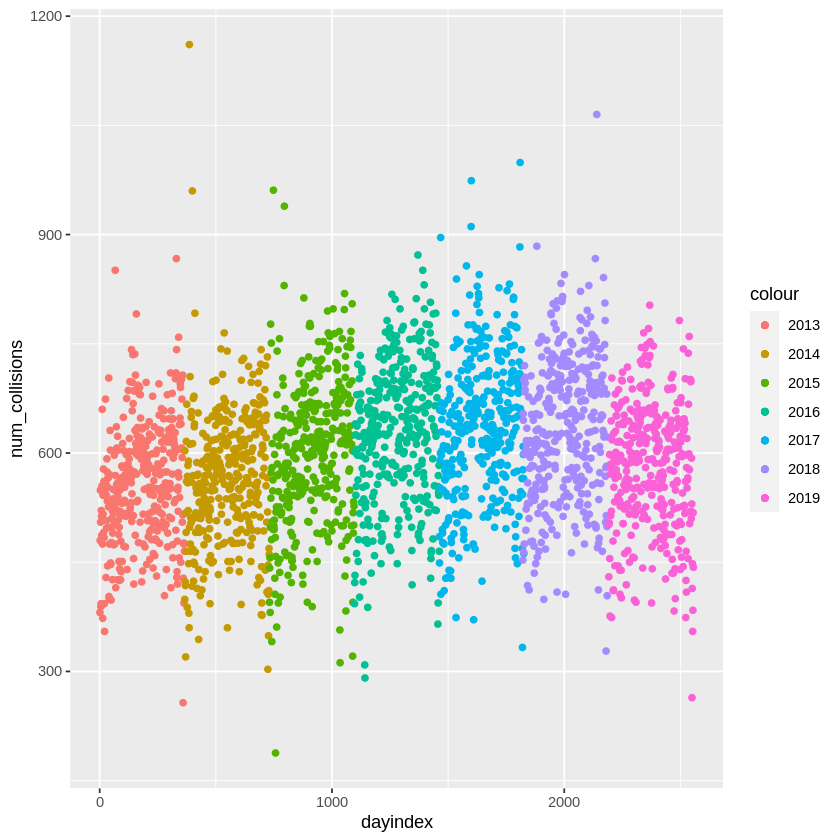

In [1722]:
ggplot() +
  geom_point(data=cdmix13a, aes(dayindex, num_collisions, color="2013")) +
  geom_point(data=cdmix14a, aes(dayindex, num_collisions, color="2014")) +
  geom_point(data=cdmix15a, aes(dayindex, num_collisions, color="2015")) +
  geom_point(data=cdmix16a, aes(dayindex, num_collisions, color="2016")) +
  geom_point(data=cdmix17a, aes(dayindex, num_collisions, color="2017")) +
  geom_point(data=cdmix18a, aes(dayindex, num_collisions, color="2018")) +
  geom_point(data=cdmix19a, aes(dayindex, num_collisions, color="2019"))

Minus a few abnormal values here and there, every year seems to have the same shape and trend when shown side by side. Next step would be to remove the values above 850 and below 350

In [1723]:
cdmix13b <- cdmix13a[which(cdmix13a$num_collisions >= 350),]
cdmix14b <- cdmix14a[which(cdmix14a$num_collisions >= 350),]
cdmix15b <- cdmix15a[which(cdmix15a$num_collisions >= 350),]
cdmix16b <- cdmix16a[which(cdmix16a$num_collisions >= 350),]
cdmix17b <- cdmix17a[which(cdmix17a$num_collisions >= 350),]
cdmix18b <- cdmix18a[which(cdmix18a$num_collisions >= 350),]
cdmix19b <- cdmix19a[which(cdmix19a$num_collisions >= 350),]
cdmix13c <- cdmix13b[which(cdmix13b$num_collisions <= 850),]
cdmix14c <- cdmix14b[which(cdmix14b$num_collisions <= 850),]
cdmix15c <- cdmix15b[which(cdmix15b$num_collisions <= 850),]
cdmix16c <- cdmix16b[which(cdmix16b$num_collisions <= 850),]
cdmix17c <- cdmix17b[which(cdmix17b$num_collisions <= 850),]
cdmix18c <- cdmix18b[which(cdmix18b$num_collisions <= 850),]
cdmix19c <- cdmix19b[which(cdmix19b$num_collisions <= 850),]

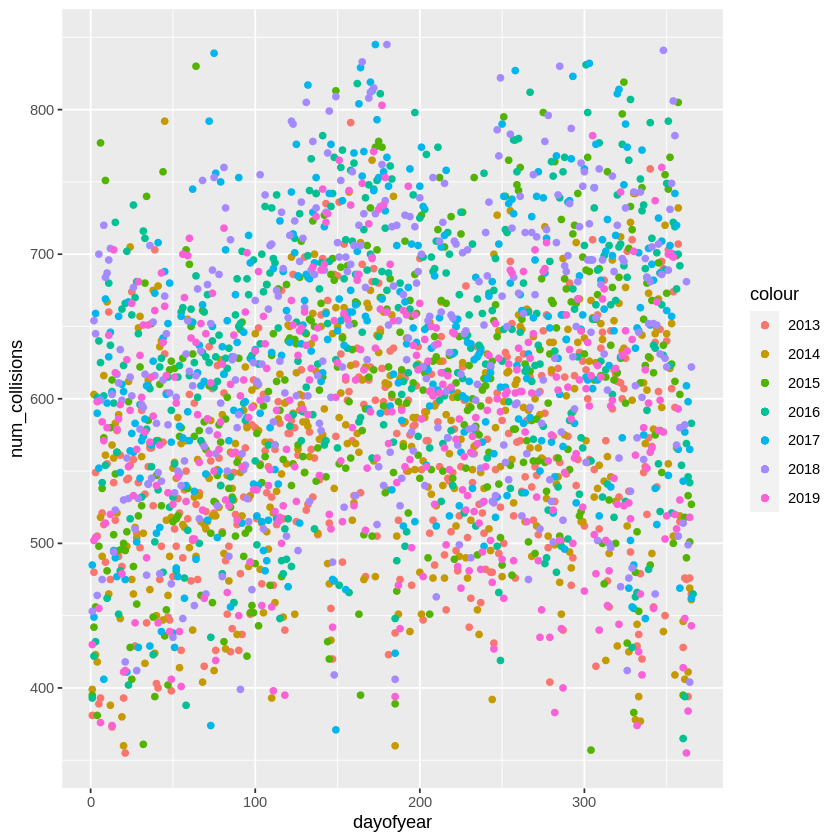

In [1724]:
ggplot() +
  geom_point(data=cdmix13c, aes(dayofyear, num_collisions, color="2013")) +
  geom_point(data=cdmix14c, aes(dayofyear, num_collisions, color="2014")) +
  geom_point(data=cdmix15c, aes(dayofyear, num_collisions, color="2015")) +
  geom_point(data=cdmix16c, aes(dayofyear, num_collisions, color="2016")) +
  geom_point(data=cdmix17c, aes(dayofyear, num_collisions, color="2017")) +
  geom_point(data=cdmix18c, aes(dayofyear, num_collisions, color="2018")) +
  geom_point(data=cdmix19c, aes(dayofyear, num_collisions, color="2019"))

Around day 200 is where the data looks the most stable with the highest values being the lowest of the high values and the lowest values being the highest of the low values. This region would probably be the best to isolate to look at a smaller section of the data. Since day 200 is in July the parameters could be expanded to the summer months of June, July and August to do a seasonal comparison when compared to the winter months of December, January and February.

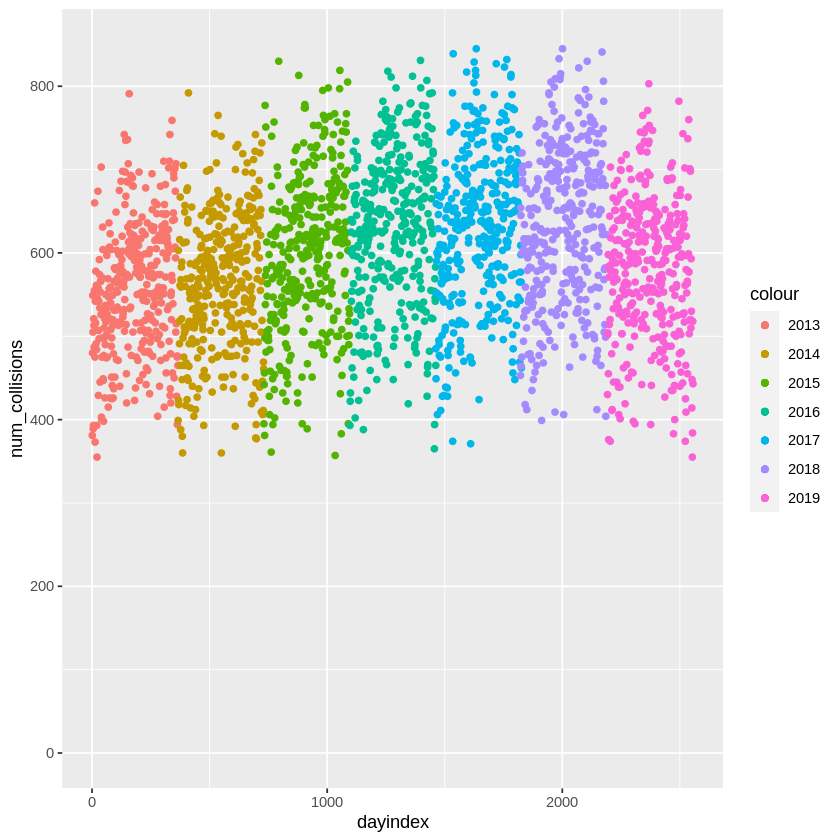

In [1725]:
seasonal <- ggplot() +
  geom_point(data=cdmix13c, aes(dayindex, num_collisions, color="2013")) +
  geom_point(data=cdmix14c, aes(dayindex, num_collisions, color="2014")) +
  geom_point(data=cdmix15c, aes(dayindex, num_collisions, color="2015")) +
  geom_point(data=cdmix16c, aes(dayindex, num_collisions, color="2016")) +
  geom_point(data=cdmix17c, aes(dayindex, num_collisions, color="2017")) +
  geom_point(data=cdmix18c, aes(dayindex, num_collisions, color="2018")) +
  geom_point(data=cdmix19c, aes(dayindex, num_collisions, color="2019"))

seasonal+ylim(0,850)

It looks like from 2013 - 2018 there is an increase in values until 2019 where it seems to drop.The 2019 data looks more visually similar to the 2013 or 2014 data rather than the 2018 data. Its too early to be attributed to covid since that started in 2020. Could be data error or data entry error or an external factor not reflected in the data but a reason can not be determined from the data.

Just a quick look at the weather values that produces the strongest correlation but restricting the data to only summer months (June, July, August) and then comparing them to winter months (December, January, February). The results from earlier are a yearly average but this will show if the season effects the results and how it does.

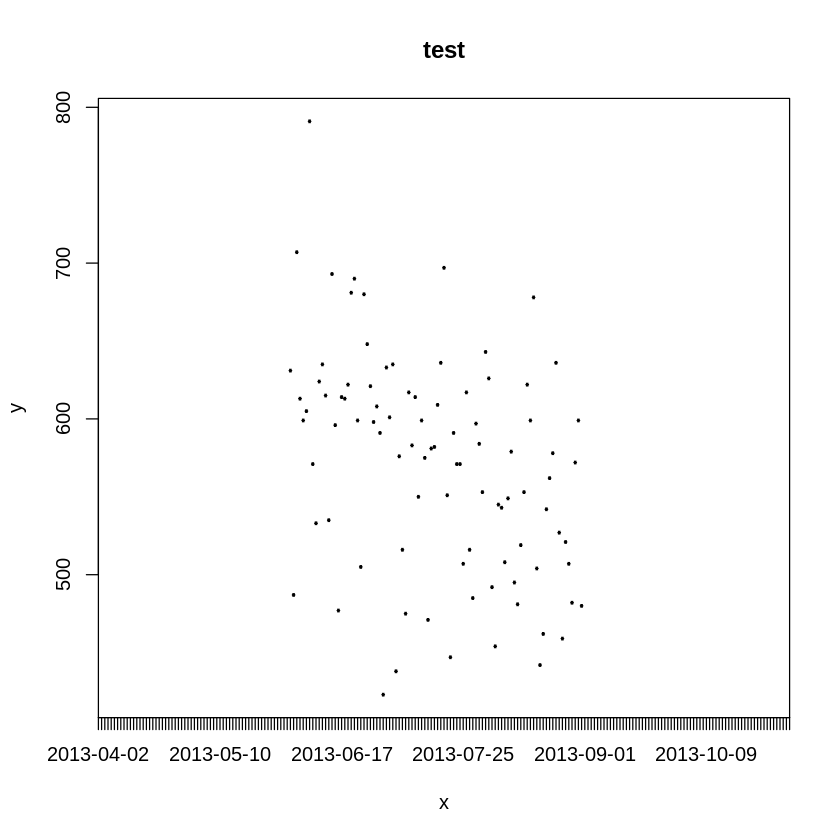

In [1726]:
plot(cd$collision_date[152:243], cd$num_collisions[152:243], main="test", xlim=c(100, 300))

In [1727]:
cor(cd$day[152:243], cd$num_collisions[152:243])

[1] 0.5066579

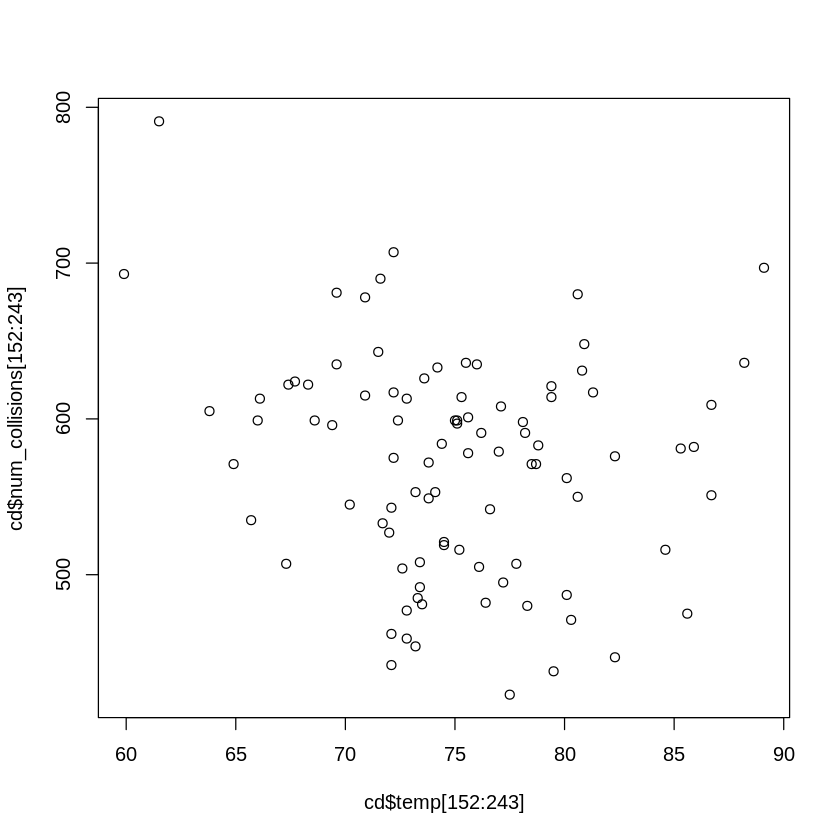

In [1728]:
plot(cd$temp[152:243], cd$num_collisions[152:243])

In [1729]:
cor(cd$temp[152:243], cd$num_collisions[152:243])

[1] -0.1792176

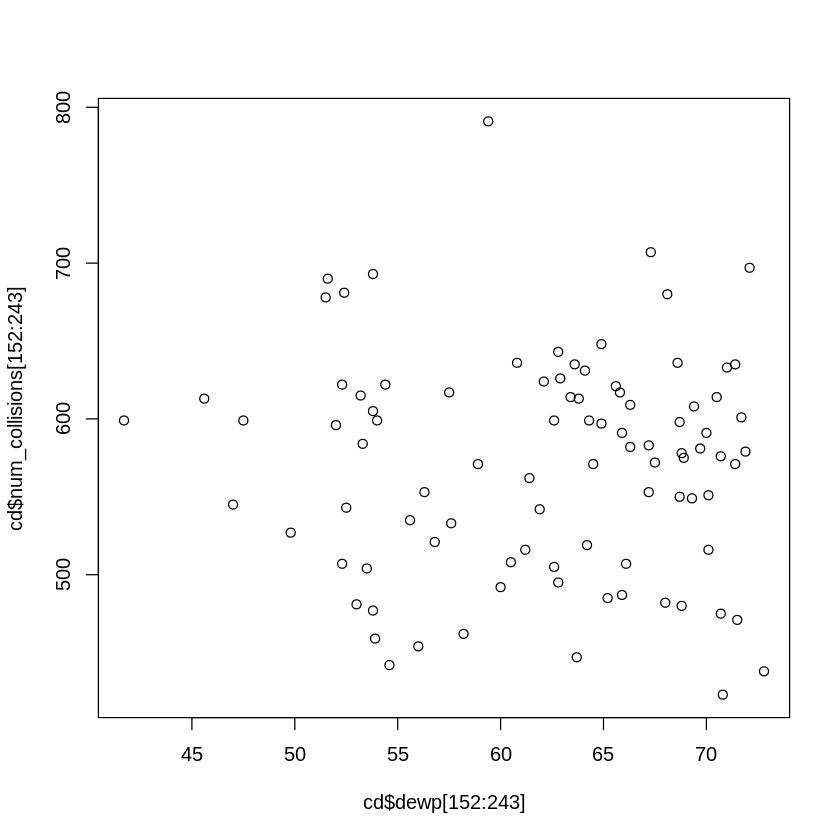

In [1730]:
plot(cd$dewp[152:243], cd$num_collisions[152:243])

In [1731]:
cor(cd$dewp[152:243], cd$num_collisions[152:243])

[1] -0.03535651

It appears that while looking at summer data for 2013, only the correlation of day and collisions has increased. Temperature and dew point have turned into a negative correlation from being positive in the data for the full year.

Next to look at the winter results. Since winter months are December to February the data stetches into 2014 slightly but it should not impact the results since its a look at seasonal influence rather than yearly.

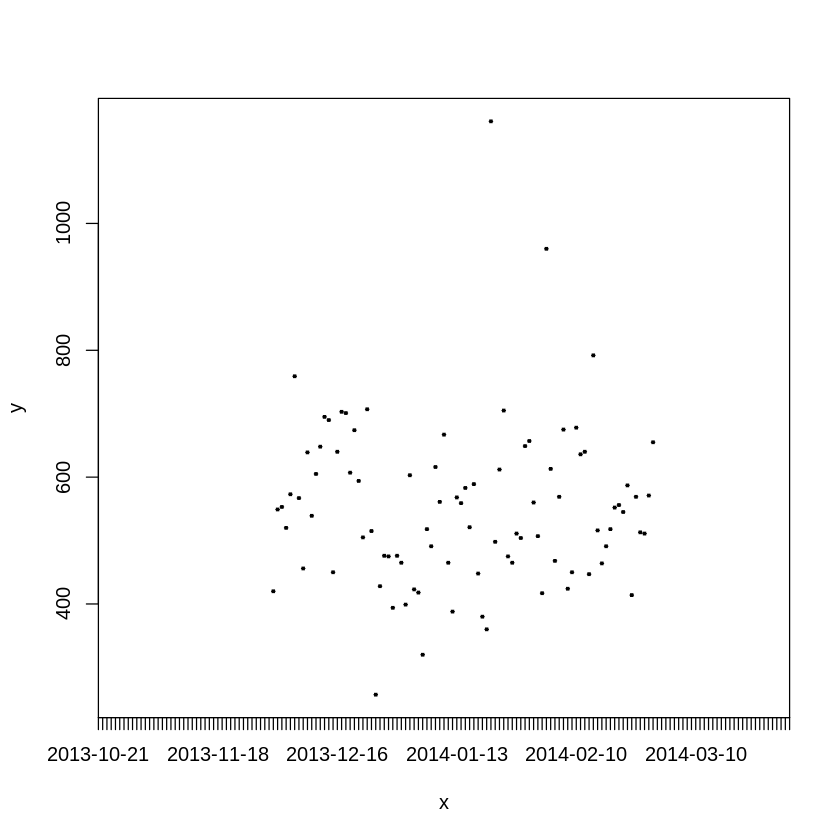

In [1732]:
plot(cd$collision_date[335:424], cd$num_collisions[335:424], xlim=c(300, 450))

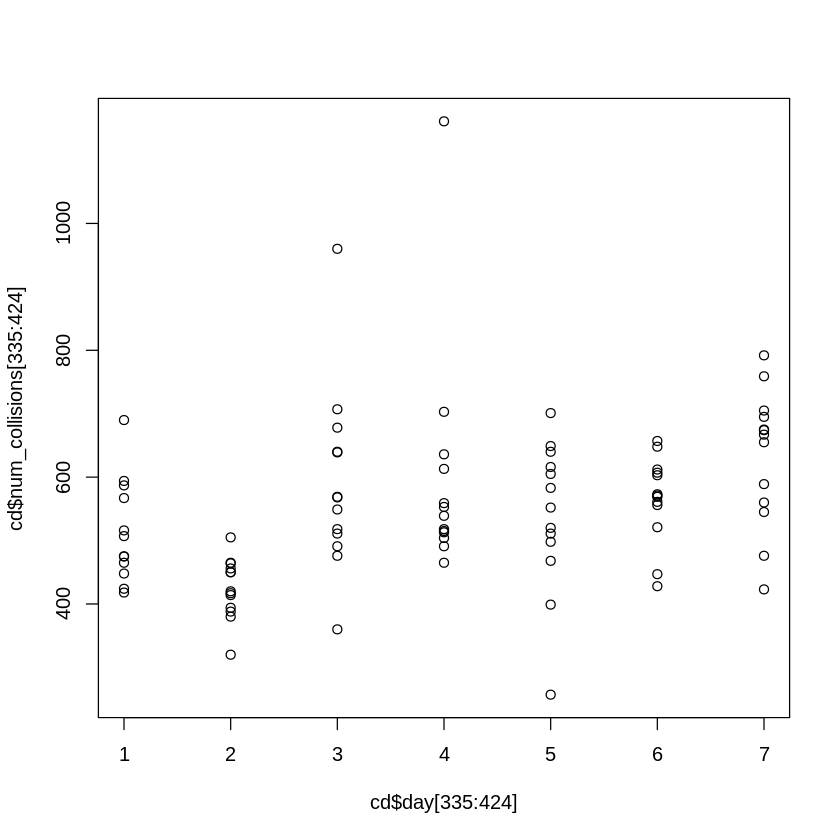

In [1733]:
plot(cd$day[335:424], cd$num_collisions[335:424])

In [1734]:
cor(cd$day[335:424], cd$num_collisions[335:424])

[1] 0.3274393

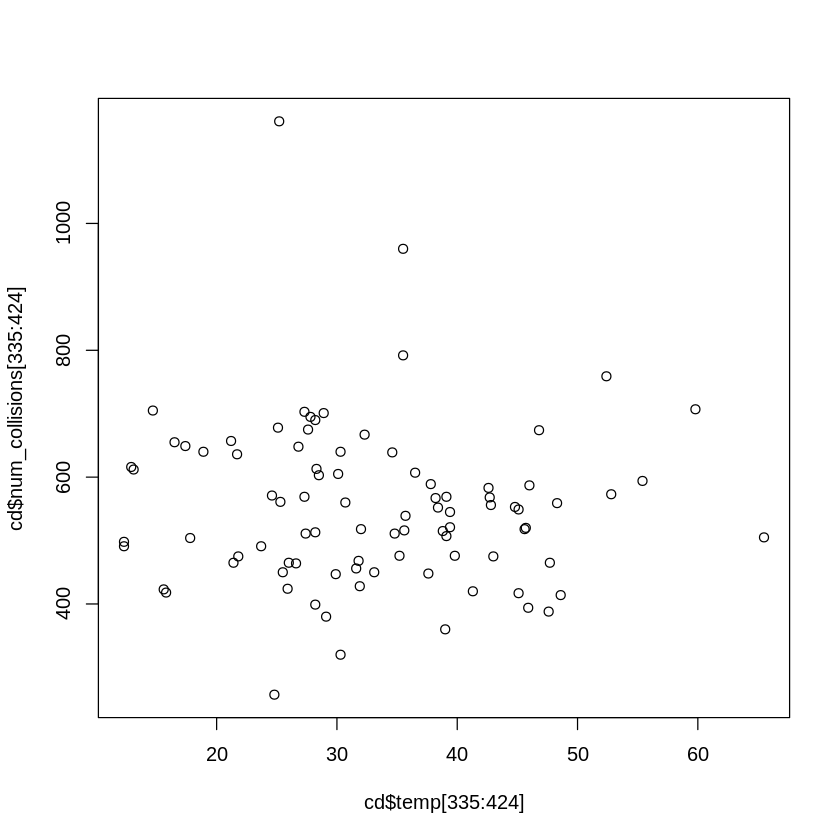

In [1735]:
plot(cd$temp[335:424], cd$num_collisions[335:424])

In [1736]:
cor(cd$temp[335:424], cd$num_collisions[335:424])

[1] -0.05488304

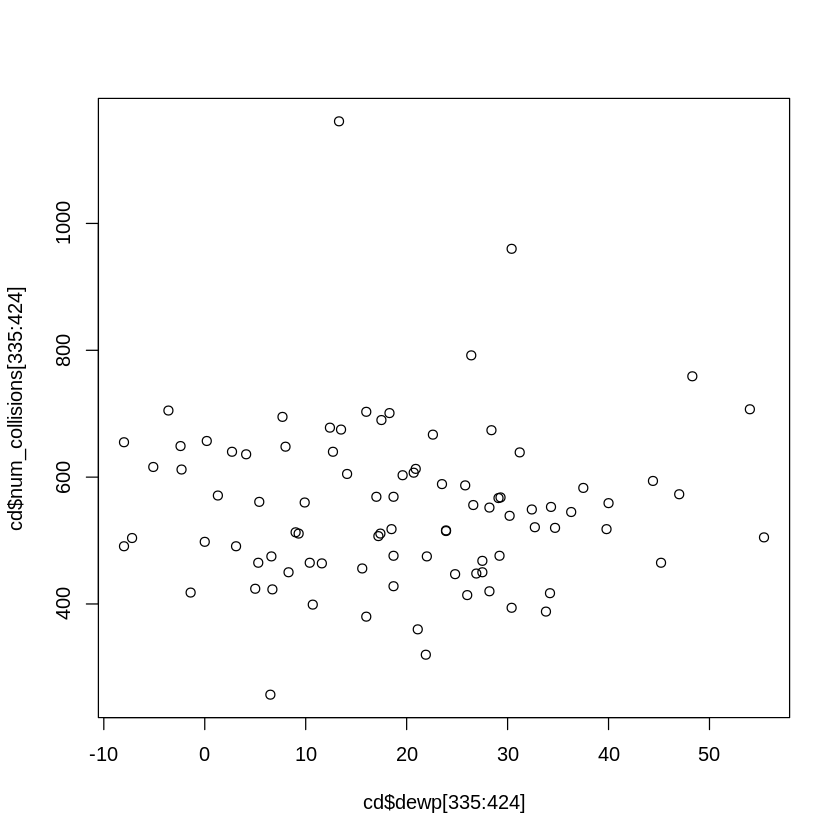

In [1737]:
plot(cd$dewp[335:424], cd$num_collisions[335:424])

In [1738]:
cor(cd$dewp[335:424], cd$num_collisions[335:424])

[1] 0.005706067

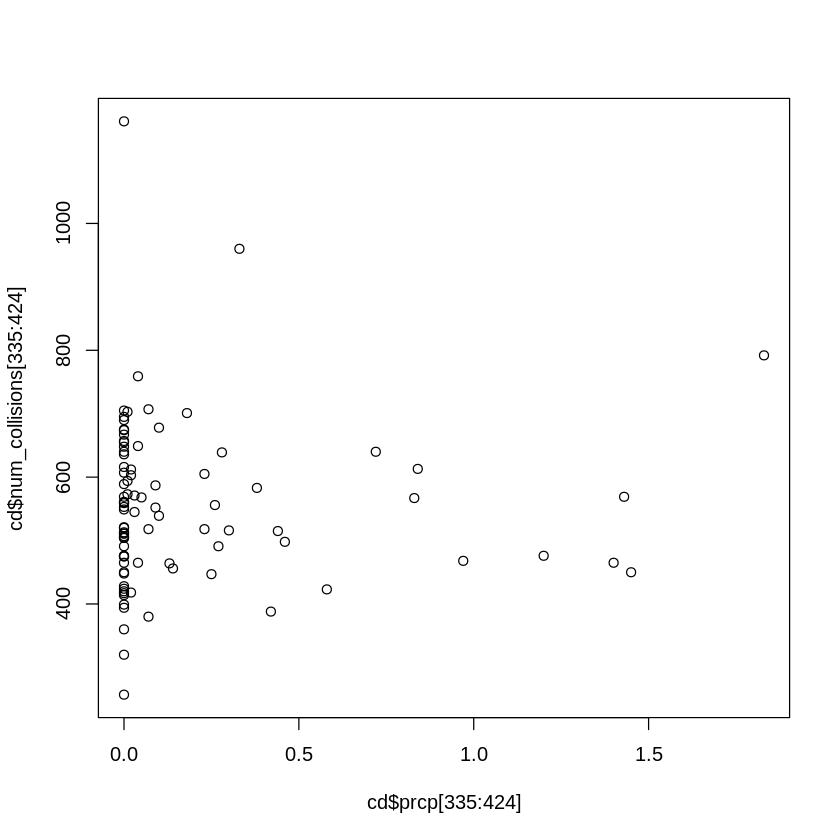

In [1739]:
plot(cd$prcp[335:424], cd$num_collisions[335:424])

In [1740]:
cor(cd$prcp[335:424], cd$num_collisions[335:424])

[1] 0.02520129

In [1741]:
cor(cd$wdsp[335:424], cd$num_collisions[335:424])

[1] 0.08818799

Winter results only show day to have a positive correlation but weaker than the yearly results and much weaker than the summer result. Temperature and dew point have negligible values in the winter data and even adding precipitation and wind speed, there seems to be little difference. Will check the data of another year for comparison.

Next is checking the summer and winter seasons of 2016 as a comparison to the 2013 data.

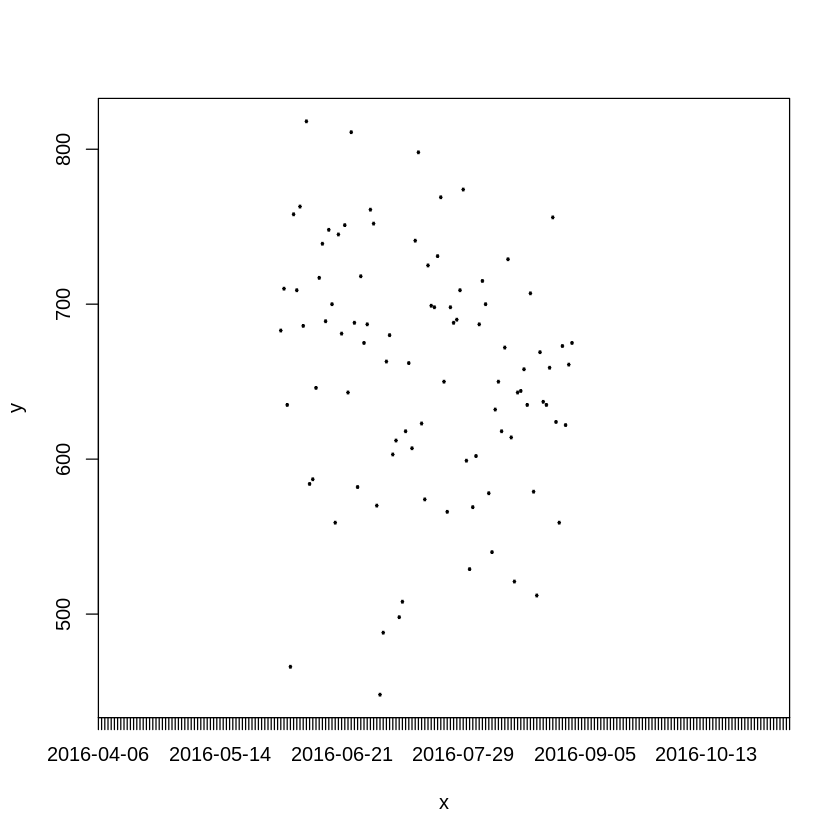

In [1742]:
plot(cd$collision_date[1249:1340], cd$num_collisions[1249:1340], xlim=c(1200,1400))

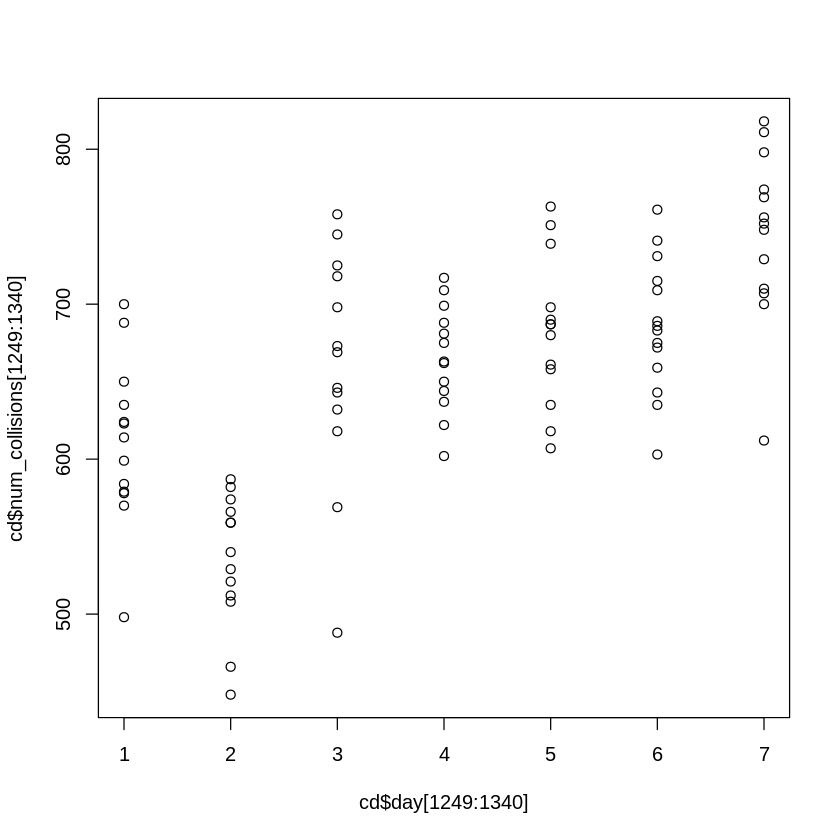

In [1743]:
plot(cd$day[1249:1340], cd$num_collisions[1249:1340])

In [1744]:
cor(cd$day[1249:1340], cd$num_collisions[1249:1340])

[1] 0.6568427

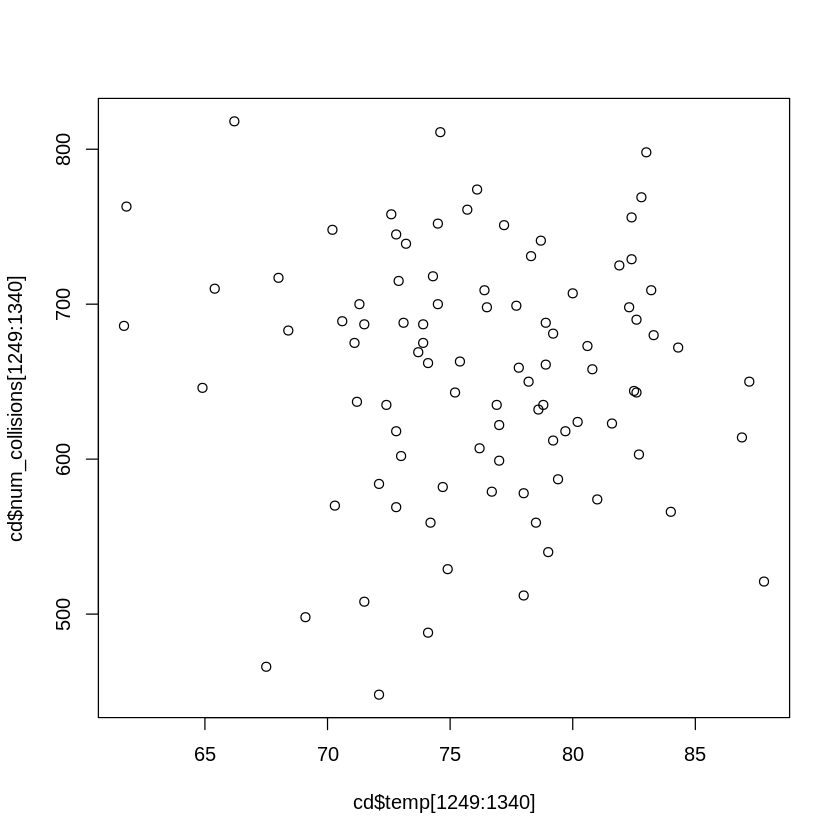

In [1745]:
plot(cd$temp[1249:1340], cd$num_collisions[1249:1340])

In [1746]:
cor(cd$temp[1249:1340], cd$num_collisions[1249:1340])

[1] -0.04172858

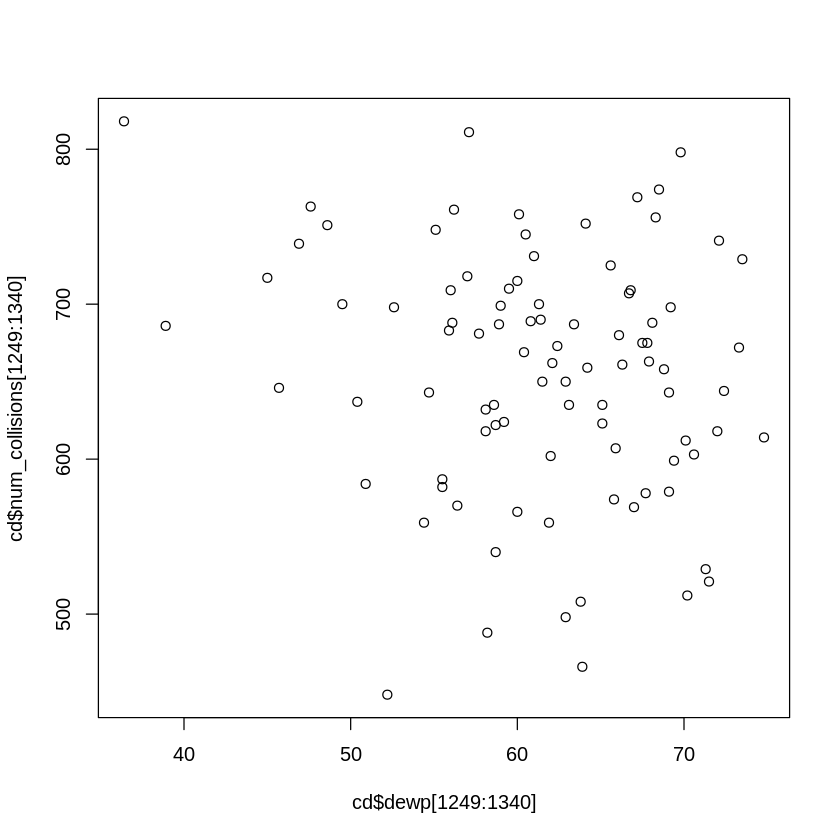

In [1747]:
plot(cd$dewp[1249:1340], cd$num_collisions[1249:1340])

In [1748]:
cor(cd$dewp[1249:1340], cd$num_collisions[1249:1340])

[1] -0.1771981

Now to look at winter results for 2016 into 2017.

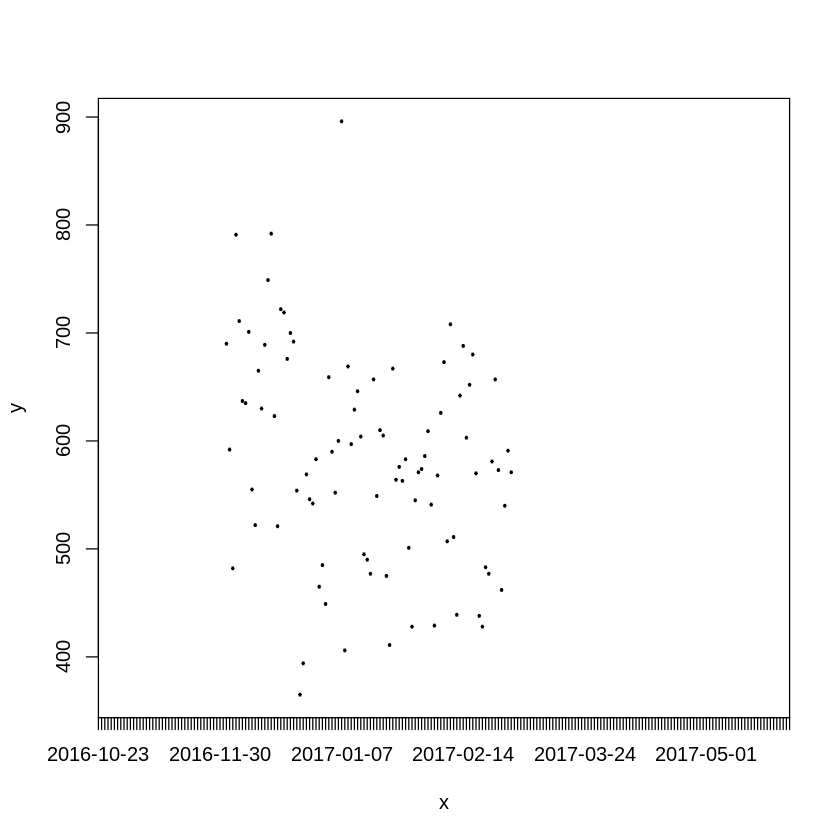

In [1749]:
plot(cd$collision_date[1432:1521], cd$num_collisions[1432:1521], xlim=c(1400,1600))

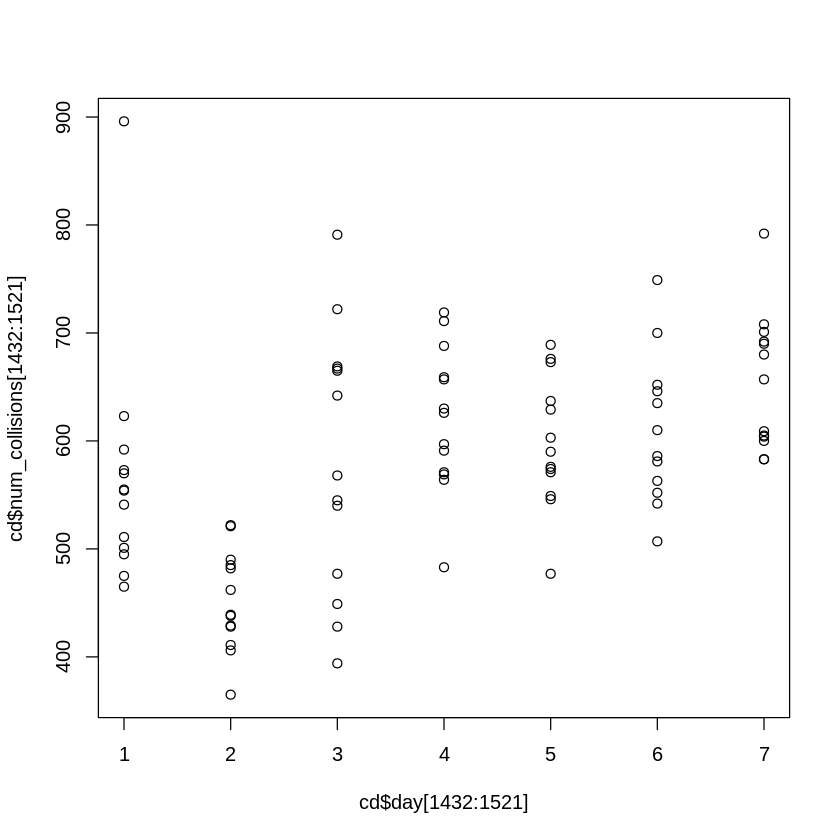

In [1750]:
plot(cd$day[1432:1521], cd$num_collisions[1432:1521])

In [1751]:
cor(cd$day[1432:1521], cd$num_collisions[1432:1521])

[1] 0.4373011

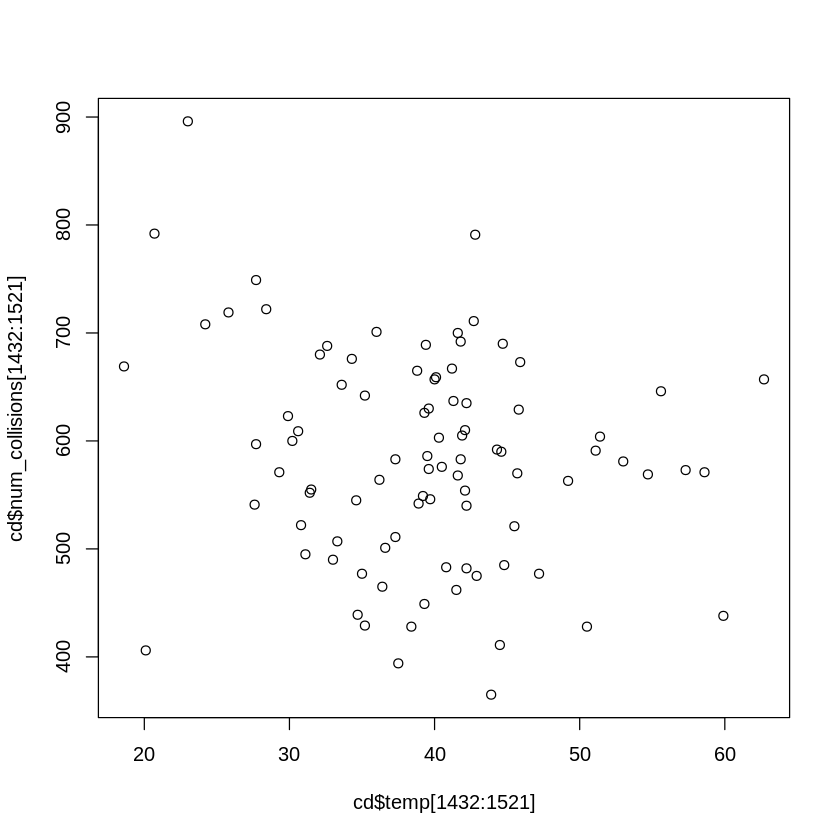

In [1752]:
plot(cd$temp[1432:1521], cd$num_collisions[1432:1521])

In [1753]:
cor(cd$temp[1432:1521], cd$num_collisions[1432:1521])

[1] -0.2019083

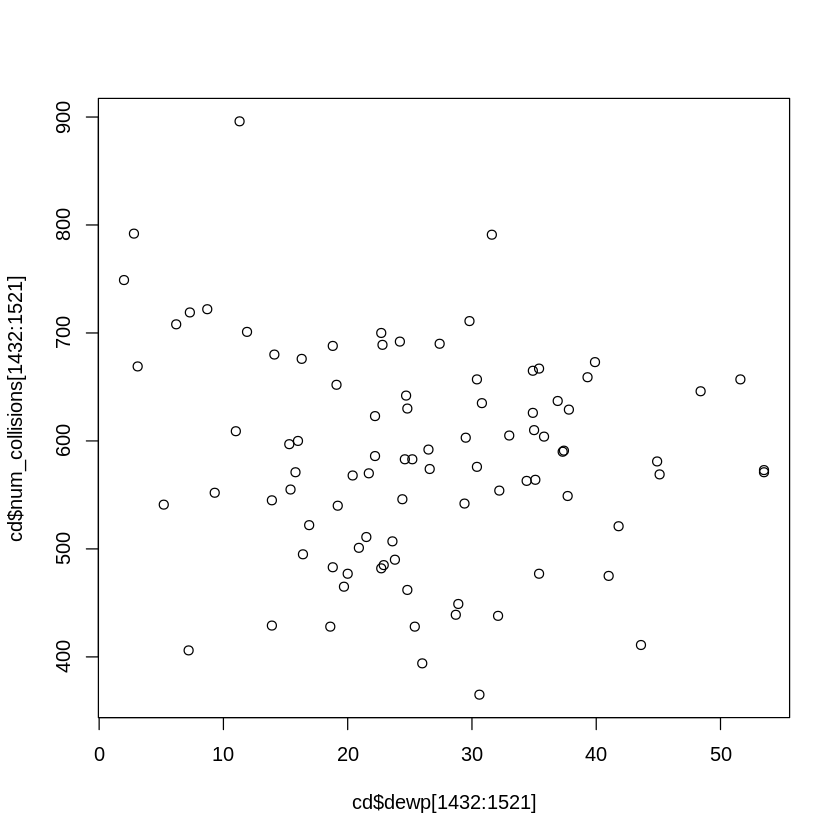

In [1754]:
plot(cd$dewp[1432:1521], cd$num_collisions[1432:1521])

In [1755]:
cor(cd$dewp[1432:1521], cd$num_collisions[1432:1521])

[1] -0.1413196

This was just a brief look at a possible seasonal pattern. The correlation with day and collisions looks to increase in summer but decrease slightly in winter. Temperature and dew point seem to turn into a negative linear relationship when the data is reduced to smaller sizes. To investigate the data could be further analysed for every season to see which weather variations create a positive linear relationship and which produce a negative. The data could be futher broken down into monthly sections to investigate which month of the year has the highest positive/negative linear relationship for each year. The collision data also contains the type of collision e.g. if pedestrains were invloved, which could be used to further explore if the different seasons are more likely to have different kinds of incidents.

It shows that Sunday (day 2) always seems to have the lowest number of collisions and Friday (day 7) always has the highest in both the opposite seasons. This suggests the correlation is possibly related to the work week as the weekends have lower collision numbers when compared to the later days in the week. End of work week fatigue could be a contributing factor to the increased numbers of collisions on fridays as the majority of the population work standard mon-fri, 9-5 jobs.

Now to look at a visual representation of the seasonal collision data. It will involve the same years as above, 2013 and 2016 just to keep the comparison equal.

In [1811]:
latlong2013 <- read.csv("https://raw.githubusercontent.com/23011985uhi/23011985_DataAnalytics/main/latlong2013.csv")

In [1813]:
head(latlong2013)

dateof     year month latitude longitude
1 2013-01-01 2013 1     40.75773 -73.99685
2 2013-01-01 2013 1     40.77207 -73.94994
3 2013-01-01 2013 1     40.72405 -74.00438
4 2013-01-01 2013 1     40.87330 -73.85364
5 2013-01-01 2013 1     40.84733 -73.83136
6 2013-01-01 2013 1     40.75931 -73.96529

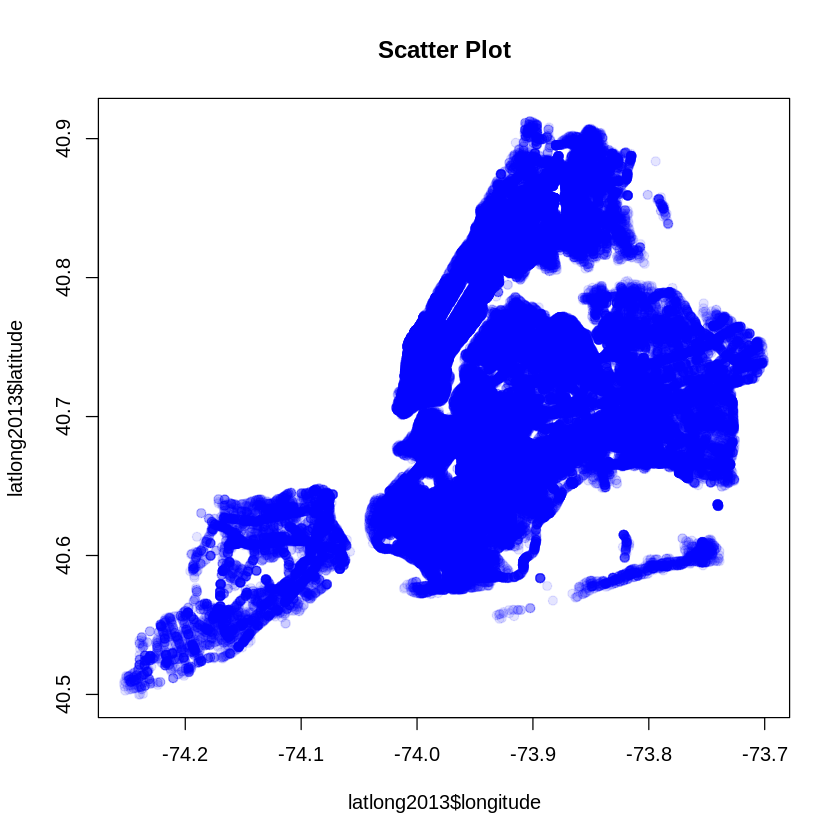

In [1822]:
plot(latlong2013$longitude, latlong2013$latitude, main="NYC 2013", col=adjustcolor("#0000FF", alpha.f = 0.1), pch=19)

Not much can be determined from the full year spatial data except a clearly defined shape of new york city itself. So it will be broken down into summer and winter where the months of June/July will be the summer values and November/December will be the winter values.

In [1823]:
latlong2013summer <- read.csv("https://raw.githubusercontent.com/23011985uhi/23011985_DataAnalytics/main/latlong2013summer.csv")

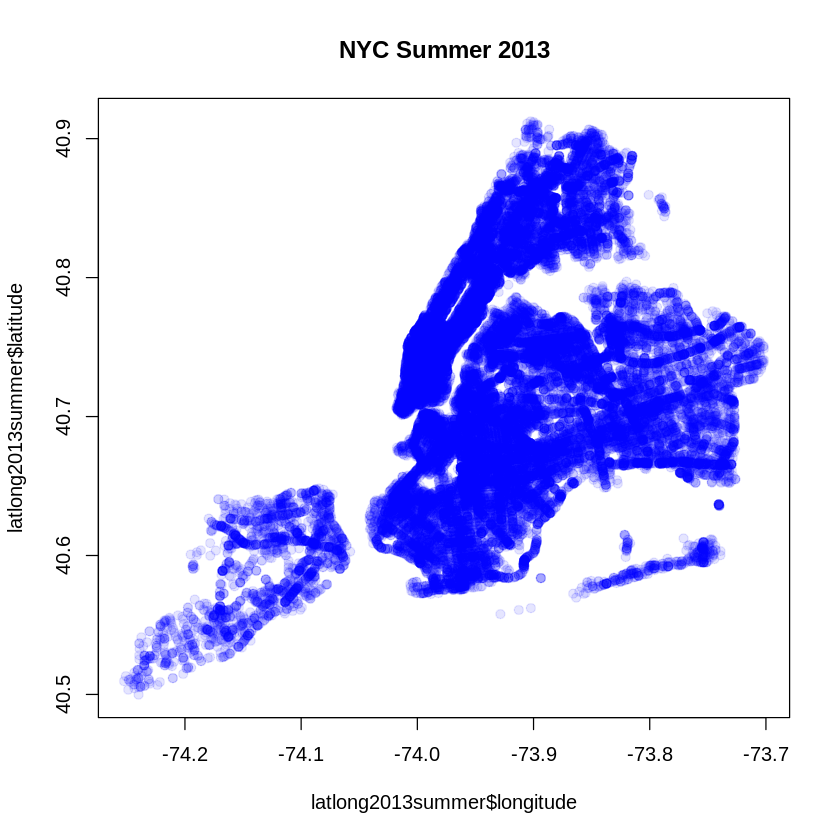

In [1827]:
plot(latlong2013summer$longitude, latlong2013summer$latitude, main="NYC Summer 2013", col=adjustcolor("#0000FF", alpha.f = 0.1), pch=19)

In [1825]:
latlong2013winter <- read.csv("https://raw.githubusercontent.com/23011985uhi/23011985_DataAnalytics/main/latlong2013winter.csv")

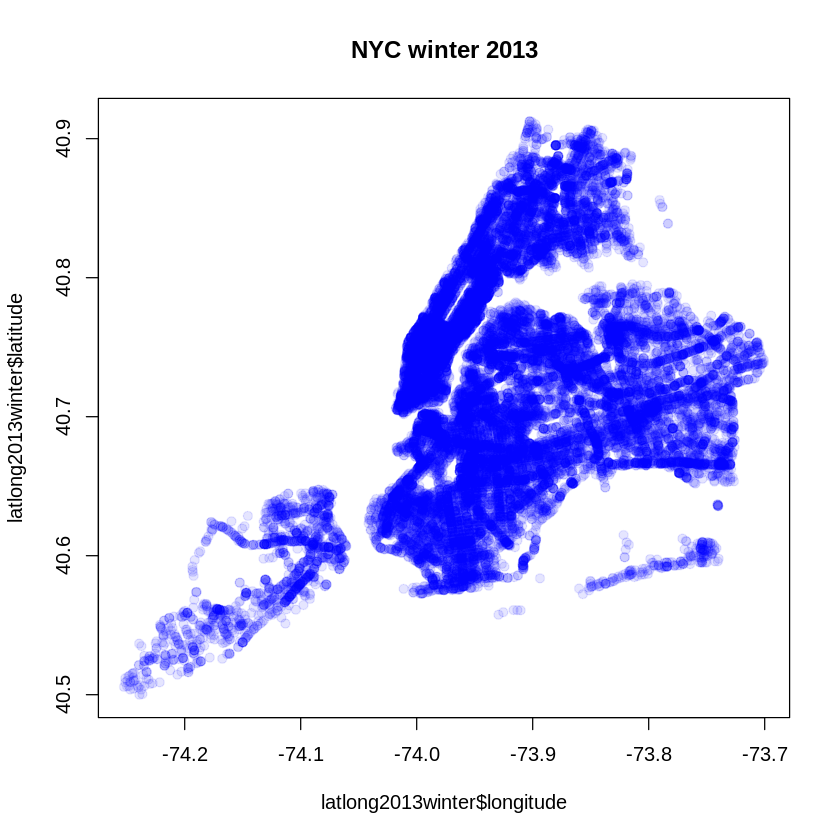

In [1828]:
plot(latlong2013winter$longitude, latlong2013winter$latitude, main="NYC winter 2013", col=adjustcolor("#0000FF", alpha.f = 0.1), pch=19)

The spatial map shows some differences between summer and winter 2013. Staten Island clearly has a lower number of collisions in winter and overall most of the city does as well. Except for Manhatten which is the most densely populated part of New York and not much difference is to be expected.

Now to have a look at 2016 data to see if its similar.

In [1829]:
latlong2016 <- read.csv("https://raw.githubusercontent.com/23011985uhi/23011985_DataAnalytics/main/latlong2016.csv")

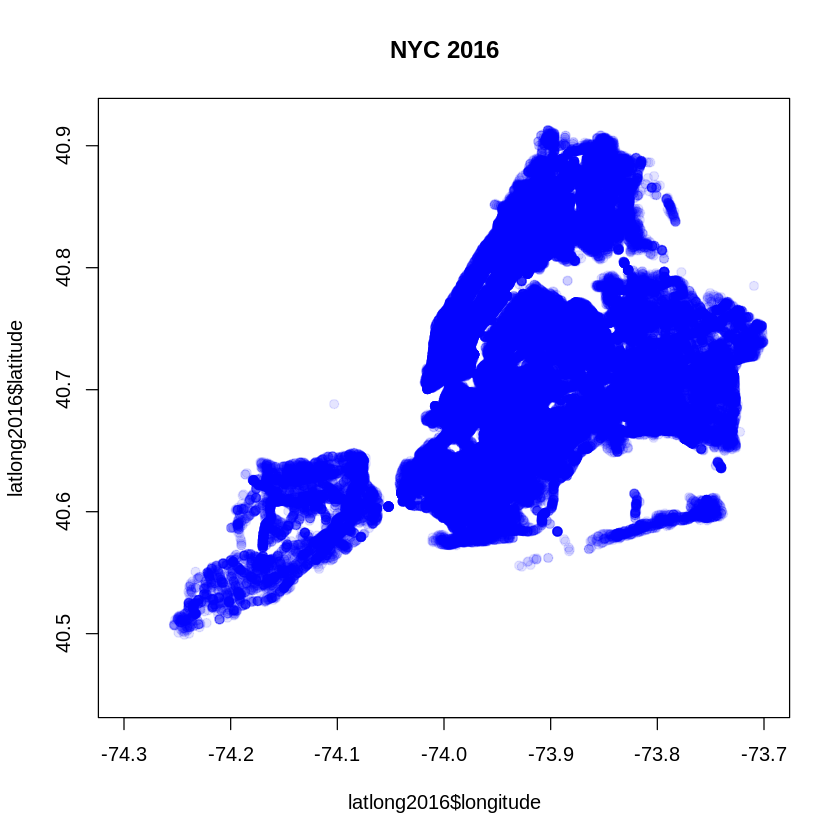

In [1842]:
plot(latlong2016$longitude, latlong2016$latitude, main="NYC 2016", col=adjustcolor("#0000FF", alpha.f = 0.1), pch=19, xlim=c(-74.3,-73.7), ylim=c(40.45,40.92))

In [1833]:
latlong2016summer <- read.csv("https://raw.githubusercontent.com/23011985uhi/23011985_DataAnalytics/main/latlong2016summer.csv")

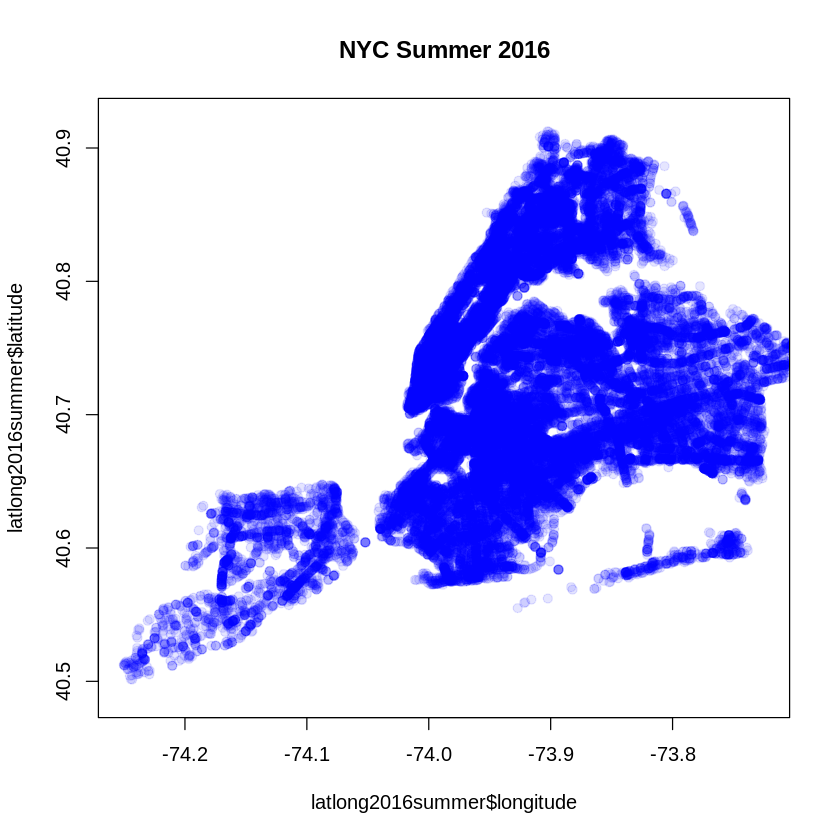

In [1855]:
plot(latlong2016summer$longitude, latlong2016summer$latitude, main="NYC Summer 2016", col=adjustcolor("#0000FF", alpha.f = 0.1), pch=19, xlim=c(-74.25,-73.725), ylim=c(40.49,40.92))

In [1843]:
latlong2016winter <- read.csv("https://raw.githubusercontent.com/23011985uhi/23011985_DataAnalytics/main/latlong2016winter.csv")

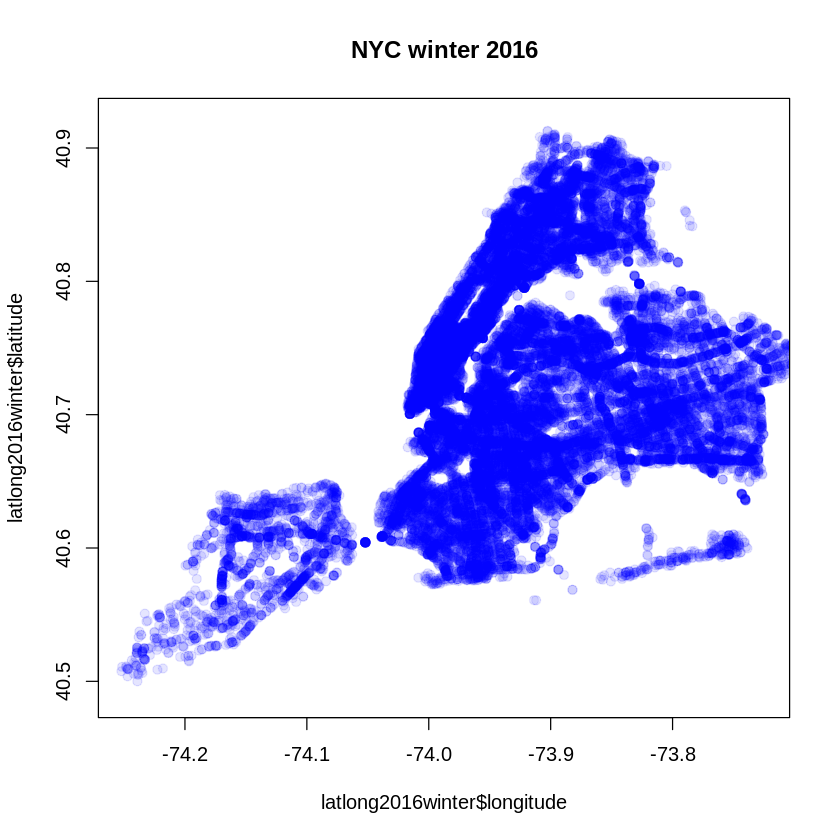

In [1852]:
plot(latlong2016winter$longitude, latlong2016winter$latitude, main="NYC winter 2016", col=adjustcolor("#0000FF", alpha.f = 0.1), pch=19, xlim=c(-74.25,-73.725), ylim=c(40.49,40.92))

Again there is a clear reduction for the winter collision number, especially in staten island. Its difficult to determine if Mnahatten is effected but further analysis could be completeled by comparing isolated parts of the map and comparing the numbers for different times of the year to check for seasonal trends or patterns. The high density areas could also be cross referenced with the weather value for the time period to determine if the weather was a factor in the increase or decrease in collision numbers. There is many different angles to approach the analysis of this data.
For the purpose of this report that will not be happening due to size contraints

For the linear regressor, day, temperature and dew point with number of collisions will still be getting used as they produced the best relationships in the full dataset covering every year.  

Next step would be to normalise the number of collisions data since there is high variance.

In [1756]:
cdmix13d <- cdmix13c
cdmix14d <- cdmix14c
cdmix15d <- cdmix15c
cdmix16d <- cdmix16c
cdmix17d <- cdmix17c
cdmix18d <- cdmix18c
cdmix19d <- cdmix19c

In [1757]:
cdmix13d$num_collisions <- (cdmix13d$num_collisions - mean(cdmix13d$num_collisions)) / sd(cdmix13d$num_collisions)

In [1758]:
cdmix14d$num_collisions <- (cdmix14d$num_collisions - mean(cdmix14d$num_collisions)) / sd(cdmix14d$num_collisions)

In [1759]:
cdmix15d$num_collisions <- (cdmix15d$num_collisions - mean(cdmix15d$num_collisions)) / sd(cdmix15d$num_collisions)

In [1760]:
cdmix16d$num_collisions <- (cdmix16d$num_collisions - mean(cdmix16d$num_collisions)) / sd(cdmix16d$num_collisions)

In [1761]:
cdmix17d$num_collisions <- (cdmix17d$num_collisions - mean(cdmix17d$num_collisions)) / sd(cdmix17d$num_collisions)

In [1762]:
cdmix18d$num_collisions <- (cdmix18d$num_collisions - mean(cdmix18d$num_collisions)) / sd(cdmix18d$num_collisions)

In [1763]:
cdmix19d$num_collisions <- (cdmix19d$num_collisions - mean(cdmix19d$num_collisions)) / sd(cdmix19d$num_collisions)

In [1764]:
cdmixfull <- rbind(cdmix13d, cdmix14d, cdmix15d, cdmix16d, cdmix17d, cdmix18d, cdmix19d)

In [1765]:
cdmixfull

dayindex dayofyear day year mo da collision_date temp dewp slp    visib
1     1        1        4   2013 1   1 2013-01-01     37.8 23.6 1011.9 10.0 
2     2        2        5   2013 1   2 2013-01-02     27.1 10.5 1016.8 10.0 
3     3        3        6   2013 1   3 2013-01-03     28.4 14.1 1020.6 10.0 
4     4        4        7   2013 1   4 2013-01-04     33.4 18.6 1017.0 10.0 
5     5        5        1   2013 1   5 2013-01-05     36.1 18.7 1020.6 10.0 
6     6        6        2   2013 1   6 2013-01-06     38.3 25.0 1019.5  8.5 
7     7        7        3   2013 1   7 2013-01-07     40.9 23.8 1022.6 10.0 
8     8        8        4   2013 1   8 2013-01-08     40.7 25.4 1028.5  9.3 
9     9        9        5   2013 1   9 2013-01-09     43.8 30.8 1026.3  7.8 
10   10       10        6   2013 1  10 2013-01-10     44.3 25.4 1028.5  9.9 
11   11       11        7   2013 1  11 2013-01-11     40.5 27.1 1030.4  9.4 
12   12       12        1   2013 1  12 2013-01-12     44.6 43.0 1020.5  3.9 
13   13       13        2   2013 1  13 2013-01-13     45.3 43.1 1019.7  4.2 
14   14       14        3   2013 1  14 2013-01-14     52.5 45.4 1016.8  5.9 
15   15       15        4   2013 1  15 2013-01-15     37.9 27.9 1025.5  9.7 
16   16       16        5   2013 1  16 2013-01-16     34.2 30.0 1018.6  5.4 
17   17       17        6   2013 1  17 2013-01-17     39.2 28.0 1015.6  9.7 
18   18       18        7   2013 1  18 2013-01-18     30.2 12.2 1024.4 10.0 
19   19       19        1   2013 1  19 2013-01-19     37.3 18.1 1024.7 10.0 
20   20       20        2   2013 1  20 2013-01-20     45.3 23.4 1009.8 10.0 
21   21       21        3   2013 1  21 2013-01-21     29.8  9.3 1016.1 10.0 
22   22       22        4   2013 1  22 2013-01-22     22.4  4.0 1014.4  9.9 
23   23       23        5   2013 1  23 2013-01-23     14.4 -5.4 1022.5 10.0 
24   24       24        6   2013 1  24 2013-01-24     16.8 -1.7 1023.0 10.0 
25   25       25        7   2013 1  25 2013-01-25     17.1  1.5 1027.5  9.3 
26   26       26        1   2013 1  26 2013-01-26     19.9  9.2 1019.8  9.0 
27   27       27        2   2013 1  27 2013-01-27     24.5  7.5 1030.3 10.0 
28   28       28        3   2013 1  28 2013-01-28     31.8 19.0 1029.1  6.9 
29   29       29        4   2013 1  29 2013-01-29     40.3 35.3 1018.2  5.3 
30   30       30        5   2013 1  30 2013-01-30     45.7 42.9 1010.2  3.5 
⋮    ⋮        ⋮         ⋮   ⋮    ⋮  ⋮  ⋮              ⋮    ⋮    ⋮      ⋮    
2526 2526     335       2   2019 12  1 2019-12-01     33.3 21.0 1013.8  8.0 
2527 2527     336       3   2019 12  2 2019-12-02     35.3 32.7  999.0  5.4 
2528 2528     337       4   2019 12  3 2019-12-03     32.4 26.0 1000.1  6.6 
2529 2529     338       5   2019 12  4 2019-12-04     35.3 27.1 1001.0  9.0 
2530 2530     339       6   2019 12  5 2019-12-05     38.6 27.5 1006.1  9.4 
2531 2531     340       7   2019 12  6 2019-12-06     40.6 23.7 1017.6 10.0 
2532 2532     341       1   2019 12  7 2019-12-07     36.6 18.2 1025.1 10.0 
2533 2533     342       2   2019 12  8 2019-12-08     34.0 18.5 1032.3 10.0 
2534 2534     343       3   2019 12  9 2019-12-09     46.8 43.4 1021.9  4.4 
2535 2535     344       4   2019 12 10 2019-12-10     55.8 51.6 1008.6  8.5 
2536 2536     345       5   2019 12 11 2019-12-11     37.3 30.4 1022.2  8.3 
2537 2537     346       6   2019 12 12 2019-12-12     31.1 11.0 1037.0 10.0 
2538 2538     347       7   2019 12 13 2019-12-13     39.1 30.9 1031.0  8.4 
2539 2539     348       1   2019 12 14 2019-12-14     50.1 49.1 1001.3  2.4 
2540 2540     349       2   2019 12 15 2019-12-15     44.8 29.3 1004.5 10.0 
2541 2541     350       3   2019 12 16 2019-12-16     35.6 17.3 1022.9 10.0 
2542 2542     351       4   2019 12 17 2019-12-17     33.5 29.8 1014.3  5.5 
2543 2543     352       5   2019 12 18 2019-12-18     33.0 24.8 1009.6  9.6 
2544 2544     353       6   2019 12 19 2019-12-19     21.3  7.7 1023.8  9.0 
2545 2545     354       7   2019 12 20 2019-12-20     25.8 10.8 1032.5 10.0 
2

That is all the years collision numbers normalised and the yearly datsets combined again into a single dataset.

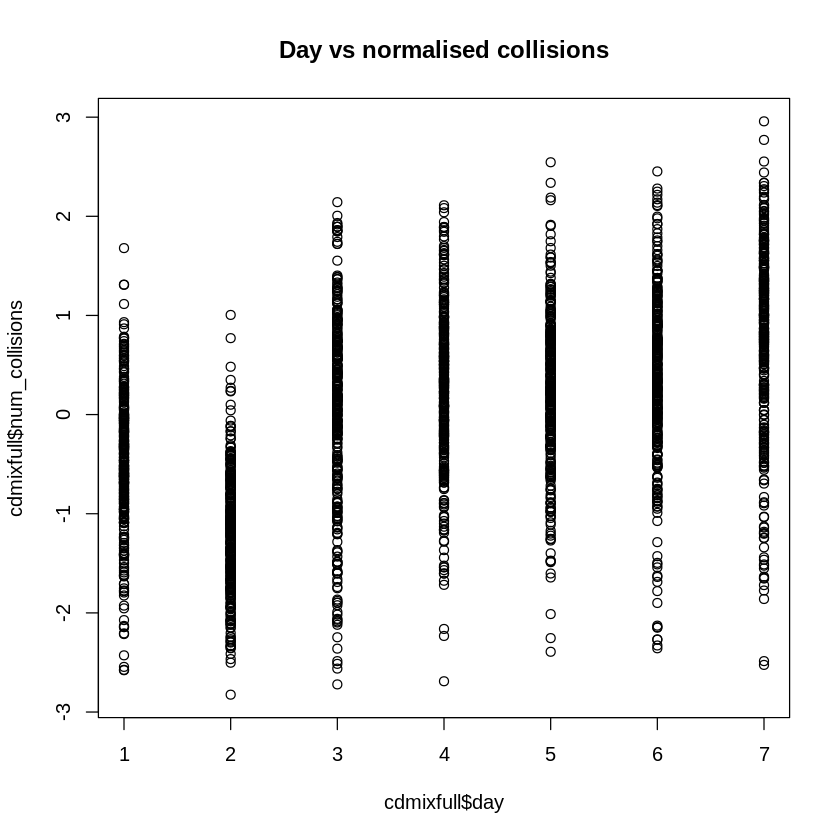

In [1766]:
plot(cdmixfull$day, cdmixfull$num_collisions, main="Day vs normalised collisions")

In [1767]:
cor(cdmixfull$day, cdmixfull$num_collisions)

[1] 0.4936038

In [1768]:
cor(cdmixfull$temp, cdmixfull$num_collisions)

[1] 0.2279226

In [1769]:
cor(cdmixfull$dewp, cdmixfull$num_collisions)

[1] 0.2100415

Day is still showing the strongest relationship to number of collisions while temperature and dew point still show the best relationship of the weather variables. These will be the values used in the linear regressor dataset.

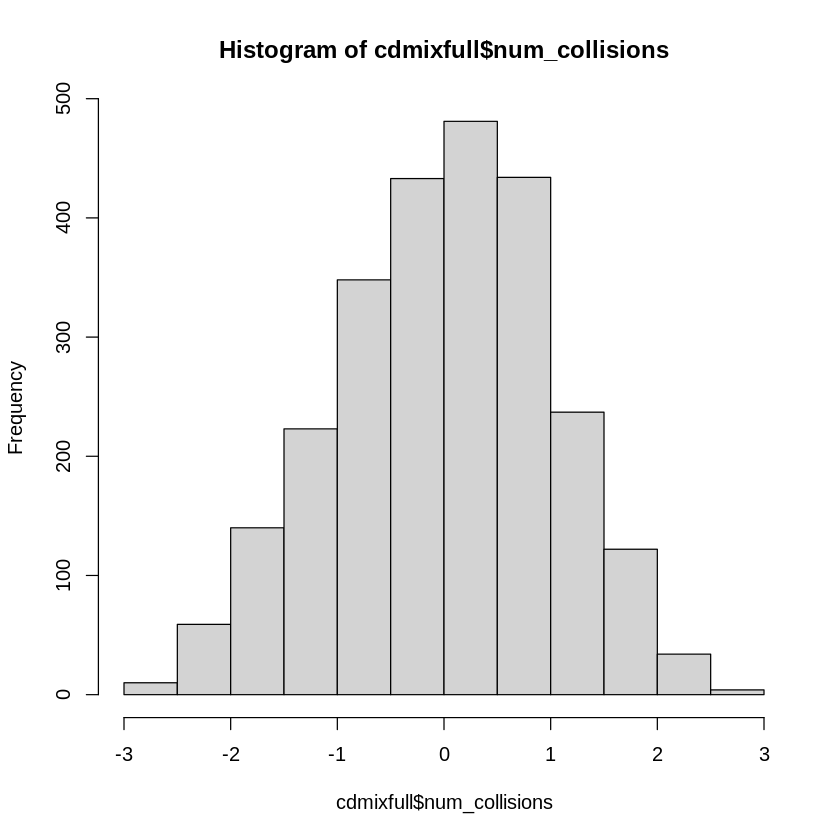

In [1770]:
hist(cdmixfull$num_collisions, )

A histogram showing normal distribution in the data and lower variance. This will produce better results when used within the linear regression model.
Now to isolate and export the required data.

In [1771]:
head(cdmixfull)

dayindex dayofyear day year mo da collision_date temp dewp slp    visib wdsp
1 1        1         4   2013 1  1  2013-01-01     37.8 23.6 1011.9 10.0  6.1 
2 2        2         5   2013 1  2  2013-01-02     27.1 10.5 1016.8 10.0  5.3 
3 3        3         6   2013 1  3  2013-01-03     28.4 14.1 1020.6 10.0  3.7 
4 4        4         7   2013 1  4  2013-01-04     33.4 18.6 1017.0 10.0  6.5 
5 5        5         1   2013 1  5  2013-01-05     36.1 18.7 1020.6 10.0  6.6 
6 6        6         2   2013 1  6  2013-01-06     38.3 25.0 1019.5  8.5  5.3 
  mxpsd gust max  min  prcp sndp  fog num_collisions
1  8.9  19.0 39.9 33.1 0    999.9 0   -2.2327041    
2  9.9  19.0 33.1 21.9 0    999.9 0   -0.9793850    
3  8.0  15.0 32.0 24.1 0    999.9 0   -0.1058596    
4 13.0  24.1 37.0 30.0 0    999.9 0   -0.6628903    
5 12.0  21.0 42.1 32.0 0    999.9 0   -2.1314258    
6  8.9  17.1 46.0 34.0 0    999.9 0   -2.0807866

In [1772]:
regressiondata <- cdmixfull[,c(3,8,9,20)]

In [1773]:
head(regressiondata)

day temp dewp num_collisions
1 4   37.8 23.6 -2.2327041    
2 5   27.1 10.5 -0.9793850    
3 6   28.4 14.1 -0.1058596    
4 7   33.4 18.6 -0.6628903    
5 1   36.1 18.7 -2.1314258    
6 2   38.3 25.0 -2.0807866

In [1774]:
write.csv(regressiondata, file="/content/regressiondata.csv")

Now to create a DNN dataset. Will just be creating one for the the purpose of this report but will most likely use more than one in the DNN testing. The datast will be prepared using one hot encoding.

In [1775]:
cdmixfull2 <- cdmixfull

In [1776]:
cdmixfull2$mo[cdmixfull2$mo == 1] <- 'Jan'
cdmixfull2$mo[cdmixfull2$mo == 2] <- 'Feb'
cdmixfull2$mo[cdmixfull2$mo == 3] <- 'Mar'
cdmixfull2$mo[cdmixfull2$mo == 4] <- 'Apr'
cdmixfull2$mo[cdmixfull2$mo == 5] <- 'May'
cdmixfull2$mo[cdmixfull2$mo == 6] <- 'Jun'
cdmixfull2$mo[cdmixfull2$mo == 7] <- 'Jul'
cdmixfull2$mo[cdmixfull2$mo == 8] <- 'Aug'
cdmixfull2$mo[cdmixfull2$mo == 9] <- 'Sep'
cdmixfull2$mo[cdmixfull2$mo == 10] <- 'Oct'
cdmixfull2$mo[cdmixfull2$mo == 11] <- 'Nov'
cdmixfull2$mo[cdmixfull2$mo == 12] <- 'Dec'

In [1777]:
cdmixfull2$day[cdmixfull2$day == 1] <- 'Sat'
cdmixfull2$day[cdmixfull2$day == 2] <- 'Sun'
cdmixfull2$day[cdmixfull2$day == 3] <- 'Mon'
cdmixfull2$day[cdmixfull2$day == 4] <- 'Tue'
cdmixfull2$day[cdmixfull2$day == 5] <- 'Wed'
cdmixfull2$day[cdmixfull2$day == 6] <- 'Thu'
cdmixfull2$day[cdmixfull2$day == 7] <- 'Fri'

In [1778]:
head(cdmixfull2)

dayindex dayofyear day year mo  da collision_date temp dewp slp    visib wdsp
1 1        1         Tue 2013 Jan 1  2013-01-01     37.8 23.6 1011.9 10.0  6.1 
2 2        2         Wed 2013 Jan 2  2013-01-02     27.1 10.5 1016.8 10.0  5.3 
3 3        3         Thu 2013 Jan 3  2013-01-03     28.4 14.1 1020.6 10.0  3.7 
4 4        4         Fri 2013 Jan 4  2013-01-04     33.4 18.6 1017.0 10.0  6.5 
5 5        5         Sat 2013 Jan 5  2013-01-05     36.1 18.7 1020.6 10.0  6.6 
6 6        6         Sun 2013 Jan 6  2013-01-06     38.3 25.0 1019.5  8.5  5.3 
  mxpsd gust max  min  prcp sndp  fog num_collisions
1  8.9  19.0 39.9 33.1 0    999.9 0   -2.2327041    
2  9.9  19.0 33.1 21.9 0    999.9 0   -0.9793850    
3  8.0  15.0 32.0 24.1 0    999.9 0   -0.1058596    
4 13.0  24.1 37.0 30.0 0    999.9 0   -0.6628903    
5 12.0  21.0 42.1 32.0 0    999.9 0   -2.1314258    
6  8.9  17.1 46.0 34.0 0    999.9 0   -2.0807866

In [1779]:
months <- model.matrix(~0+cdmixfull2$mo)
head(months)

cdmixfull2$moApr cdmixfull2$moAug cdmixfull2$moDec cdmixfull2$moFeb
1 0                0                0                0               
2 0                0                0                0               
3 0                0                0                0               
4 0                0                0                0               
5 0                0                0                0               
6 0                0                0                0               
  cdmixfull2$moJan cdmixfull2$moJul cdmixfull2$moJun cdmixfull2$moMar
1 1                0                0                0               
2 1                0                0                0               
3 1                0                0                0               
4 1                0                0                0               
5 1                0                0                0               
6 1                0                0                0               
  cdmixfull2$moMay cdmixfull2$moNov cdmixfull2$moOct cdmixfull2$moSep
1 0                0                0                0               
2 0                0                0                0               
3 0                0                0                0               
4 0                0                0                0               
5 0                0                0                0               
6 0                0                0                0

In [1780]:
colnames(months) <- c("Apr", "Aug", "Dec", "Feb", "Jan", "Jul", "Jun", "Mar", "May", "Nov", "Oct", "Sep")

In [1781]:
head(months)

Apr Aug Dec Feb Jan Jul Jun Mar May Nov Oct Sep
1 0   0   0   0   1   0   0   0   0   0   0   0  
2 0   0   0   0   1   0   0   0   0   0   0   0  
3 0   0   0   0   1   0   0   0   0   0   0   0  
4 0   0   0   0   1   0   0   0   0   0   0   0  
5 0   0   0   0   1   0   0   0   0   0   0   0  
6 0   0   0   0   1   0   0   0   0   0   0   0

In [1782]:
weekdays <- model.matrix(~0+cdmixfull2$day)
head(weekdays)

cdmixfull2$dayFri cdmixfull2$dayMon cdmixfull2$daySat cdmixfull2$daySun
1 0                 0                 0                 0                
2 0                 0                 0                 0                
3 0                 0                 0                 0                
4 1                 0                 0                 0                
5 0                 0                 1                 0                
6 0                 0                 0                 1                
  cdmixfull2$dayThu cdmixfull2$dayTue cdmixfull2$dayWed
1 0                 1                 0                
2 0                 0                 1                
3 1                 0                 0                
4 0                 0                 0                
5 0                 0                 0                
6 0                 0                 0

In [1783]:
colnames(weekdays) <- c("Fri", "Mon", "Sat", "Sun", "Thu", "Tue", "Wed")

In [1784]:
head(weekdays)

Fri Mon Sat Sun Thu Tue Wed
1 0   0   0   0   0   1   0  
2 0   0   0   0   0   0   1  
3 0   0   0   0   1   0   0  
4 1   0   0   0   0   0   0  
5 0   0   1   0   0   0   0  
6 0   0   0   1   0   0   0

In [1785]:
head(cd)

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust max 
1 4   2013 1  1  2013-01-01     37.8 23.6 1011.9 10.0  6.1   8.9  19.0 39.9
2 5   2013 1  2  2013-01-02     27.1 10.5 1016.8 10.0  5.3   9.9  19.0 33.1
3 6   2013 1  3  2013-01-03     28.4 14.1 1020.6 10.0  3.7   8.0  15.0 32.0
4 7   2013 1  4  2013-01-04     33.4 18.6 1017.0 10.0  6.5  13.0  24.1 37.0
5 1   2013 1  5  2013-01-05     36.1 18.7 1020.6 10.0  6.6  12.0  21.0 42.1
6 2   2013 1  6  2013-01-06     38.3 25.0 1019.5  8.5  5.3   8.9  17.1 46.0
  min  prcp sndp  fog num_collisions
1 33.1 0    999.9 0   381           
2 21.9 0    999.9 0   480           
3 24.1 0    999.9 0   549           
4 30.0 0    999.9 0   505           
5 32.0 0    999.9 0   389           
6 34.0 0    999.9 0   393

In [1786]:
dnndata <- data.frame(months, weekdays, cdmixfull2$year, cdmixfull2$temp, cdmixfull2$dewp, cdmixfull2$num_collisions, cdmixfull2$slp, cdmixfull2$visib, cdmixfull2$wdsp, cdmixfull2$gust, cdmixfull2$prcp, cdmixfull2$sndp,
cdmixfull2$fog)

In [1787]:
colnames(dnndata)[which(names(dnndata) == "cdmixfull2.year" )] <- "year"
colnames(dnndata)[which(names(dnndata) == "cdmixfull2.temp" )] <- "temp"
colnames(dnndata)[which(names(dnndata) == "cdmixfull2.dewp" )] <- "dewp"
colnames(dnndata)[which(names(dnndata) == "cdmixfull2.num_collisions" )] <- "num_collisions"
colnames(dnndata)[which(names(dnndata) == "cdmixfull2.slp" )] <- "slp"
colnames(dnndata)[which(names(dnndata) == "cdmixfull2.visib" )] <- "visib"
colnames(dnndata)[which(names(dnndata) == "cdmixfull2.wdsp" )] <- "wdsp"
colnames(dnndata)[which(names(dnndata) == "cdmixfull2.gust" )] <- "gust"
colnames(dnndata)[which(names(dnndata) == "cdmixfull2.prcp" )] <- "prcp"
colnames(dnndata)[which(names(dnndata) == "cdmixfull2.sndp" )] <- "sndp"
colnames(dnndata)[which(names(dnndata) == "cdmixfull2.fog" )] <- "fog"

In [1788]:
summary(dnndata)

      Apr               Aug               Dec               Feb         
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.00000   Median :0.00000  
 Mean   :0.08277   Mean   :0.08594   Mean   :0.08238   Mean   :0.07683  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.00000   Max.   :1.00000  
      Jan               Jul               Jun               Mar         
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.00000   Median :0.00000  
 Mean   :0.08356   Mean   :0.08594   Mean   :0.08317   Mean   :0.08436  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.0000

In [1789]:
head(dnndata)

Apr Aug Dec Feb Jan Jul Jun Mar May Nov ⋯ temp dewp num_collisions slp   
1 0   0   0   0   1   0   0   0   0   0   ⋯ 37.8 23.6 -2.2327041     1011.9
2 0   0   0   0   1   0   0   0   0   0   ⋯ 27.1 10.5 -0.9793850     1016.8
3 0   0   0   0   1   0   0   0   0   0   ⋯ 28.4 14.1 -0.1058596     1020.6
4 0   0   0   0   1   0   0   0   0   0   ⋯ 33.4 18.6 -0.6628903     1017.0
5 0   0   0   0   1   0   0   0   0   0   ⋯ 36.1 18.7 -2.1314258     1020.6
6 0   0   0   0   1   0   0   0   0   0   ⋯ 38.3 25.0 -2.0807866     1019.5
  visib wdsp gust prcp sndp  fog
1 10.0  6.1  19.0 0    999.9 0  
2 10.0  5.3  19.0 0    999.9 0  
3 10.0  3.7  15.0 0    999.9 0  
4 10.0  6.5  24.1 0    999.9 0  
5 10.0  6.6  21.0 0    999.9 0  
6  8.5  5.3  17.1 0    999.9 0

In [1790]:
write.csv(dnndata, file="/content/dnndata.csv")

Just a small investigation using the same data but for the covid years of 2020-2022 to see if it follows the same trends with the day of the week, temperature and dew point providing the best linear relationships.

In [1791]:
coviddata <- read.csv("https://raw.githubusercontent.com/23011985uhi/23011985_DataAnalytics/main/2020-2022Assignment-1.csv")

In [1792]:
head(coviddata)

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust  max 
1 3   2020 1  1  2020-01-01     39.0 23.9 1006.0 10.0   7.9 12.0   21.0 45.0
2 4   2020 1  2  2020-01-02     39.6 22.4 1013.2 10.0   5.2  9.9   17.1 48.9
3 5   2020 1  3  2020-01-03     46.6 38.6 1009.7  8.1   3.7  6.0   15.0 48.9
4 6   2020 1  4  2020-01-04     48.6 46.2 1005.7  4.9   2.8  6.0  999.9 51.1
5 7   2020 1  5  2020-01-05     40.2 24.7 1007.9 10.0  10.5 18.1   34.0 51.1
6 1   2020 1  6  2020-01-06     37.3 25.2 1014.3  8.9   5.4 11.1   20.0 45.0
  min  prcp sndp  fog num_collisions
1 36.0 0.02 999.9 0   346           
2 33.1 0.00 999.9 0   413           
3 33.1 0.06 999.9 0   456           
4 44.1 0.34 999.9 1   353           
5 37.0 0.02 999.9 0   291           
6 32.0 0.04 999.9 0   459

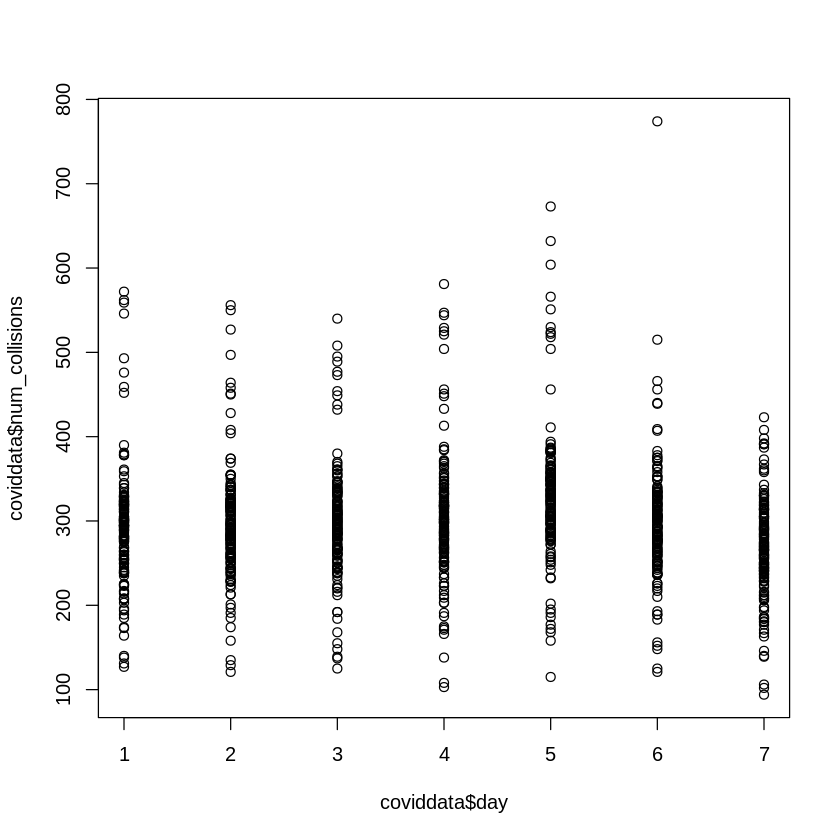

In [1793]:
plot(coviddata$day, coviddata$num_collisions)

In [1794]:
cor(coviddata$day, coviddata$num_collisions)

[1] -0.04470309

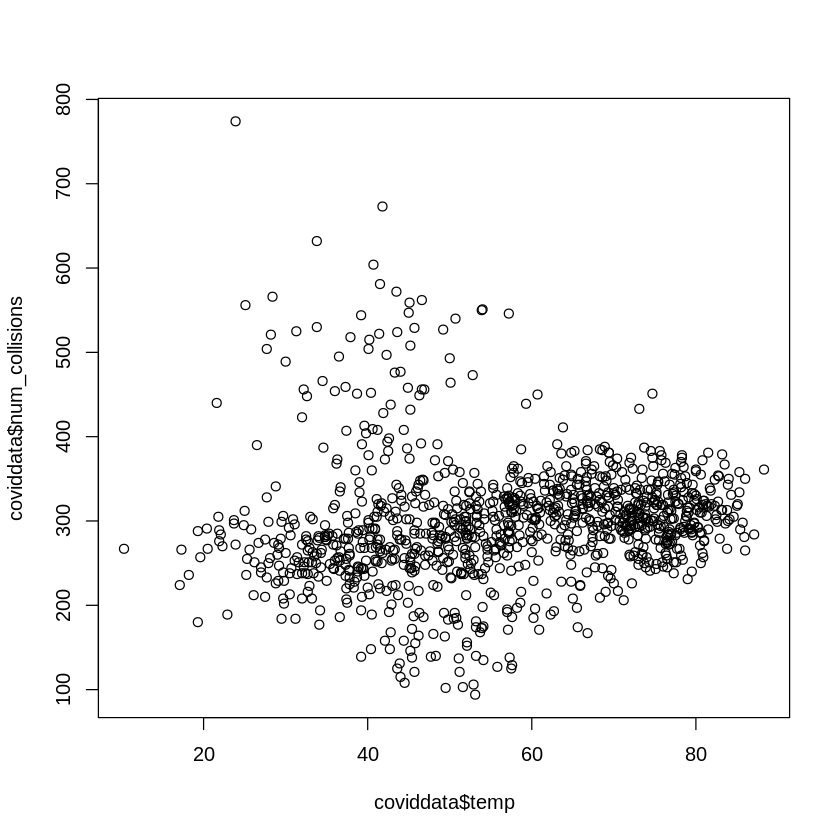

In [1795]:
plot(coviddata$temp, coviddata$num_collisions)

In [1796]:
cor(coviddata$temp, coviddata$num_collisions)

[1] 0.09284751

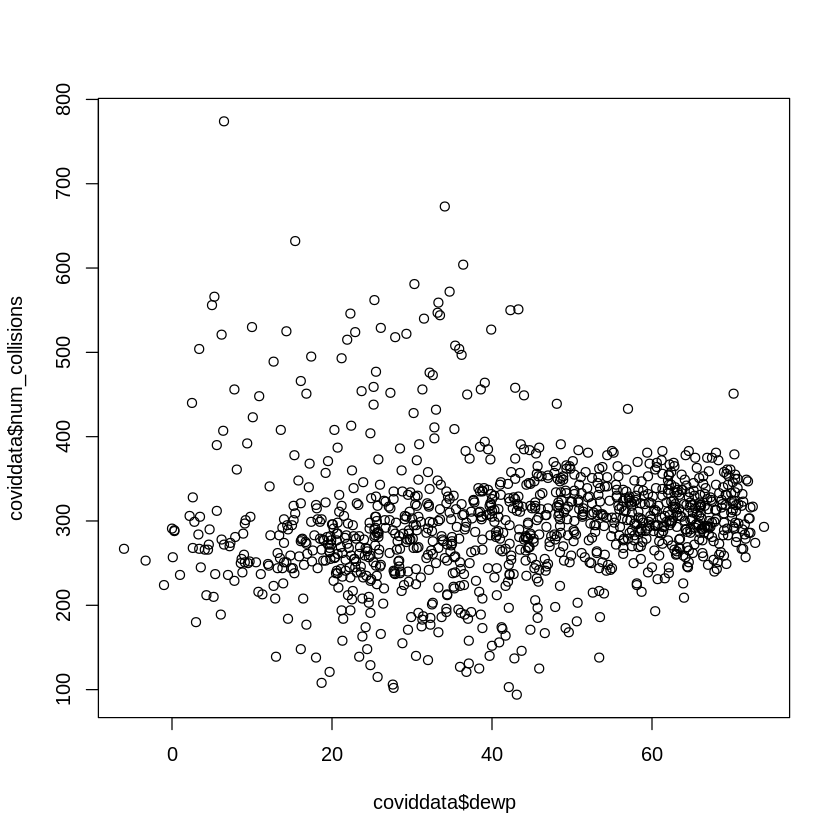

In [1797]:
plot(coviddata$dewp, coviddata$num_collisions)

In [1798]:
cor(coviddata$dewp, coviddata$num_collisions)

[1] 0.07927784

In [1799]:
cor(coviddata$prcp, coviddata$num_collisions)

[1] -0.004196613

In [1800]:
cor(coviddata$wdsp, coviddata$num_collisions)

[1] -0.0512415

In [1801]:
cor(coviddata$visib, coviddata$num_collisions)

[1] 0.04163534

There seems to be no linear relationship between any of the weather values and number of collisions for the covid data. Even the previously strongest relationship values are producing results between 0.1 and -0.1. Will try to move Saturday and Sunday to the beginning of the week as done previously to see if it impacts the results for day.

In [1802]:
covdat <- coviddata

In [1803]:
covdat$day <- covdat$day + 2

In [1804]:
covdat$day[covdat$day==8] <- 1

In [1805]:
covdat$day[covdat$day==9] <- 2

In [1806]:
head(covdat)

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust  max 
1 5   2020 1  1  2020-01-01     39.0 23.9 1006.0 10.0   7.9 12.0   21.0 45.0
2 6   2020 1  2  2020-01-02     39.6 22.4 1013.2 10.0   5.2  9.9   17.1 48.9
3 7   2020 1  3  2020-01-03     46.6 38.6 1009.7  8.1   3.7  6.0   15.0 48.9
4 1   2020 1  4  2020-01-04     48.6 46.2 1005.7  4.9   2.8  6.0  999.9 51.1
5 2   2020 1  5  2020-01-05     40.2 24.7 1007.9 10.0  10.5 18.1   34.0 51.1
6 3   2020 1  6  2020-01-06     37.3 25.2 1014.3  8.9   5.4 11.1   20.0 45.0
  min  prcp sndp  fog num_collisions
1 36.0 0.02 999.9 0   346           
2 33.1 0.00 999.9 0   413           
3 33.1 0.06 999.9 0   456           
4 44.1 0.34 999.9 1   353           
5 37.0 0.02 999.9 0   291           
6 32.0 0.04 999.9 0   459

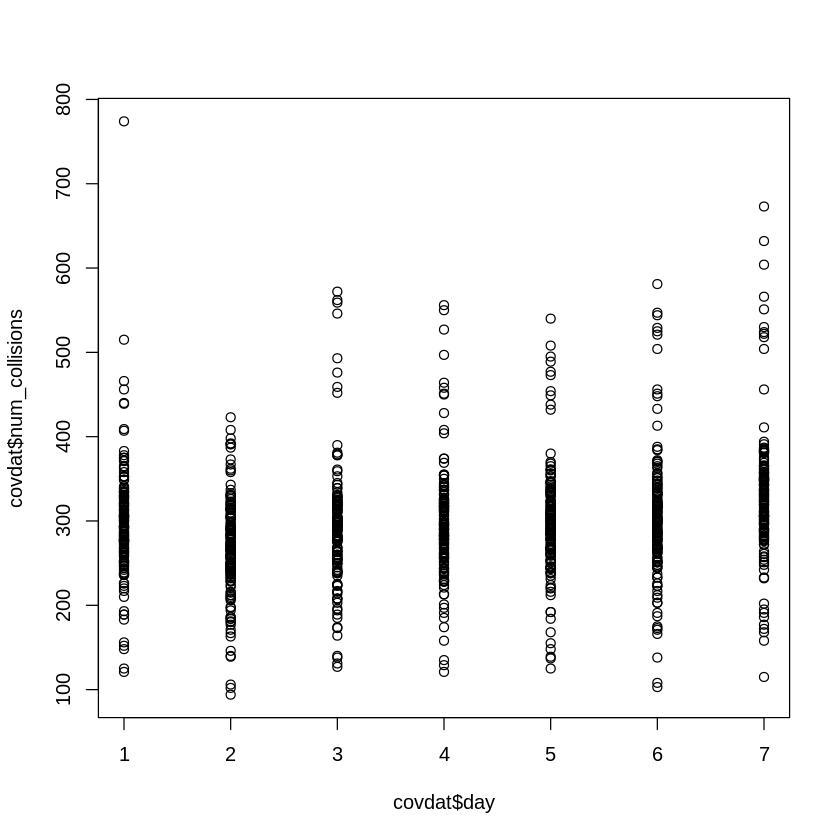

In [1807]:
plot(covdat$day, covdat$num_collisions)

In [1808]:
cor(covdat$day, covdat$num_collisions)

[1] 0.1798571

Even with manipulation the results are a lot weaker than the "normal" data from before covid. It can probably be attributed to lockdowns with only an essential workforce commuting. It could also be less reportings of collisions resulting in a lower total number due to less people being around in general. There still seems to be a small uptick towards the end of the week similar to before which could maybe be attributed to work fatigue causing collisions.

The purpose of this report was to determine if weather variables influenced the number of collisions within New York City during the period of 2013 until 2019.Covid data was excluded as it was not representative of "normal" behaviour due to unprecedented lockdowns. From initial speculations it was estimated that total collision numbers would increase as  the year increased due to more vehicles being driven on the roads every year. The number of vehicles on roads has constantly increased throughout the years so naturally the number of collisions would also increase.


In [1859]:
summary(cd$num_collisions[1827:2191])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  328.0   562.0   634.0   634.4   706.0  1065.0 

In [1860]:
summary(cd$num_collisions[2192:2556])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  264.0   522.0   589.0   579.4   641.0   803.0 

As can be seen above, the 2018 data has a higher mean and max value than the 2019 data. This prompted a check of each years data individually incase there were abnormal or extreme cases that would effect the full dataset. There were no concerns raised including for 2019 and so none of the data for individual years had to be removed.

It was determined that starting the week with Saturday/ Sunday as the first days produced a strong positive linear relationship marking it as a suitable variable for the linear regressor model. Most of the weather variables did not have a linear relationship except for temperature and dew point. These two values provided a smaller positive correlation in comparison to day but were the only other values to provide any linear relationship and so were selected for the linear regressor models well.

A quick look at some seasonal values showed that day still had the strongest linear relationship, increasing slightly in summer and decreasing in winter. The weather values when anaylsed seasonally had less importance and provided an even smaller linear relationship. Temperature and dew point flipped to a small negative linearity in winter suggesting that the colder weather in winter does contribute to higher collision rate but could be investigated much further by analysing every year and possibly even each month.

The spatial data showed that there seems to be less collisions in the less densely populated areas in winter but its hard to determine a difference in heavily populated areas. This can be investigated further by taking smaller timeframes of data possibly months or single weeks to compare different areas throughout the year.

The brief analysis of the covid data shows it to be unreliable for determining the aims required as there seems to be no correlation with any of the weather values. A study could be conducted to compare the covid years (2020 -2022) to the next couple of years of data to determine if levels are returning to what they once were before lockdowns or if they already have.